# Dataset Analysis - Dataset A (Scratchpad)
Copyright (C) 2021 ServiceNow, Inc.

This notebook contains some of the exploratory analysis for dataset A during creation of the preprocessing pipeline. 
It is a scratchpad and has been left in its original form. 

In [1]:
import pathlib
import pandas as pd
import re

In [2]:
%load_ext autoreload
%autoreload 2

In [43]:
PDF_DIRS = [
    '/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf',
  '/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/generic_pdfs',  
  '/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/has_pdf_dir',  
    '/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/low_text_pdfs',  
    '/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/of_pdf',  
]

TXT_DIRS = [
    '/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/txt',      
]

WP_DIRS = [
    '/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/wp_rtf',      
]

pdfs_all = []
pdfs_base_all = []

for PDF_DIR in PDF_DIRS:
    print(PDF_DIR)
    #pdfs = [x for x in pathlib.Path(PDF_DIR).glob('**/*.pdf')]
    pdfs = [x for x in pathlib.Path(PDF_DIR).glob('*.pdf')]
    pdfs.extend([x for x in pathlib.Path(PDF_DIR).glob('*.PDF')])
    #print(pdfs)
    pdfs_rel = [pdf.relative_to(PDF_DIR) for pdf in pdfs]
    #print(pdfs_rel)
    #print(pdfs_rel[0])
    pdfs_base = [pathlib.Path(str(pdf)).stem for pdf in pdfs_rel]
    pdfs_base[0]
    
    pdfs_all.extend(pdfs)
    pdfs_base_all.extend(pdfs_base)
            
for PDF_DIR in TXT_DIRS:
    print(PDF_DIR)
    #pdfs = [x for x in pathlib.Path(PDF_DIR).glob('**/*.pdf')]
    pdfs = [x for x in pathlib.Path(PDF_DIR).glob('*.txt')]
    pdfs.extend([x for x in pathlib.Path(PDF_DIR).glob('*.TXT')])
    #print(pdfs)
    pdfs_rel = [pdf.relative_to(PDF_DIR) for pdf in pdfs]
    #print(pdfs_rel)
    print(pdfs_rel[0])
    pdfs_base = [pathlib.Path(str(pdf)).stem for pdf in pdfs_rel]
    pdfs_base[0]
    
    pdfs_all.extend(pdfs)
    pdfs_base_all.extend(pdfs_base)
            
for PDF_DIR in WP_DIRS:
    print(PDF_DIR)
    #pdfs = [x for x in pathlib.Path(PDF_DIR).glob('**/*.pdf')]
    pdfs = [x for x in pathlib.Path(PDF_DIR).glob('*.rtf')]
    #print(pdfs)
    pdfs_rel = [pdf.relative_to(PDF_DIR) for pdf in pdfs]
    #print(pdfs_rel)
    print(pdfs_rel[0])
    pdfs_base = [pathlib.Path(str(pdf)).stem for pdf in pdfs_rel]
    pdfs_base[0]
    
    pdfs_all.extend(pdfs)
    pdfs_base_all.extend(pdfs_base)           
    


/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/generic_pdfs
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/has_pdf_dir
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/low_text_pdfs
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/of_pdf
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/txt
processed.txt
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/wp_rtf
120470_readme_video_OF1230.rtf


In [44]:
print(len(pdfs_all))

27115


In [45]:
pdfs_df = pd.DataFrame({'file': pdfs, 'base': pdfs_base})
pdfs_df

file  \
0   /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...   
1   /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...   
2   /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...   
3   /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...   
4   /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...   
..                                                ...   
56  /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...   
57  /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...   
58  /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...   
59  /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...   
60  /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...   

                          base  
0   120470_readme_video_OF1230  
1         120474_OF1256_readme  
2   120596_readme_video_OF1298  
3   130474_readme_video_OF1740  
4   130603_readme_video_OF1979  
..                         ...  
56               292280_Readme  
57  292280_licence_agreement_e  
58  293925_licence_agreement_e  
59             293925_readme_e  
60       321103_sp_0110_readme  

[61 rows x 2 columns]

In [65]:
CSV_DIRS = [
    '/nrcan_p2/data/02_intermediate/20201006/geoscan/pdf/v1_all',
    '/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/generic_pdfs_all',
    '/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/has_pdf_dir_all',
    '/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/low_text_pdfs',
    '/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/of_pdf_all',
    '/nrcan_p2/data/02_intermediate/20201117/geoscan/txt', 
    '/nrcan_p2/data/02_intermediate/20201117/geoscan/wp_rtf', 
]
csvs = []
folder = []
for CSV_DIR in CSV_DIRS:
    print(CSV_DIR)
    csvs +=[x for x in pathlib.Path(CSV_DIR).glob('*.csv')]
    folder += [CSV_DIR for x in pathlib.Path(CSV_DIR).glob('*.csv')]
    print(len(csvs))

/nrcan_p2/data/02_intermediate/20201006/geoscan/pdf/v1_all
7008
/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/generic_pdfs_all
12287
/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/has_pdf_dir_all
12698
/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/low_text_pdfs
20584
/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/of_pdf_all
21743
/nrcan_p2/data/02_intermediate/20201117/geoscan/txt
21778
/nrcan_p2/data/02_intermediate/20201117/geoscan/wp_rtf
21787


In [66]:
len(csvs)

21787

In [67]:
csvs_df = pd.DataFrame({'file': csvs, 'folder': folder})
csvs_df

file  \
0      /nrcan_p2/data/02_intermediate/20201006/geosca...   
1      /nrcan_p2/data/02_intermediate/20201006/geosca...   
2      /nrcan_p2/data/02_intermediate/20201006/geosca...   
3      /nrcan_p2/data/02_intermediate/20201006/geosca...   
4      /nrcan_p2/data/02_intermediate/20201006/geosca...   
...                                                  ...   
21782  /nrcan_p2/data/02_intermediate/20201117/geosca...   
21783  /nrcan_p2/data/02_intermediate/20201117/geosca...   
21784  /nrcan_p2/data/02_intermediate/20201117/geosca...   
21785  /nrcan_p2/data/02_intermediate/20201117/geosca...   
21786  /nrcan_p2/data/02_intermediate/20201117/geosca...   

                                                  folder  
0      /nrcan_p2/data/02_intermediate/20201006/geosca...  
1      /nrcan_p2/data/02_intermediate/20201006/geosca...  
2      /nrcan_p2/data/02_intermediate/20201006/geosca...  
3      /nrcan_p2/data/02_intermediate/20201006/geosca...  
4      /nrcan_p2/data/02_intermediate/20201006/geosca...  
...                                                  ...  
21782  /nrcan_p2/data/02_intermediate/20201117/geosca...  
21783  /nrcan_p2/data/02_intermediate/20201117/geosca...  
21784  /nrcan_p2/data/02_intermediate/20201117/geosca...  
21785  /nrcan_p2/data/02_intermediate/20201117/geosca...  
21786  /nrcan_p2/data/02_intermediate/20201117/geosca...  

[21787 rows x 2 columns]

In [68]:
csvs_df['rel'] = csvs_df.apply(lambda x: x.file.relative_to(x.folder), axis=1)
csvs_df['base'] = csvs_df.rel.apply(lambda x: pathlib.Path(pathlib.Path(x.stem).stem).stem) #.stem for csv in csvs_rel]

In [69]:
csvs_df.folder.value_counts()

/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/low_text_pdfs       7886
/nrcan_p2/data/02_intermediate/20201006/geoscan/pdf/v1_all              7008
/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/generic_pdfs_all    5279
/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/of_pdf_all          1159
/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/has_pdf_dir_all      411
/nrcan_p2/data/02_intermediate/20201117/geoscan/txt                       35
/nrcan_p2/data/02_intermediate/20201117/geoscan/wp_rtf                     9
Name: folder, dtype: int64

In [12]:
#csvs_df['folder'] = csvs_df.file.apply(lambda x: x.parent / '/'.join(x.stem.split('__')[:-1]))

In [70]:
files_df = pd.merge(csvs_df, pdfs_df, on='base', how='left', suffixes=('', '_pdf'))

In [71]:
files_df

file  \
0      /nrcan_p2/data/02_intermediate/20201006/geosca...   
1      /nrcan_p2/data/02_intermediate/20201006/geosca...   
2      /nrcan_p2/data/02_intermediate/20201006/geosca...   
3      /nrcan_p2/data/02_intermediate/20201006/geosca...   
4      /nrcan_p2/data/02_intermediate/20201006/geosca...   
...                                                  ...   
21782  /nrcan_p2/data/02_intermediate/20201117/geosca...   
21783  /nrcan_p2/data/02_intermediate/20201117/geosca...   
21784  /nrcan_p2/data/02_intermediate/20201117/geosca...   
21785  /nrcan_p2/data/02_intermediate/20201117/geosca...   
21786  /nrcan_p2/data/02_intermediate/20201117/geosca...   

                                                  folder  \
0      /nrcan_p2/data/02_intermediate/20201006/geosca...   
1      /nrcan_p2/data/02_intermediate/20201006/geosca...   
2      /nrcan_p2/data/02_intermediate/20201006/geosca...   
3      /nrcan_p2/data/02_intermediate/20201006/geosca...   
4      /nrcan_p2/data/02_intermediate/20201006/geosca...   
...                                                  ...   
21782  /nrcan_p2/data/02_intermediate/20201117/geosca...   
21783  /nrcan_p2/data/02_intermediate/20201117/geosca...   
21784  /nrcan_p2/data/02_intermediate/20201117/geosca...   
21785  /nrcan_p2/data/02_intermediate/20201117/geosca...   
21786  /nrcan_p2/data/02_intermediate/20201117/geosca...   

                               rel                     base  \
0        100327.pdfminer_split.csv                   100327   
1        100328.pdfminer_split.csv                   100328   
2        100331.pdfminer_split.csv                   100331   
3        100335.pdfminer_split.csv                   100335   
4        100337.pdfminer_split.csv                   100337   
...                            ...                      ...   
21782    210944_tbl_Plasticity.csv    210944_tbl_Plasticity   
21783        210944_tbl_Pollen.csv        210944_tbl_Pollen   
21784      210944_tbl_RockEval.csv      210944_tbl_RockEval   
21785  210944_tbl_conductivity.csv  210944_tbl_conductivity   
21786      210944_tbl_magnetic.csv      210944_tbl_magnetic   

                                                file_pdf  
0                                                    NaN  
1                                                    NaN  
2                                                    NaN  
3                                                    NaN  
4                                                    NaN  
...                                                  ...  
21782  /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...  
21783  /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...  
21784  /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...  
21785  /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...  
21786  /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...  

[21787 rows x 5 columns]

In [72]:
files_df.folder.value_counts()

/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/low_text_pdfs       7886
/nrcan_p2/data/02_intermediate/20201006/geoscan/pdf/v1_all              7008
/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/generic_pdfs_all    5279
/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/of_pdf_all          1159
/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/has_pdf_dir_all      411
/nrcan_p2/data/02_intermediate/20201117/geoscan/txt                       35
/nrcan_p2/data/02_intermediate/20201117/geoscan/wp_rtf                     9
Name: folder, dtype: int64

In [75]:
sample_df = []
for groupname, group in files_df.groupby('folder'):
    if groupname in ['/nrcan_p2/data/02_intermediate/20201117/geoscan/txt', 
                       '/nrcan_p2/data/02_intermediate/20201117/geoscan/wp_rtf']:
        sample_df.append(group.sample(5))
    else:
        sample_df.append(group.sample(100))
sample_df = pd.concat(sample_df)

In [76]:
sample_df.file.nunique()

510

In [77]:
sample_df.to_csv('sample_dataset_a_100.csv')

In [3]:
import pandas as pd
sample_df = pd.read_csv('sample_dataset_a_100.csv')

In [4]:
sample_df

Unnamed: 0                                               file  \
0          1978  /nrcan_p2/data/02_intermediate/20201006/geosca...   
1            92  /nrcan_p2/data/02_intermediate/20201006/geosca...   
2           556  /nrcan_p2/data/02_intermediate/20201006/geosca...   
3          5521  /nrcan_p2/data/02_intermediate/20201006/geosca...   
4          6382  /nrcan_p2/data/02_intermediate/20201006/geosca...   
..          ...                                                ...   
505       21781  /nrcan_p2/data/02_intermediate/20201117/geosca...   
506       21779  /nrcan_p2/data/02_intermediate/20201117/geosca...   
507       21782  /nrcan_p2/data/02_intermediate/20201117/geosca...   
508       21780  /nrcan_p2/data/02_intermediate/20201117/geosca...   
509       21785  /nrcan_p2/data/02_intermediate/20201117/geosca...   

                                                folder  \
0    /nrcan_p2/data/02_intermediate/20201006/geosca...   
1    /nrcan_p2/data/02_intermediate/20201006/geosca...   
2    /nrcan_p2/data/02_intermediate/20201006/geosca...   
3    /nrcan_p2/data/02_intermediate/20201006/geosca...   
4    /nrcan_p2/data/02_intermediate/20201006/geosca...   
..                                                 ...   
505  /nrcan_p2/data/02_intermediate/20201117/geosca...   
506  /nrcan_p2/data/02_intermediate/20201117/geosca...   
507  /nrcan_p2/data/02_intermediate/20201117/geosca...   
508  /nrcan_p2/data/02_intermediate/20201117/geosca...   
509  /nrcan_p2/data/02_intermediate/20201117/geosca...   

                             rel                     base  \
0      132202.pdfminer_split.csv                   132202   
1      100660.pdfminer_split.csv                   100660   
2      102889.pdfminer_split.csv                   102889   
3      299021.pdfminer_split.csv                   299021   
4      314745.pdfminer_split.csv                   314745   
..                           ...                      ...   
505     210944_tbl_Grainsize.csv     210944_tbl_Grainsize   
506  210944_tbl_Foraminifera.csv  210944_tbl_Foraminifera   
507    210944_tbl_Plasticity.csv    210944_tbl_Plasticity   
508    210944_tbl_GasGeoChem.csv    210944_tbl_GasGeoChem   
509  210944_tbl_conductivity.csv  210944_tbl_conductivity   

                                              file_pdf  
0                                                  NaN  
1                                                  NaN  
2                                                  NaN  
3                                                  NaN  
4                                                  NaN  
..                                                 ...  
505  /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...  
506  /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...  
507  /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...  
508  /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...  
509  /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...  

[510 rows x 6 columns]

## PDFs

In [80]:
dfs = []
for irow, row in sample_df.iterrows(): #sample_df.groupby('folder').sample(3).iterrows():
    #print(irow, row)
    pdf_file = row.file_pdf
    csv_file = row.file
    #print(pdf_file)
    #print(csv_file)
    dfs.append(pd.read_csv(csv_file))
    #! cp pdf_file .
    #break
dfs = pd.concat(dfs)
dfs

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Unnamed: 0                            obj_type   pg      pos_x0  \
0            0  <class 'pdfminer.layout.LTFigure'>  0.0   63.359989   
1            1  <class 'pdfminer.layout.LTFigure'>  0.0  497.976501   
2            2  <class 'pdfminer.layout.LTFigure'>  1.0   62.075508   
3            3  <class 'pdfminer.layout.LTFigure'>  1.0   65.979935   
4            4  <class 'pdfminer.layout.LTFigure'>  1.0  493.564697   
..         ...                                 ...  ...         ...   
0            0                                 NaN  NaN         NaN   
1            1                                 NaN  NaN         NaN   
2            2                                 NaN  NaN         NaN   
0            0                                 NaN  NaN         NaN   
1            1                                 NaN  NaN         NaN   

        pos_y0      pos_x1       pos_y1  \
0    82.560059  547.200016   935.040039   
1   965.970520  604.976501  1002.970520   
2    93.339245  548.486319   937.694901   
3   115.888097   77.511647   119.763233   
4   961.558655  600.564697   998.558655   
..         ...         ...          ...   
0          NaN         NaN          NaN   
1          NaN         NaN          NaN   
2          NaN         NaN          NaN   
0          NaN         NaN          NaN   
1          NaN         NaN          NaN   

                                                 text  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
..                                                ...   
0   Lorenson, T. D., Whiticar, M., Waseda, A., Dal...   
1                                                  \n   
2                                                  \n   
0   A plexiglass plate with 4 brass electrodes mou...   
1                                                  \n   

                                                 file  
0   /nrcan_p2/data/02_intermediate/132202.pdfminer...  
1   /nrcan_p2/data/02_intermediate/132202.pdfminer...  
2   /nrcan_p2/data/02_intermediate/132202.pdfminer...  
3   /nrcan_p2/data/02_intermediate/132202.pdfminer...  
4   /nrcan_p2/data/02_intermediate/132202.pdfminer...  
..                                                ...  
0   /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...  
1   /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...  
2   /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...  
0   /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...  
1   /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...  

[4059037 rows x 9 columns]

In [81]:
dfs = dfs.reset_index(drop=True)
dfs.to_parquet('sample_a_100_dfs.parquet')

In [8]:
import pandas as pd
dfs = pd.read_parquet('sample_a_100_dfs.parquet')

## Number of files, pages, docs etc.

In [82]:
print('Number of pages overall:')
print(dfs.groupby(['file', 'pg']).ngroups)

print('Number of documents overall:')
print(dfs.groupby('file').ngroups)

#print('Number of entries overall:')
#print(df.groupby('id1').ngroups)

Number of pages overall:
26189
Number of documents overall:
510


Text(0.5, 1.0, 'Number of pages per pdf')

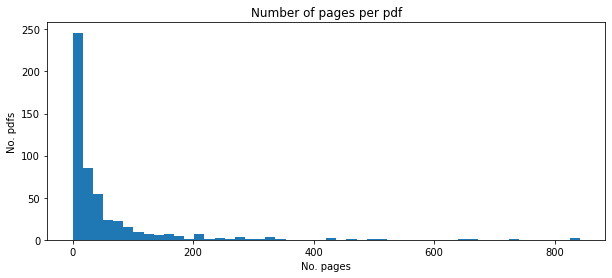

In [83]:
v = dfs[['file', 'pg']].groupby(['file']).pg.nunique()
import matplotlib.pyplot as plt
v.plot.hist(bins=50, figsize=(10,4))
plt.xlabel('No. pages')
plt.ylabel('No. pdfs')
plt.title('Number of pages per pdf')

Text(0.5, 1.0, 'Number of pages per pdf')

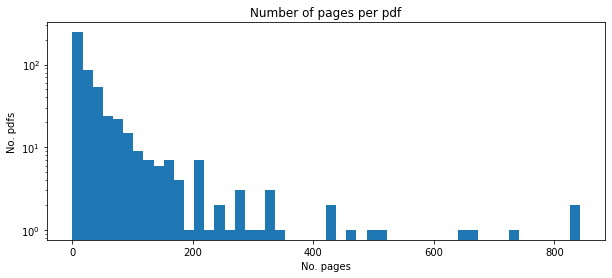

In [84]:
import matplotlib.pyplot as plt
v.plot.hist(bins=50, figsize=(10,4))
plt.yscale('log')
plt.xlabel('No. pages')
plt.ylabel('No. pdfs')
plt.title('Number of pages per pdf')

In [85]:
percentiles = [0, 0.01,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99, 1]
v.describe(percentiles=percentiles).to_frame()

pg
count  510.000000
mean    51.350980
std    100.871976
min      0.000000
0%       0.000000
1%       0.000000
10%      1.000000
20%      1.000000
25%      3.250000
30%      8.000000
40%     12.600000
50%     17.500000
60%     26.000000
70%     42.300000
80%     66.200000
90%    128.000000
99%    505.460000
100%   842.000000
max    842.000000

**analysis** (remember thisis a sample) Interestingly, this has dropped the overall length med and mean for nrcan from (median down from 32 -> 17 pg, which is still higher than for Dataset B)
The max number of pg/file is also lower 1599 -> 842.

In [93]:
dfs[dfs.text.isnull()].shape

(3290088, 9)

In [14]:
dfs = dfs[~dfs.text.isnull()]
dfs.shape

(768949, 12)

**analysis** we dropped about 75% of the boxes by dropping null text boxes

Text(0.5, 1.0, 'Number of pages per pdf')

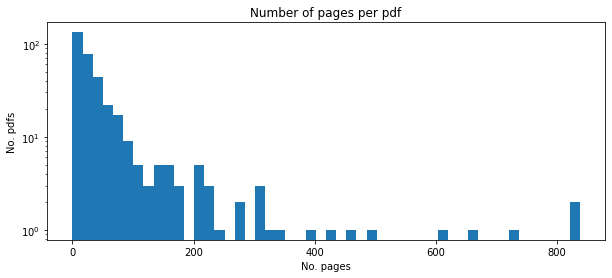

In [95]:
v = dfs[['file', 'pg']].groupby(['file']).pg.nunique()
import matplotlib.pyplot as plt
v.plot.hist(bins=50, figsize=(10,4))
plt.yscale('log')
plt.xlabel('No. pages')
plt.ylabel('No. pdfs')
plt.title('Number of pages per pdf')

In [96]:
percentiles = [0, 0.01,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99, 1]
v.describe(percentiles=percentiles).to_frame()

pg
count  349.000000
mean    59.564470
std    109.897363
min      0.000000
0%       0.000000
1%       0.000000
10%      6.000000
20%     10.000000
25%     12.000000
30%     13.000000
40%     17.000000
50%     22.000000
60%     32.000000
70%     46.000000
80%     69.400000
90%    148.000000
99%    637.720000
100%   837.000000
max    837.000000

In [97]:
print('Number of pages overall:')
print(dfs.groupby(['file', 'pg']).ngroups)

print('Number of documents overall:')
print(dfs.groupby('file').ngroups)

Number of pages overall:
20788
Number of documents overall:
349


In [98]:
349/510

0.6843137254901961

**analysis** note that we went from 510 -> 349 documents (15% loss)

## Width/height

In [99]:
dfs['width'] = dfs.pos_x1 - dfs.pos_x0
print('...height')
dfs['height'] = dfs.pos_y1 - dfs.pos_y0

...height


[None]

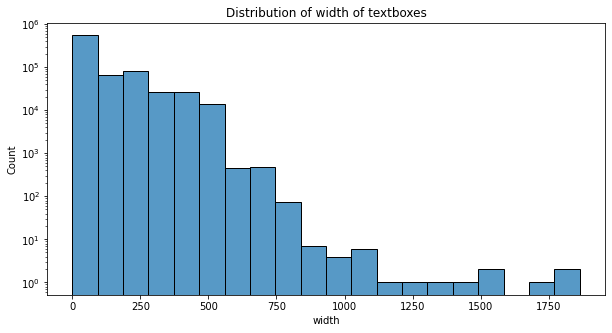

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.histplot(data=dfs, x='width', label='width', bins=20)
#sns.lineplot(data=dim_dist, x='perc', y='height', label='height', marker='o', markersize=4)
plt.title('Distribution of width of textboxes')
#plt.legend()
#plt.ylabel('pixels')
plt.gca().set(yscale='log')

[None]

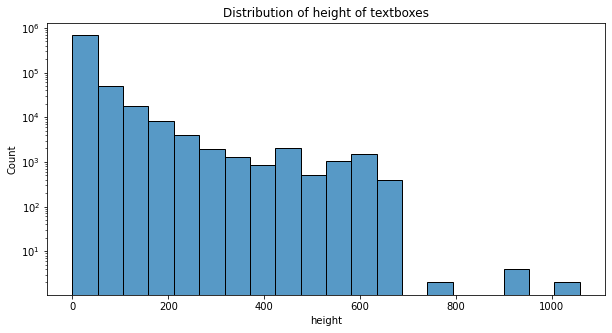

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.histplot(data=dfs, x='height', label='width', bins=20)
#sns.lineplot(data=dim_dist, x='perc', y='height', label='height', marker='o', markersize=4)
plt.title('Distribution of height of textboxes')
#plt.legend()
#plt.ylabel('pixels')
plt.gca().set(yscale='log')

## N chars

In [102]:
dfs['nchars_stripped'] = dfs.text.str.strip().str.len()

[None]

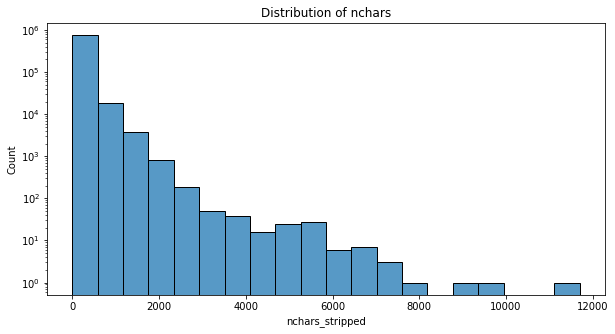

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.histplot(data=dfs, x='nchars_stripped', label='nchars_stripped', bins=20)
#sns.lineplot(data=dim_dist, x='perc', y='height', label='height', marker='o', markersize=4)
plt.title('Distribution of nchars')
#plt.legend()
#plt.ylabel('pixels')
plt.gca().set(yscale='log')

In [108]:
with pd.option_context('display.max_colwidth', None):
    display(dfs[dfs.nchars_stripped > 7000].text.to_frame())

text
145775   ll!  I" !In Ili; 'in I!li '1"11111":' IiI! \n'  III  I \n'l,iI  '111111  I!lrm \nI \n;lliI \ni\n.  H: ~i' !  l!ii iii,  I'ii  i;: !iii l~ ,iii  i!! lil! i.i  :1' j'li lki : I ,., .,  ,.b  ::,  '\n'ifu 'ht"!H  Hfilf \n'  "::\n'f. 'II+'~ j.l' lliH  i'i' .'~ \n, 11 \n.!i I!i  ';1 111/'1111  "I,;!  !i' II!I !:'!II 'g~ i!il iii. L illil lilii !l l!TIi  I iiil  [Ii  I !I l! \nj' \n', II!  !' ; !Ii. fjli !lIl rrn  !Ip  !ill ,1,  ill! I II  ,i, ;;1;  II! 'I'i 111 \n1:1  .,  I.  ,  i P!  !"l.!. \ni!  ,!ill!li m'llI  ! !I ~I  illilil  :; H!! ,[II f"'1  ,II!  II!  11111  'iii'!!!! lin IiI! ilJl 'Ii!  I!I'I /Iii  III  III!  iill'i' kl' !P! '!i  II:: ! J' a \n.! ill! ,!!IIi!! !lilllii!ll!!i I!', 'I\! ' !!  1'1,1' Iii  j;m . 111 \n11! III!illiiI ljlil !l!!I!II! lIil  '!I:  !Iil !!i\n1\nii! !II  !  I. \nI\nI,ll"  ., \n'1111 \n'1 \nI:  It .. Ii;'  "1' fIT" \nit· I~!  · 1·":I" 'iill'.  hi \n['[ " \nlitl \n'!t! \n.... \n.. \n!Ill n,l inl!ill I!,' !oli !I, \n!.!"!'! 'I'  . iii  I  .1 \nl;ii','  -h  ::,'  ~~ I,!  l:jI \n, III.  :,1111 Iii d!l:iill lilif ·i!: !III!,  I i.1: I iii! iii' I..! !II \n,I  "I!  I,\nI! li!1  iii I \nII! \n,1:1  itt'  ;:: ;i'!  Ii !i', un  i!H  iiI!  I '!  i!i  IHi  j!i Iii  :' \n'1"  " 1"":" "'1 1'  "··· '\n""'"" ":1"" \n'\ '1'1"""  ' \n.,. \n''1 "1"1111 ""1" "":1111' \n' 1IIIiilil'I'"  ''''' [ '\nII :::  t::i ::1  ,Iii  I  I  It!:  H! \n\l~l.;;.  '1 :1  ::U  1:::  :f  ':1'  :::!  I  HI:::  :i:l \n'~ t ":; \n·\nI:¥.··""'· ~·"'I" ij: \n:!1  !! \n.11;  I  !  Ik'i,'1  :1; \n.! j  !il  :i!!  tJi: \n!:~,  'f :1  l!:!  .j:! i: :; Ii! \n' 1  ~ \nItlll'i, 1'liI ifji ·li· 1:1111 i n !llfIJii! :lIT  iili  ,Ii d "i: In: i"'iI  J!r  In I'rr 1'[lI'II'[H \nIi!i  01':  i!:: :i",  Iii' hi! :i:1 'Ir ft"m.  ::,! ft;I~~h , '! ~'  I~ 'd' I· \nII'~ 'IH h ,nlHI!  !I'  I ! \nl: ijii ! I!!11 \niii !tit im  if I iii' il'li!ih ,i:1 if I' mt i:i. -I'P In;l!lti '" \n,iI!.  .1.. \ni!1 1. 1I  , .. I  \. \n"  .•  ,  1.1 .. :!!  , .. \n• •  I:! \nill  1 \n!.  ::1:  II;:  ,' ... ,  " \n. \n.1 \nI, \n::1: \ninlt"l  ...  ". ,  fit.  I \n.1 \n.• \nII !I  Ii  HlliiL  lUI \n!i!i! . \n:::::::;:  ... . !! i,<!iUiili! j!lj,lLj:!.lIi  !:~' \nlin  l:!i ,i'UlJ!;!II!I!!1  ! !!!IlliiH liH I!i!,I!!JlU:Jil l!i ln'il \n:liilf!llli i!ljI,!!,  illl«l , \nI~:i i:i;!!!iIl!'  !::II \n.II  !.I:  .~. I: 'ii! Ui l ii!:ili!!i!::::ii :I\n11m \nIIH  I'  iii"  iii; ::n ,·n fi:: 'i"" lil! !![I II;fj:!:!" :jT:!!ii F,  I!;; i : \n1,lli!d II''';:  1,'1: I,;! ililll~l: : I I '1n'IIH"11 i";Hi! WII i,!]  mliE,  1'1 IT!HI'!', Ifif. Hf"I'fIT  Ili  : \ni!l;; ;ili q  ::i: Hi' "i' '::: I:,: ::i' II:' 'i'! 'ii'  "'i ,p.:H;  I ' \n'I  l 'IIrJ1.i  liTI: Iijji V ¥.ill;'  "\nI \nI' \nI: !!~ !';:;  j ' :  ::.!  I:: ::. 1 I:::  :'.  :\ 1 lid  :q l  I  ! !i!. ill! !lH  I :   I \n, I  !d \nill \ni=! j  :ql  I: :  lid  I"!  !1. \n11:.  ,11  i1E  ::!I  '1 ::  I: !:  Ill! :111  a,!:: :.U  I: ::  t!1  :ill'; \n~.  :,.! .:h!  n \n!  IHII  :11 \n1I'1I1!  .l llltli  Ii. II I' h  1:l1t  I !  I  I \nI  I  11 \niii !ll!  1  11'1 I" PI  W'  "'I'f'  , ..  '1"  ,,,  II'\n'"  ".  'I'  II'  '11 ;~ffI"  1" 1' \n; \n, \nI \n',:i '::: iii! ""  Ij!l  iii. !II ::::  ::ii 'w "I ! .i'!  ::!  1!H  ,i;  Ii I ~, \n; ,'Ii  g i!l! :,,'  , I! 'it! ,';  ,;  'jU fti  :11" \n. \n" \n'I\n. , ... ' .,.,  ...  , .... .. II'J  1 ""I' \n' \nI ' \n" \n'"11''''  II:",  "  ""1"'"  ." , ...  , ...... ,' \n. '''' iii  ii:' .,:!  '!:! If~ :ii: ' i' ,!: i!!1~ :ili #': ~4i ' " \nrrp. ........ ....\ni! II I " 'llI I '  il'  ,WI' \n'I  i:;; !if! Hi:  11i !1 ti11! ,In  11m!  11IT ff  iTTl ttr ' 11111  rti  I IT ~l ~ iF  i I !I! \nil;  '.:! \n,I  I " , iii  ili: ,,,. i'.  lii.lhil  I  '  It 'I  inhil ttf:  11  [, "i! 'ITf imtt?; m, iii! Tii  i'l: iil' liii \nh \nl!:!n'i ::[1  ii:  im i;:,~f:;~ liii 1:1' ::i"1  'iIi iFI 'Ip :iT i,  ,:'  ITI \nI\nim \n;' j'  ',:1 1 ,  ' I; " ' r  \n': '  ... .. :,~  ::.~  ::,.  ;',:  ;':  ~.r.  ;1 ,  .. ~  ;.:  :;1 1\n:',':'! . ",. ~;:  'j::  I~;; :;;; :::.  :11;  . ,. ~.;:  ::.; ::.:  .";. :./. \n',I;.

**analyiss** 
* looks like it definitely needs the CID removal
* some of these long texts are not garbage. I wonder if we could remove most of the garbage by just doing the "no real words g3letter filter

In [5]:
import pathlib
REPO_DIR = pathlib.Path(__name__).parent.absolute().parent
print(REPO_DIR)

import sys
sys.path.append(str(REPO_DIR))

/nrcan_p2/workspace/sraimondo/nrcan_p2


In [4]:
from nrcan_p2.data_processing.pipelines import BASE_PIPELINE, BASE_PIPELINE_CLEAN, SIMPLE_PIPELINE_GLOVE_3, SIMPLE_PIPELINE_BERT_3, POSTPIPE_GLOVE, POSTPIPE_BERT_SPACY_2

In [5]:
BASE_PIPELINE_CLEAN

[<function nrcan_p2.data_processing.preprocessing_dfcol.rm_dbl_space(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_cid(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.convert_to_ascii(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_nonprintable(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_no_letter(df, col)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline_hyphenation(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_no_real_words_g3letter(df, col, en_dict=<enchant.Dict object at 0x7f2024aaeac0>)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_email(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_url(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_doi(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_phonenum

In [15]:
dfs['text_-1'] = dfs['text']

<ipython-input-15-9a7f2721dbbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['text_-1'] = dfs['text']


In [38]:
dfs.columns

Index(['Unnamed: 0', 'obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1', 'pos_y1',
       'text', 'file', 'text_-1'],
      dtype='object')

### Removal of cids and non printables etc.

In [16]:
for i in range(0,4):
    dfs[f'text_{i}'] = BASE_PIPELINE[i](dfs[f'text_{i-1}'])

<ipython-input-16-5265fbf7f38a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[f'text_{i}'] = BASE_PIPELINE[i](dfs[f'text_{i-1}'])


In [17]:
i = 3
dfs[f'nchars_{i}'] = dfs[f'text_{i}'].str.len()

<ipython-input-17-a579087aa93b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[f'nchars_{i}'] = dfs[f'text_{i}'].str.len()


In [41]:
dfs.columns

Index(['Unnamed: 0', 'obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1', 'pos_y1',
       'text', 'file', 'text_-1', 'text_0', 'text_1', 'text_2', 'text_3',
       'nchars_3'],
      dtype='object')

In [118]:
for i in range(0,4):
    last_i = i-1
    res = dfs[dfs[f'text_{last_i}'] != dfs[f'text_{i}']]
    print(i)
    print(res.shape)
    res = res.sample(20)
    with pd.option_context('display.max_colwidth', None):
        display(res[[f'text_{last_i}', f'text_{i}']])

0
(244849, 18)


text_-1  \
54051                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 16  44  44 c \n16  47  33 \n16  49  04 \n16  49  20 \n   
536102                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  ohlorite  and  biotite  schist  that  flank  the  shear  zone .  The  latter 

1
(16061, 18)


text_0  \
551212                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             1()' •(cid:173)\n   
1849821                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   (cid:49)(cid:53)(cid:48)\n   
763952                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

2
(58205, 18)


text_1  \
51427                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         PETITE GARDE -ROBE BLASONNIENNE QUÉBÉCOISE \n   
2326070                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Present-day Temperature (°C) 5°C assumed \nTiming of Uplift/Cooling (Ma) 45 Ma assumed \n   
2744279                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                • \n   
369579                                                                                                                                                   

3
(427, 18)


text_2  \
4058342                                 .0(6(.3@(" G  \nE4- 2.%(*/(/(14/\n\n   
1847058                                                           \n\n\n  \n   
4002898                                                     . .::%  -(.3*(\n   
1847055                                                                   \n   
4022477                                                                   \n   
4041098                                                            ,,$(   \n   
361029                                                         120deg00 W\n   
4041108                                                             '+-:<"\n   
2940561              \n #2 &\n&, , ,\n,89-'5<4E' , \n &  +#4=\n  &,  \n  4\n   
636651                                                                    \n   
4058387  "FF.-(.."(.+."(.P.0(.(!,:#,\n1$/.2"3-'3..>.74#  <. - \n.56 :>.&>(\n   
2940793                              !  489'404'94!44F4?)<40\n @,*',43+254\n   
2748611                                                          ' = n -  \n   
4058303                                                        ,, ,   (#( \n   
558838                                                        \n1994\n1982\n   
2940694                 +,&/-./'$0-/\n\n , &,   \n\n/4=/,&,  '\n&', ,>  &4\n   
3849397                                                                  \n   
2940517                      ,&0!/ &$4=-\n 6&,  ,\n, , ,'& \n\n&' 0!/ &\n4\n   
1846732                                                                   \n   
4031503                                                                   \n   

                                                                     text_3  
4058342                                 .0(6(.3@(" G \nE4- 2.%(*/(/(14/\n\n  
1847058                                                           \n\n\n \n  
4002898                                                     . .::% -(.3*(\n  
1847055                                                                  \n  
4022477                                                                  \n  
4041098                                                             ,,$( \n  
361029                                                        120deg00 W \n  
4041108                                                            '+-:<"\n  
2940561                 \n #2 &\n&, , ,\n,89-'5<4E' , \n & +#4=\n &, \n 4\n  
636651                                                                   \n  
4058387  "FF.-(.."(.+."(.P.0(.(!,:#,\n1$/.2"3-'3..>.74# <. - \n.56 :>.&>(\n  
2940793                              ! 489'404'94!44F4?)<40\n @,*',43+254\n  
2748611                                                          ' = n - \n  
4058303                                                         ,, , (#( \n  
558838                                                       \n1994\n1982\n  
2940694                    +,&/-./'$0-/\n\n , &, \n\n/4=/,&, '\n&', ,> &4\n  
3849397                                                                  \n  
2940517                      ,&0!/ &$4=-\n 6&, ,\n, , ,'& \n\n&' 0!/ &\n4\n  
1846732                                                                  \n  
4031503                                                                  \n

[None]

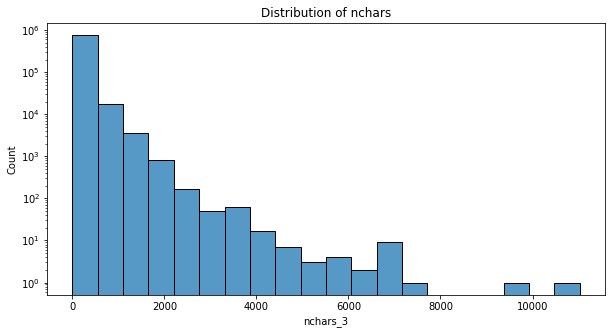

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
i = 3
plt.figure(figsize=(10,5))
sns.histplot(data=dfs, x=f'nchars_{i}', bins=20)
#sns.lineplot(data=dim_dist, x='perc', y='height', label='height', marker='o', markersize=4)
plt.title('Distribution of nchars')
#plt.legend()
#plt.ylabel('pixels')
plt.gca().set(yscale='log')

In [125]:
with pd.option_context('display.max_colwidth', None):
    display(dfs[dfs[f'nchars_{i}'] > 6000][f'text_{i}'].to_frame())

text_3
145775   ll! I" !In Ili; 'in I!li '1"11111":' IiI! \n' III I \n'l,iI '111111 I!lrm \nI \n;lliI \ni\n. H: ~i' ! l!ii iii, I'ii i;: !iii l~ ,iii i!! lil! i.i :1' j'li lki : I ,., ., ,.b ::, '\n'ifu 'ht"!H Hfilf \n' "::\n'f. 'II+'~ j.l' lliH i'i' .'~ \n, 11 \n.!i I!i ';1 111/'1111 "I,;! !i' II!I !:'!II 'g~ i!il iii. L illil lilii !l l!TIi I iiil [Ii I !I l! \nj' \n', II! !' ; !Ii. fjli !lIl rrn !Ip !ill ,1, ill! I II ,i, ;;1; II! 'I'i 111 \n1:1 ., I. , i P! !"l.!. \ni! ,!ill!li m'llI ! !I ~I illilil :; H!! ,[II f"'1 ,II! II! 11111 'iii'!!!! lin IiI! ilJl 'Ii! I!I'I /Iii III III! iill'i' kl' !P! '!i II:: ! J' a \n.! ill! ,!!IIi!! !lilllii!ll!!i I!', 'I\! ' !! 1'1,1' Iii j;m . 111 \n11! III!illiiI ljlil !l!!I!II! lIil '!I: !Iil !!i\n1\nii! !II ! I. \nI\nI,ll" ., \n'1111 \n'1 \nI: It .. Ii;' "1' fIT" \nit* I~! * 1*":I" 'iill'. hi \n['[ " \nlitl \n'!t! \n.... \n.. \n!Ill n,l inl!ill I!,' !oli !I, \n!.!"!'! 'I' . iii I .1 \nl;ii',' -h ::,' ~~ I,! l:jI \n, III. :,1111 Iii d!l:iill lilif *i!: !III!, I i.1: I iii! iii' I..! !II \n,I "I! I,\nI! li!1 iii I \nII! \n,1:1 itt' ;:: ;i'! Ii !i', un i!H iiI! I '! i!i IHi j!i Iii :' \n'1" " 1"":" "'1 1' "*** '\n""'"" ":1"" \n'\ '1'1""" ' \n.,. \n''1 "1"1111 ""1" "":1111' \n' 1IIIiilil'I'" ''''' [ '\nII ::: t::i ::1 ,Iii I I It!: H! \n\l~l.;;. '1 :1 ::U 1::: :f ':1' :::! I HI::: :i:l \n'~ t ":; \n*\nI:Y=.**""'* ~*"'I" ij: \n:!1 !! \n.11; I ! Ik'i,'1 :1; \n.! j !il :i!! tJi: \n!:~, 'f :1 l!:! .j:! i: :; Ii! \n' 1 ~ \nItlll'i, 1'liI ifji *li* 1:1111 i n !llfIJii! :lIT iili ,Ii d "i: In: i"'iI J!r In I'rr 1'[lI'II'[H \nIi!i 01': i!:: :i", Iii' hi! :i:1 'Ir ft"m. ::,! ft;I~~h , '! ~' I~ 'd' I* \nII'~ 'IH h ,nlHI! !I' I ! \nl: ijii ! I!!11 \niii !tit im if I iii' il'li!ih ,i:1 if I' mt i:i. -I'P In;l!lti '" \n,iI!. .1.. \ni!1 1. 1I , .. I \. \n" .* , 1.1 .. :!! , .. \n* * I:! \nill 1 \n!. ::1: II;: ,' ... , " \n. \n.1 \nI, \n::1: \ninlt"l ... ". , fit. I \n.1 \n.* \nII !I Ii HlliiL lUI \n!i!i! . \n:::::::;: ... . !! i,<!iUiili! j!lj,lLj:!.lIi !:~' \nlin l:!i ,i'UlJ!;!II!I!!1 ! !!!IlliiH liH I!i!,I!!JlU:Jil l!i ln'il \n:liilf!llli i!ljI,!!, illl<<l , \nI~:i i:i;!!!iIl!' !::II \n.II !.I: .~. I: 'ii! Ui l ii!:ili!!i!::::ii :I\n11m \nIIH I' iii" iii; ::n ,*n fi:: 'i"" lil! !![I II;fj:!:!" :jT:!!ii F, I!;; i : \n1,lli!d II''';: 1,'1: I,;! ililll~l: : I I '1n'IIH"11 i";Hi! WII i,!] mliE, 1'1 IT!HI'!', Ifif. Hf"I'fIT Ili : \ni!l;; ;ili q ::i: Hi' "i' '::: I:,: ::i' II:' 'i'! 'ii' "'i ,p.:H; I ' \n'I l 'IIrJ1.i liTI: Iijji V Y=.ill;' "\nI \nI' \nI: !!~ !';:; j ' : ::.! I:: ::. 1 I::: :'. :\ 1 lid :q l I ! !i!. ill! !lH I : I \n, I !d \nill \ni=! j :ql I: : lid I"! !1. \n11:. ,11 i1E ::!I '1 :: I: !: Ill! :111 a,!:: :.U I: :: t!1 :ill'; \n~. :,.! .:h! n \n! IHII :11 \n1I'1I1! .l llltli Ii. II I' h 1:l1t I ! I I \nI I 11 \niii !ll! 1 11'1 I" PI W' "'I'f' , .. '1" ,,, II'\n'" ". 'I' II' '11 ;~ffI" 1" 1' \n; \n, \nI \n',:i '::: iii! "" Ij!l iii. !II :::: ::ii 'w "I ! .i'! ::! 1!H ,i; Ii I ~, \n; ,'Ii g i!l! :,,' , I! 'it! ,'; ,; 'jU fti :11" \n. \n" \n'I\n. , ... ' .,., ... , .... .. II'J 1 ""I' \n' \nI ' \n" \n'"11'''' II:", " ""1"'" ." , ... , ...... ,' \n. '''' iii ii:' .,:! '!:! If~ :ii: ' i' ,!: i!!1~ :ili #': ~4i ' " \nrrp. ........ ....\ni! II I " 'llI I ' il' ,WI' \n'I i:;; !if! Hi: 11i !1 ti11! ,In 11m! 11IT ff iTTl ttr ' 11111 rti I IT ~l ~ iF i I !I! \nil; '.:! \n,I I " , iii ili: ,,,. i'. lii.lhil I ' It 'I inhil ttf: 11 [, "i! 'ITf imtt?; m, iii! Tii i'l: iil' liii \nh \nl!:!n'i ::[1 ii: im i;:,~f:;~ liii 1:1' ::i"1 'iIi iFI 'Ip :iT i, ,:' ITI \nI\nim \n;' j' ',:1 1 , ' I; " ' r \n': ' ... .. :,~ ::.~ ::,. ;',: ;': ~.r. ;1 , .. ~ ;.: :;1 1\n:',':'! . ",. ~;: 'j:: I~;; :;;; :::. :11; . ,. ~.;: ::.; ::.: .";. :./. \n',I;. :' . ;::~ ";':I':':.t " I \n:; I, ,: :,: ~: ;':, 111 \n~: I.J J: \ni1!: H :jl: :i:1 iU iii! j~! iii: 1::1' ill: i-I':l~ii !'I'tt if!! !II'III!tl~~I: :Il~ i~l ',:~jl' :lil lii,! 1;ll j'iH !ilt HII{w'I': :1:'1 !~I ~li'li: 'tl i:~ ill'l i!~I~jl liUI: 1!rt 'i :Iijli~( '11\n'lhl'~ ~~

**analysis** so we did remove some bad boxes this way. We still have some long bad boxes, though. 
And a bunch of these are tables of contents...

### Continuing on... filter no letter

In [18]:
i = 4
BASE_PIPELINE[i]

<function nrcan_p2.data_processing.preprocessing_df_filter.filter_no_letter(df, col)>

In [19]:
i = 4
dfs_filtered = BASE_PIPELINE[i](dfs, f'text_{i-1}')

/nrcan_p2/workspace/sraimondo/nrcan_p2/nrcan_p2/data_processing/preprocessing_df_filter.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['letter_count'] = df[col].str.count(f'[a-zA-Z]')


In [132]:
res = dfs[~dfs.index.isin(dfs_filtered.index)].sample(20)
res[[f'text_{i-1}']]

text_3
24979                    34 \n
12885                  1998 \n
540928            12 2' 390 \n
574968            .* \n. !? \n
1019672                     \n
300320                  212 \n
571024                 *-.\ \n
315738                    * \n
306765   12,7 \n10,4 \n10,5 \n
472228                . - - \n
352201                    , \n
644915                2,290 \n
2907885                  ---\n
1553579                  23%\n
364159         7 - - - - -~ \n
2877148                  13 \n
2681404                   * \n
207846                 1000 \n
202634                 77,9 \n
2586074                   2 \n

In [44]:
print(dfs.shape)
print(dfs_filtered.shape)
print(1- dfs_filtered.shape[0]/dfs.shape[0])

(768949, 16)
(510125, 16)
0.33659449456335855


In [20]:
dfs = dfs_filtered

In [19]:
dfs.shape

(510125, 16)

**analysis** this removed 33% of the boxes (Which is almost the same as nrcan) -> this still seems like a good idea

### Let's remove the no_real_words_g3letter one first

In [21]:
from nrcan_p2.data_processing.pipelines import BASE_PIPELINE_CLEAN
BASE_PIPELINE_CLEAN

[<function nrcan_p2.data_processing.preprocessing_dfcol.rm_dbl_space(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_cid(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.convert_to_ascii(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_nonprintable(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_no_letter(df, col)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline_hyphenation(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_no_real_words_g3letter(df, col, en_dict=<enchant.Dict object at 0x7ff68ed2fd30>)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_email(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_url(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_doi(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_phonenum

In [22]:
i = 5
BASE_PIPELINE_CLEAN[i]

<function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline_hyphenation(dfcol)>

In [48]:
dfs.columns

Index(['Unnamed: 0', 'obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1', 'pos_y1',
       'text', 'file', 'text_-1', 'text_0', 'text_1', 'text_2', 'text_3',
       'nchars_3', 'letter_count'],
      dtype='object')

In [23]:
i = 5
print(i)
dfs[f'text_{i}'] = BASE_PIPELINE_CLEAN[i](dfs[f'text_{i-2}'])

5


In [50]:
with pd.option_context('display.max_colwidth', None):
    res = dfs[dfs[f'text_{i-2}'] != dfs[f'text_{i}']]
    print(i)
    print(res.shape)
    res = res.sample(20)    
    display(res[[f'text_{i-2}', f'text_{i}']])

5
(13463, 17)


text_3  \
3790662                                                                                                                                                                                    Valley-type deposits tend to form clusters of orebodies\nof various shapes and sizes (tabular, prismatic, and\nirregular bodies, up to a few hundred metres in long\ndimension) within a small part of the carbonate area.\nThe Pine Point district, for example, has 36 orebodies\nin an area 65 x 24 km, that range between a fraction of\na million to 3 million tonnes of ore (Rhodes et al.,\n1984). The total resources are 75 million tonnes aver-\naging approximately 3% Pb and 7% Zn. It is apparent\nthat the Artillery Lake district has the 'room' for sev-\neral deposits. The maximum thickness of the Artillery\nLake Formation is preserved in the region southeast of\nCrystal Island, which therefore may be regarded as\nhaving better potential than elsewhere. But in the\nabsence of relevant geological and exploration data,\nother parts of the formation cannot be readily dis-\ncounted as having low potential. \n   
1657310                Usually kimberlites manifest themselves a s cone- \nshaped diatremes (= Fig. 25.1-2A), with steeply dipping \n(75'435") country rock contacts. Diatreme facies rocks con- \nsist mainly of tufisitic kimberlite breccias, which are rela- \ntively uniform compared to crater or hypabyssal facies \nrocks. Although a diatreme can be comprised of ten to \ntwenty separate, identifiable types of kimberlite, grades \nare relatively uniform throughout the diatreme. This is \nenvisaged a s a result of mixing processes involved in \ndiatreme formation (Mitchell, 1991). Grades reported from \nmined kimberlite diatremes are highly variable, i.e. 4 d l 0 0 t \n(Letseng), 60 c/100 t (Systanskaya, Yakutia), 120 c/100 t \n(Venetia, South Africa), 400 d l 0 0 t (International, Yakutia). \nVery high grades may be encountered in weathered dia- \ntreme facies kimberlite a t the surface. Wagner (1914) \nobserved a t the Premier pipe that surface grades (highly \nweathered kimberlite) were initially more than 150 c/100 t \nbut after four years of mining were less than 50 ~1100 t and \n   
1705644                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      tuff. Deposition of higher temperature polymetallic sul- \nvhide minerals takes d a c e in the tectonicallv active and \nhster spreading seL&ents in the propagating parts of \nridges. \nMetalliferous sediments, including manganese nod- \nules, accumulate throughout the entire period of ridge \ndevelopment in basins distal from ridge axes where the \nrate of clastic sedimentation is low. \nHydrolithic sediments (e.g., chert) are commonly inter- \nspersed with volcanic rocks, clastic sediments, and dolo- \nmite, and record hydrothermal-effusive and exhalative \nprocesses in the history of an area. \n   
3431312                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              sheet. Thus, subglacial (R) channels are short and short\nchannel-fan segments are deposited in them. As the ice\nretreated, short channel-fan segments

### Rm newlines...

In [24]:
i = 6
BASE_PIPELINE_CLEAN[i]

<function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline(dfcol)>

In [25]:
dfs[f'text_{i}'] = BASE_PIPELINE_CLEAN[i](dfs[f'text_{i-1}'])

In [53]:
with pd.option_context('display.max_colwidth', None):
    res = dfs[dfs[f'text_{i-1}'] != dfs[f'text_{i}']]
    print(i)
    print(res.shape)
    res = res.sample(20)    
    display(res[[f'text_{i-1}', f'text_{i}']])

6
(510121, 18)


text_5  \
2726868                                                                                                                                                                                                                                                                                                                                                                                         2.5 y 6/ 2 \n   
645217                                                                                                                                                                                                                                                                                                                                                                    sand \n_.i. 'tC ial sandy \nclay \n   
275484                                                                                                                                                                                                                                                                                                                                                                                                  la \n   
268776                                                                                                                                          Constructions en aluminium (a !'exception des \nconstructions prefabriquees du ndeg 94 .06) et \nparties de construction en aluminium, barres, \nprofiles, tubes et similaires, en aluminium, \nprepares en vue de leur utilisation dans la \nconstruction \n   
2570153                                                                                                                                                                                                                                                                    tectonic history of a Laurentian crustal fragment in South \nAmerica; Geological Society of America, \nSpecial Paper 341, 131 p.\n   
297440                                                                                                                                                                                                                                                                                                                                                                                      tnergie, Mines \n   
283450                                                                                                                                                                                                                                                                                                                                                                                          Republique \n   
742115                                                                                                                                                                                                                                                                                           1973: Geological Survey of Canada radiocarbon dates\nXIII; Geological Survey of Canada, Paper 73-7,\n61 p.\n   
3188593                                                                                                                                                                                                                                                                                                                                                          \nPaleowind measurements \nlocation (all) \n   
3790743  KZ-08-A11-NE-1-3\nKZ-08-A11-NE-1-5\nKZ-08-A11-NE-1-6\nKZ-08-A11-NE-2-5\nKZ-08-A11-NE-2-6\nKZ-08-A11-SW-1-1\nKZ-08-A11-SW-1-2\nKZ-08-A11-SW-1-5\nKZ-08-A11-SW-1-6\nKZ-08-A11-SW-2-1\nKZ-08-A11-SW-2-2\nKZ-08-A11-SW-2-6\nKZ-08-A11-SW-X\nKZ-08-A21-2\nKZ-08-A21-4-1\nKZ-08-A21-4-2\nKZ-08-A21-5-1\nKZ-08-A4-1-4\nKZ-08-A4-1-5\nKZ-08-A4-2-1\nKZ-08-A4-3-4\nKZ-08-A4-3-5\nKZ-08-A4-4-2

### filter no words g3 letter

In [26]:
i = 7
BASE_PIPELINE_CLEAN[i]

<function nrcan_p2.data_processing.preprocessing_df_filter.filter_no_real_words_g3letter(df, col, en_dict=<enchant.Dict object at 0x7ff68ed2fd30>)>

In [27]:
dfs_filtered = BASE_PIPELINE_CLEAN[i](dfs, f'text_{i-1}')

In [63]:
res = dfs[~dfs.index.isin(dfs_filtered.index)].sample(20)
res[[f'text_{i-1}']]

text_6
478570   ~Cer.1.po r o.ry hL.rdno::; s i s the di fi'E-...
87755                                        "Hungarites" 
15048    '.'-"' >-l :lJ * ?1 . til > tl ;:;* " :i:: 0 3...
3371620                                            z) / M 
2734719  IO 2 K 2 2 2 2 4 34 2 4 K 4 4 l K 2 2 K Ill 30...
195205                                            Cl> Ill 
2596718                               13N 13N 13N 13N 13N 
2668790                                          NA0-1550 
207589                                              t h e 
2672704                                               NIA 
305408                                            charbon 
805390                                                 o. 
2902397                                               F C 
665813                                      11 l--z-1-- l 
302487                                           Austrahe 
1919798                                               CDP 
2197                                         62 - 4028(b) 
2922989  . J~r*. Jta. '13 . ' * , , ... ~7 ,.!0 t. w'1 ...
774192                                                 3W 
2722346                                              J :i

In [59]:
print(dfs.shape)
print(dfs_filtered.shape)
print(1- dfs_filtered.shape[0]/dfs.shape[0])

(510125, 22)
(284762, 22)
0.44177995589316343


this removed about 44% of the boxes!!!

In [28]:
dfs = dfs_filtered

###  Rm emails

In [31]:
dfs.to_parquet('sample_a_100_dfs_7.parquet')

In [3]:
import pandas as pd
dfs = pd.read_parquet('sample_a_100_dfs_7.parquet')

In [11]:
dfs.columns

Index(['Unnamed: 0', 'obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1', 'pos_y1',
       'text', 'file', 'text_-1', 'text_0', 'text_1', 'text_2', 'text_3',
       'nchars_3', 'letter_count', 'text_5', 'text_6', 'is_enchant_word',
       'word_char_num', 'is_enchant_word_and_g3l', 'any_enchant_word_and_g3l',
       'has_email'],
      dtype='object')

In [6]:
from nrcan_p2.data_processing.pipelines import BASE_PIPELINE_CLEAN

In [13]:
i = 8
BASE_PIPELINE_CLEAN[i]

<function nrcan_p2.data_processing.preprocessing_df_filter.filter_with_email(df, col)>

In [14]:
dfs_filtered = BASE_PIPELINE_CLEAN[i](dfs, f'text_{i-2}')

In [17]:
with pd.option_context('display.max_colwidth', None):
    res = dfs[~dfs.index.isin(dfs_filtered.index)].sample(20)
    display(res[[f'text_{i-2}']])

text_6
1063041                                                                                                                                                                                                                                                                                                                                              Geological Survey of Canada Bookstore (Calgary) 3303-33rd Street, N.W. Calgary, Alberta T2L 2A7 Tel.: 403-292-7030 Fax: 403-299-3542 E-mail: gsc_calgary@nrcan.gc.ca Web: http://gsc.nrcan.gc.ca/org/calgary/pub/ 
473232                                                                                                                                                                                                                                                                                                                                                                                                                   L. Ootes (luke_ootes@gov.nt.ca) Northwest Territories Geoscience Office Box 1500, 4601-B 52 Avenue Yellowknife, Northwest Territories X1A 2R3 
1063038                                                                                                                                                                                                                                                                                                             Geological Survey of Canada Bookstore (Atlantic) 1 Challenger Drive P .O. Box 1006 Dartmouth, Nova Scotia B2Y 4A2 Tel.: 902-426-4386 Fax: 902-426-4848 E-mail: Jennifer.Bates@nrcan-rncan.gc.ca Web: http://gsca.nrcan.gc.ca/pubprod/pubprod_e.php 
360938                                                                                                                                                                                                                                                                                                                                                                                                                                     R.I. Thompson (bothomps@NRCan.gc.ca) GSC Pacific (Sidney) 9860 West Saanich Road, Rm. 3720 Sidney, British Columbia V8L 4B2 
70432                                                                                                                                                                                                                                                                                                                                                                                  Pour obtenir des renseignements sur les droits de reproduction, veuillez communiquer avec Ressources naturelles Canada a l'adresse nrcan.copyrightdroitdauteur.rncan@canada.ca. 
2928362                                                                                                                                                                                                                                                                                                                                                                          Commercial reproduction and distribution is prohibited except with written permission from NRCan. For more information, contact NRCan at nrcan.copyrightdroitdauteur.rncan@canada.ca. 
1657579                                                                                                                                                                                                                                                                                                                                                                                                                                                        K. Williamson (kenneth.williamson@goldcorp.com) Goldcorp Inc. Red Lake Mine Balmertown, Ontario P0V 1C0 
237786                                                                                                                           

In [18]:
print(dfs.shape)
dfs = dfs_filtered
print(dfs.shape)

(284762, 23)
(284566, 23)


In [ ]:
It doesn't seem like we missed ay of the @

In [19]:
dfs.to_parquet('sample_a_100_dfs_8.parquet')

## Rm url

In [20]:
from nrcan_p2.data_processing.pipelines import BASE_PIPELINE_CLEAN

In [21]:
from nrcan_p2.data_processing.preprocessing_dfcol import rm_url, rm_dbl_space

In [22]:
i = 9
BASE_PIPELINE_CLEAN[i]

<function nrcan_p2.data_processing.preprocessing_dfcol.rm_url(dfcol)>

In [26]:
import tqdm
tqdm.tqdm.pandas()

import re
dfs[f'text_{i}'] = rm_dbl_space(dfs[f'text_{i-3}'].progress_apply(lambda x: re.sub(r'\b((http(s)?|ftp):\/\/)?(www\.)?(([-a-zA-Z0-9@:%_\+~#=]+\.){1,256})[a-z]{2,6}\b((([-a-zA-Z0-9@:%_\+~#?&//=]+\.?)*)?([-a-zA-Z0-9@%_\+~#?&//=]))?', ' ', x)))


100%|██████████| 284566/284566 [00:05<00:00, 54319.06it/s]
<ipython-input-26-315bae08e091>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[f'text_{i}'] = rm_dbl_space(dfs[f'text_{i-3}'].progress_apply(lambda x: re.sub(r'\b((http(s)?|ftp):\/\/)?(www\.)?(([-a-zA-Z0-9@:%_\+~#=]+\.){1,256})[a-z]{2,6}\b((([-a-zA-Z0-9@:%_\+~#?&//=]+\.?)*)?([-a-zA-Z0-9@%_\+~#?&//=]))?', ' ', x)))


In [31]:
with pd.option_context('display.max_colwidth', None):
    res = dfs[dfs[f'text_{i-3}'] != dfs[f'text_{i}']]
    print(i)
    print(res.shape)
    res = res.sample(20)    
    display(res[[f'text_{i-3}', f'text_{i}']])

9
(4159, 24)


text_6  \
665495                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         to 9.S dry hol es . Wells in which wn.ter is encou...'1tered o.ro of    
2930971                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Indian and Northern Affairs Canada (now Aboriginal Affairs and Northern Development Canada), 2008. Retrieved from the Government of Northwest Territories website: http://apps.geomatics.gov.nt.ca/ArcGIS/rest/services/Mosaics/MVAP_Mosaic_Combined_LCC/MapServer.    
511622                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           divided by LeRoy into the -Brooklyn formation, .consisting of lim~stone .and its altered equivalents, and the Rawhide formation, consisting of argillites. ~a.sp~roids were b e li eved to b e chi ef ly silicified limestone and, cons8quently, to be a part of the Brooklyn formation. The Rawhide form~tion was found to overlie the jasperoids, and was, therefore, considered to be younger than the Brooklyn forITlf.l.tion.    
732128                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      deposit. The biotite-schist- gran ite contact at the deposit strikes . abou~ 45 degrees east of north arJ.d dips 70 aegrees northwest.. *~t' Ji s not a sharply defina1;lle feature' ho'v.rever' as numero:us pa,r.allel granite dykes, 1 to 20 feet wide, cut tlie .. $chi ~,t :in *a.    
654404                                                

In [ ]:
So it doesn't affect that many rows, but where it does, it removes things like red.norn as well as real urls

### Rm doi

In [32]:
i = 10
BASE_PIPELINE_CLEAN[i]

<function nrcan_p2.data_processing.preprocessing_dfcol.rm_doi(dfcol)>

In [33]:
dfs[f'text_{i}'] = BASE_PIPELINE_CLEAN[i](dfs[f'text_{i-1}'])

<ipython-input-33-a8db9d71e30d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[f'text_{i}'] = BASE_PIPELINE_CLEAN[i](dfs[f'text_{i-1}'])


In [34]:
with pd.option_context('display.max_colwidth', None):
    res = dfs[dfs[f'text_{i-1}'] != dfs[f'text_{i}']]
    print(i)
    print(res.shape)
    res = res.sample(20)    
    display(res[[f'text_{i-1}', f'text_{i}']])

10
(247, 25)


text_9  \
1966334                                                                                                                                                                                                               techniques for base flow and recession analyses; Water Resources Research, v. 26, no. 7, p. 1465-1473. doi:10.1029/WR026i007p01465    
1966174                                                                                                                                                                                                  ment of the influence of the unsaturated zone on aquifer vulnerability; Ground Water, v. 38, p. 193-199. doi:10.1111/j.1745-6584.2000.tb00330.x    
2930890                                                                                                                                                                                                                Mackenzie Delta and Tuktoyaktuk in the Beaufort Sea; Geological Survey of Canada, Open File 7685, 1 .zip file. doi:10.4095/295579    
1926421                                                                                                                                                                                                                                                              ISSN 0068-7626 Catalogue No. M42-598E-MRC ISBN 978-0-660-19998-6 doi:10.4095/288107    
150937                                                               Harrison, C.C., Embry, A.F., and Ross, G.M., 1999. Nd isotopes, geochemistry and constraints on sources of sediments in the Franklinian mobile belt, Arctic Canada; Geological Society of America Bulletin, v. 111, p. 578-589. doi:10.1130/0016-7606(1999)111<0578:NIGACO>2.3.CO;2    
7580              Gibson, D.W., 1992. Stratigraphy, sedimentology coal geology and depositional environments of the Lower Cretaceous Gething Formation, northeastern British Columbia and west-central Alberta; Geological Survey of Canada, Bulletin 431, 127 p. (with contributions by J.H. Wall, J.A. Jeletzky, and D.J. McIntyre) doi:10.4095/183877    
3251123                      Recommended citation Baragar, W.R.A., 2017. Geological trans-sections of the Cape Smith Belt in the Nuvilik Lakes map area, Quebec (NTS 35-G); Geological Survey of Canada, Open File 8230, 1 .zip file. doi:10.4095/300550 Publications in this series have not been edited; they are released as submitted by the author.    
2747289                                                                                                                 Halchuk, S. (2009). Seismic Hazard Earthquake Epicentre File (SHEEF) used in the fourth generation seismic hazard maps of Canada; Geological Survey of Canada, Open File 6208; 16 pages (1 sheet); 1 CD-ROM, doi:10.4095/261333.    
3252947                                                                                                                                   Canada: Grid values of mean hazard to be used with the 2015 National Building Code of Canada; Geological Survey of Canada, Open File 7893,doi:10.4095/297378. Downloadable from the Earthquakes Canada website    
2872275                                                                                                                                     ussell HAJ, Peets J, Gorrell G, Sharpe DR, Hunter JA, 2003. Pontypool 'Golden Spike' borehole data compilation; Geological Survey of Canada, Open File 1746, 1 sheet, doi:10.4095/214401 [accessed Dec 2014]    
1966309                                                                                                                                                                                        fer hydrogeology from geophysical logs: The Passaic Formation, New Jersey; Ground Water, v. 35, no. 2, p. 328-338. doi:10.1111/j.1745-6584.1997.tb00090.x    
1966180                                                                                                                                                

The doi regex definitely isn't perfect, but it's not bad... spaces cause it to fail

### Rm phonenumbers

In [35]:
dfs.to_parquet('sample_a_100_dfs_10.parquet')

In [80]:
from nrcan_p2.data_processing.pipelines import BASE_PIPELINE_CLEAN

In [75]:
i = 11
BASE_PIPELINE_CLEAN[i]

<function nrcan_p2.data_processing.preprocessing_df_filter.filter_with_phonenumber(df, col)>

In [76]:
dfs_filtered = BASE_PIPELINE_CLEAN[i](dfs, f'text_{i-1}')

/nrcan_p2/workspace/sraimondo/nrcan_p2/nrcan_p2/data_processing/preprocessing_df_filter.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rm_phonenumber'] = rm_phonenumber(df[col])


In [77]:
with pd.option_context('display.max_colwidth', None):
    res = dfs[~dfs.index.isin(dfs_filtered.index)]
    print(res.shape)
    res = res.sample(20)
    display(res[[f'text_{i-1}']])

(781, 27)


text_10
50207                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Focus Scientific 1054 Bank Street OTTAWA KlS 3X2 (613)730-7767 (14, 16) 
49881                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [78]:
dfs = dfs_filtered

### Rm french

In [81]:
i = 12
BASE_PIPELINE_CLEAN[i]

<function nrcan_p2.data_processing.preprocessing_df_filter.filter_non_english(df, col, lang_detect_func=<function detect_langs at 0x7ffa642d5310>, do_filter=True)>

In [82]:
dfs_filtered = BASE_PIPELINE_CLEAN[i](dfs, f'text_{i-2}')

         Unnamed: 0                                       obj_type   pg  \
40                1  <class 'pdfminer.layout.LTTextBoxHorizontal'>  0.0   
41                2  <class 'pdfminer.layout.LTTextBoxHorizontal'>  0.0   
42                3  <class 'pdfminer.layout.LTTextBoxHorizontal'>  0.0   
44                5  <class 'pdfminer.layout.LTTextBoxHorizontal'>  0.0   
45                6  <class 'pdfminer.layout.LTTextBoxHorizontal'>  0.0   
...             ...                                            ...  ...   
4059021           3                                           None  NaN   
4059023           0                                           None  NaN   
4059026           0                                           None  NaN   
4059032           0                                           None  NaN   
4059035           0                                           None  NaN   

         pos_x0    pos_y0      pos_x1    pos_y1  \
40        45.27  500.5075  196.913190  520.7375 

In [84]:
with pd.option_context('display.max_colwidth', None):
    res = dfs[~dfs.index.isin(dfs_filtered.index)]
    print(res.shape)
    res = res.sample(20)
    display(res[[f'text_{i-2}']])

(26740, 29)


text_10
303319                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Autres pays 
186165                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Brute ou degrossle Simplement debitee, par sciage ou autrement, en blocs ou en plaques Autres, lncluant la poudre et les dechets d'ardolse 
263361                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Le gouvernement federal a annonce que l'environnement constituera une priorite de son prochain mandat. En 1988, le ministere a e1abore une politique environnementale con cernant ses propres activites et est en train de la remanier pour qu 1elle puisse s 1integrer a gouvernement globale federal. sources a l'etude. par secteurs des l'energie, de sciences de d 1une plus questions de grande portee !'atmosphere, presentation d 1options de politiques pour

In [89]:
dfs_filtered.shape[0]/dfs.shape[0]

0.9057737371601741

In [92]:
dfs_filtered = dfs_filtered.drop(columns='langs')


In [93]:
dfs=dfs_filtered

In [ ]:
Seems mostly reasonable. Hooray. This removed 10% of the text

### Rm slahses

In [94]:
dfs.to_parquet('sample_a_100_dfs_12.parquet')

In [114]:
from nrcan_p2.data_processing.pipelines import BASE_PIPELINE_CLEAN

In [96]:
i = 13
BASE_PIPELINE_CLEAN[i]

<function nrcan_p2.data_processing.preprocessing_dfcol.rm_slash(dfcol)>

In [97]:
dfs.columns

Index(['Unnamed: 0', 'obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1', 'pos_y1',
       'text', 'file', 'text_-1', 'text_0', 'text_1', 'text_2', 'text_3',
       'nchars_3', 'letter_count', 'text_5', 'text_6', 'is_enchant_word',
       'word_char_num', 'is_enchant_word_and_g3l', 'any_enchant_word_and_g3l',
       'has_email', 'text_9', 'text_10', 'text_11', 'langs_1_prob', 'langs_1',
       'langs_1_up', 'langs_1_down', 'lang'],
      dtype='object')

In [104]:
i= 13
matches = []
def replace_func(matchobj):
    g0 = matchobj.group(0)
    matches.append(g0)
    return ''
    
dfs[f'text_{i-2}'].str.replace(r"\S+/\S+", replace_func)

<ipython-input-104-8584ed30d712>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs[f'text_{i-2}'].str.replace(r"\S+/\S+", replace_func)


40.0                                               GEOLOGICAL 
41.0                                              PAPER 68-46 
42.0                                                   SURVEY 
44.0                                                   CANADA 
45.0                DEPARTMENT OF ENERGY, MINES AND RESOURCES 
                                   ...                        
4059021.0    Data has been collected and compiled to cover ...
4059023.0    Winters, W. J., Dallimore, S. R., Collett, T. ...
4059026.0    McNeil, D. H., 1999: Micropaleontology of the ...
4059032.0    Lorenson, T. D., Whiticar, M., Waseda, A., Dal...
4059035.0    A plexiglass plate with 4 brass electrodes mou...
Name: text_11, Length: 257045, dtype: object

In [106]:
print(len(matches))
print(len(set(matches)))
set(matches)

11957
5100


{'USGS/EROS',
 'ion/4-methylguaiaco',
 'bedding/cleavage',
 'Richelieu/Lake',
 'P(Y=0)=c=43/644',
 'S0/S1/S2',
 'OUIY/T[',
 '132deg38C/042',
 'i\\QQUA/CANQUA,',
 '2/4.',
 'Zr/Ti',
 'gms/cm.',
 'Rbs7/Srsa',
 '(Kg/m31',
 'Monocolpopo/lenites',
 'slope/aspect,',
 '26.1+/-',
 'Dia/Reg:',
 '10.1007/978-94-007-7079-9,',
 'CENTRE/CENTRE',
 '66-G/SW,',
 'J/15',
 'Wood/mesh',
 'Meeting/Reunion',
 'J/6);',
 '(116A/10)',
 'quartzand/or',
 '10/36;Samples',
 'erosion/deposition',
 'n=56/62',
 '120B/13',
 '69deg13C/352',
 'Pseudo/ibe/ifes',
 'cmol(+)/kg,',
 '4.5m/sec',
 'minOccurs="0"/>',
 'DIVISION/DIVISION',
 'MINFILE/vax',
 'I/10',
 '0)/Geologie',
 'w/v',
 'po/are.',
 'beige/brown/orange/yellow',
 'TIFF/JPG',
 '24A/8);',
 'X/IO',
 '039H/05',
 'hydrothermal/structural',
 '(12A/6),',
 'space/processing',
 'dune/ridge,',
 ")'-/I",
 'm3/d)',
 '30.1+/-',
 'Siltstones/sandstones:',
 ';83/8',
 'CAN/oz',
 'A267/A275',
 'type="RoadType"/>).',
 ';25/61',
 'm/s)=4.7X',
 'Paskapoo/Porcupine',
 '115-N/10,',
 

In [98]:
print(i)
dfs[f'text_{i}'] = BASE_PIPELINE_CLEAN[i](dfs[f'text_{i-2}'])

13


In [102]:
10144/dfs.shape[0]

0.03946390709797895

In [99]:
with pd.option_context('display.max_colwidth', None):
    res = dfs[dfs[f'text_{i-2}'] != dfs[f'text_{i}']]
    print(i)
    print(res.shape)
    res = res.sample(20)    
    display(res[[f'text_{i-2}', f'text_{i}']])

13
(10144, 32)


text_11  \
140428.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Submitting names to a "Geographical Names Board" /Proposant des noms a une reunion simulee    
363105.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  of the upper portion of the crustal rocks. Velocities in the 6 . 0 to 6.2 km/s range were observed near shot-point A,C,D, whereas the velocities near shot-points O and B were in the 6.25- 6.50 km/ s range .    
2859208.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Wardle, R.J., Gower, C.F., Ryan, B., Nunn, G.A.G., James, D.T., and Kerr, A., 1997. Geological map of Labrador, Map 97-07; Government of Newfoundland and Labrador, Department of Mines and Energy, Geological Survey GS# LAB/1226, scale: 1:1 000 000.    
2911075.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
This has the unfortunate effect of splitting up measurements (V/Am2), but I think we have to do it.
This affected 4% of the rows. 
Do we need to do it for bert?

In [ ]:
## Investigate...

In [118]:
matches = []
def replacement_func(matchobj):
    global matches
    g0 = matchobj.group(0)
    g2 = matchobj.group(1)
    
    matches.append(g0)
    return f" "
    
    #return g0
    #else:
    #return 

import string
punct = re.escape(string.punctuation)
ms = f"\S+([a-zA-Z][{punct}]"+"{2,}[a-zA-Z])\S+" 
print(ms)
m = dfs[f'text_{13}'].apply(lambda x: re.sub(ms, replacement_func, x))

\S+([a-zA-Z][!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]{2,}[a-zA-Z])\S+


In [119]:
print(len(matches))
print(len(set(matches)))
print(matches)

3646
3364
["North\\\\'l'Sl", 'ho\\\\*evc>r,', 'THERl\\!AL', '(Shima~.SS]_.,', 'Ca\'"Tion', "paragn('iss,", "diss('tnina", 'gn<*iss', 'quart:;,-biotitc-plagioclasc', 'MeetingAbstr.,v.', "Schi\\'ldt),", 'sub-"A"-horizon', 'appeared--do', '(T.-N.)', 'WordPerfect(r)-compatible', 'minds--or', 'of...ice', 'material--that', 'syncline...is', 'Silurian-(?)Devonian', 'Bathonian]-Callorian', "e.g.'Hypotype", '-ise,-ize.', 'kPa).The', '+biotite+chlorite+-muscovite,', 'hornblende+biotite+-chlorite.', 'Cu-Zn-Pb+-Au+-Ag', 'Silurian-(?)Devonian', 'Bathonian]-Callovian', '62(a)(iii)', "Ame::'ica", 'abo\\.lt', 'Minnedosa...our', 'Ca:.-tography', '8AS&"MENT', 'Mrs.A.(R.G)', '~~f?sei:._er', 'An<!erson', 'MacLareni=:.a~.', 'pr~~ted', 'Oc-.nogrephlc', 'RI..,I"a', 'Oap.,.tmant', 'Unf.,."lty', 'ar."eh,', 'ol.-rvetlon,', 'throu\\#lout', 'br.,k;', '.k>>ng', 'd.t.,",un.d', 'In.,ento"e.', 'ire""ent', '"e",pty"', '~TPU!_~Q~SJ~.T~', '~I:::NS', 'O(rOO--~n-(,_O', 'E_X_~Ef;D.lNG', 'Nt-.UF', "!=sd----oEGP.'m", '-\'~ill

In [ ]:
### Rm hyphen so that we can remove other punctuation

In [115]:
i = 14
BASE_PIPELINE_CLEAN[i]

<function nrcan_p2.data_processing.preprocessing_dfcol.rm_hyphen(dfcol)>

In [116]:
print(i)
dfs[f'text_{i}'] = BASE_PIPELINE_CLEAN[i](dfs[f'text_{i-1}'])

14


In [117]:
with pd.option_context('display.max_colwidth', None):
    res = dfs[dfs[f'text_{i-1}'] != dfs[f'text_{i}']]
    print(i)
    print(res.shape)
    res = res.sample(20)    
    display(res[[f'text_{i-1}', f'text_{i}']])

14
(70867, 33)


text_13  \
38654.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Initially, a search was performed around each control point and qualifying data were used to fit a weighted trend surface passing through each control point. A seco nd search was then performed to identify qualifying data around each grid note . Trend surfaces of qualifying data were projected to the grid node and a value was estimated using a distance-weighted average of these surface projections.    
653992.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Brannerite, uraninitc, uranium sil-    
2599590.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Fig. 23. Litholog of core 1985.2-1988.5 m of Sandy Point L-46.    
61887.0                                                                                                                                                                                                                                                                                                             

In [ ]:
## Investigate

In [120]:
matches = []
def replacement_func(matchobj):
    global matches
    g0 = matchobj.group(0)
    g2 = matchobj.group(1)
    
    matches.append(g0)
    return f" "
    
    #return g0
    #else:
    #return 

import string
punct = re.escape(string.punctuation)
ms = f"\S+([a-zA-Z][{punct}]"+"{2,}[a-zA-Z])\S+" 
print(ms)
m = dfs[f'text_{14}'].apply(lambda x: re.sub(ms, replacement_func, x))

\S+([a-zA-Z][!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]{2,}[a-zA-Z])\S+


In [121]:
print(len(matches))
print(len(set(matches)))
print(matches)

2532
2448
["North\\\\'l'Sl", 'ho\\\\*evc>r,', 'THERl\\!AL', '(Shima~.SS]_.,', 'Ca\'"Tion', "paragn('iss,", "diss('tnina", 'gn<*iss', 'MeetingAbstr.,v.', "Schi\\'ldt),", 'of...ice', 'syncline...is', "e.g.'Hypotype", 'kPa).The', '62(a)(iii)', "Ame::'ica", 'abo\\.lt', 'Minnedosa...our', '8AS&"MENT', 'Mrs.A.(R.G)', '~~f?sei:._er', 'An<!erson', 'MacLareni=:.a~.', 'pr~~ted', 'RI..,I"a', 'Oap.,.tmant', 'Unf.,."lty', 'ar."eh,', 'throu\\#lout', 'br.,k;', '.k>>ng', 'd.t.,",un.d', 'In.,ento"e.', 'ire""ent', '"e",pty"', '~TPU!_~Q~SJ~.T~', '~I:::NS', 'E_X_~Ef;D.lNG', "TUH'[F.liTv", 'Bucl*~;anan', '__,s=...t,.,r.:e:..:a:..:..m::.:.__.....:..;:le::..;v...,e=...l.___,', 'N~A~~~IC', '~e~~flYt_~DYrRUMUS', 'volume),for', '20f..Lm.', 'pro\\*ide', '(Ul\\.lKJNS)', '(Ul\\.lKJNS)', 'OOTS*COll:tUOU!!S)', '"\'deg~"\'"\'deg', '9l::fC,', '207Pbf""Pb', '207Pbf""Pb', '207Pbf""Pb', '~Fds~f,s~~~~~~~~i~:g~~;e9d6S)antle', '..,.....,v"v""\'v,.,..,..,v""\'v~', '~~~!1t!0e~~~~~yllite,', 'Lu<!pen;', 'o(r)wll][I]z', 'Spi::e1

In [127]:
with pd.option_context('display.max_colwidth', None):
    res = dfs[m != dfs[f'text_{i}']]
    print(i)
    print(res.shape)
    res = res.sample(20)    
    display(res[f'text_{i}'].to_frame())

14
(1964, 33)


text_14
764627.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 The economic products from the Silurian rocks of Ontario may be divided into two groups: the first including those products derived directly by quarrying or mining the ro,;ks outcropping at the surface, uch as building stone, road metal, gypsum, rock for flux, and cement, lime, brick, and tile manufacture; and the second those that have to be obtained by drilling, such as salt, petroleum, and natural gas. One small zinc prospect, though not of economic importance, will be described under the first division. 1 
257646.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     DEPTH F IRST OF 2 EVENTS THIS OAY, NORTHEAST OF MELVILLE I. !lEPTH = 10. KM IG::OPHYSI C IST 1 DEPTH = 10. KH CGEOPHYSI C ISTI 'IORTHEAST OF MELVILLE I S LANO 
642783.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   oldGr f or:mD..tio:::rn t hc..t unc~or li e the western of tho . 
2672890.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [ ]:
# Add () around brackets

In [144]:
from nrcan_p2.data_processing.pipelines import BASE_PIPELINE_CLEAN

In [129]:
i = 15
BASE_PIPELINE_CLEAN[15]

<function nrcan_p2.data_processing.preprocessing_dfcol.add_space_to_bracket(dfcol)>

In [132]:
print(i)
dfs[f'text_{i}'] = BASE_PIPELINE_CLEAN[i](dfs[f'text_{i-1}'])

15


In [133]:
with pd.option_context('display.max_colwidth', None):
    res = dfs[dfs[f'text_{i-1}'] != dfs[f'text_{i}']]
    print(i)
    print(res.shape)
    res = res.sample(20)    
    display(res[[f'text_{i-1}', f'text_{i}']])

15
(58009, 34)


text_14  \
68245.0                                                                                                                                                   Pegmatite, aplite and porphyry dykes are 4. common in deep drill holes south of the ore zones, indicating the presence of an intrusion at depth (Fig. 5, 9, 11 and 13). As observed in core, many of the quartz veins are texturally gradational with these intrusive dykes with increase in feldspar and biotite content. Such veins are often zoned with feldspar edges and quartz centres. Quartz veins also occur with euhedral quartz edges and aplite centres, that hydrothermal and magmatic fluids utilized common channelways. Generally quartz veins crosscut dykes, although some    
98127.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Hypotype GSC 28981, phragrnocone(?). Quatsino Limestone, near Klaskino Inlet, Vancouver Island, British Columbia (GSC loc. 86293).    
469811.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Chorlton, L.B. 1980: Geology of the La Poile River area (110 16), Newfoundland; Newfoundland Department of Mines and Energy, Mineral Development Division, Report 80 3, 86 p.    
1929568.0  To investigate vertical hydraulic conductivity variability in the ACVAS project, slug tests were performed in three wells, using a straddle packer system. Slug tests were performed by rapidly lowering the water level in the pipe string connected to the test interval and monitoring its recovery. Similarly to the slug tests, a pneumatic system (compressed air) was used to lower the water level and a pressure transducer served to monitor the recovery. This system has the advantage of being very accurate, especially in highly permeable horizons where the test duration may be less than a few seconds (Zurbuchen et al., 2002). However, in low K horizons, it may take a few hours to recover the initial water level.    
762244.0                                                                                                                                                                                                                                                                                                                                                                                                                                                 Much gas is derived from the Medina sandstone (the Whirlpool and overlying beds) in Niagara peninsula and as far west as Delhi. The Clinton limestone furnishes gas in the Onondaga, Caledonia, Cayuga, and Port Colborne fields. The Guelph dolomite is gas bearing in eastern Essex county.    
49877.0                                                                                                                                                                                                                                                                                                                                       

In [ ]:
# Investigate

In [134]:
matches = []
def replacement_func(matchobj):
    global matches
    g0 = matchobj.group(0)
    g2 = matchobj.group(1)
    
    matches.append(g0)
    return f" "
    
    #return g0
    #else:
    #return 

import string
punct = re.escape(string.punctuation)
ms = f"\S+([a-zA-Z][{punct}]"+"{2,}[a-zA-Z])\S+" 
print(ms)
m = dfs[f'text_{15}'].apply(lambda x: re.sub(ms, replacement_func, x))

\S+([a-zA-Z][!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]{2,}[a-zA-Z])\S+


In [135]:
print(len(matches))
print(len(set(matches)))
print(matches)

2205
2140
["North\\\\'l'Sl", 'ho\\\\*evc>r,', 'THERl\\!AL', 'Shima~.SS]_.,', 'Ca\'"Tion', 'gn<*iss', 'MeetingAbstr.,v.', "Schi\\'ldt", 'of...ice', 'syncline...is', "e.g.'Hypotype", "Ame::'ica", 'abo\\.lt', 'Minnedosa...our', '8AS&"MENT', '~~f?sei:._er', 'An<!erson', 'MacLareni=:.a~.', 'pr~~ted', 'RI..,I"a', 'Oap.,.tmant', 'Unf.,."lty', 'ar."eh,', 'throu\\#lout', 'br.,k;', '.k>>ng', 'd.t.,",un.d', 'In.,ento"e.', 'ire""ent', '"e",pty"', '~TPU!_~Q~SJ~.T~', '~I:::NS', 'E_X_~Ef;D.lNG', "TUH'[F.liTv", 'Bucl*~;anan', '__,s=...t,.,r.:e:..:a:..:..m::.:.__.....:..;:le::..;v...,e=...l.___,', 'N~A~~~IC', '~e~~flYt_~DYrRUMUS', '20f..Lm.', 'pro\\*ide', 'Ul\\.lKJNS', 'Ul\\.lKJNS', '"\'deg~"\'"\'deg', '9l::fC,', '207Pbf""Pb', '207Pbf""Pb', '207Pbf""Pb', '~Fds~f,s~~~~~~~~i~:g~~;e9d6S', '..,.....,v"v""\'v,.,..,..,v""\'v~', '~~~!1t!0e~~~~~yllite,', 'Lu<!pen;', 'wll][I]z', 'Spi::e111:11eth1U"', '..Ci::it,!Cjll.', 'SUl!!hide', 'SUl!!hide', 'SUl!!hide', 'MA~~~:n*', ':3n~;.:f.~:', 'Jr.,Bailes', ':*:.;.,.,.,,

In [ ]:
Ok so it looks like this is now basically garbage left 

In [ ]:

Should we just drop those words completely or do what we did last time and replace them with a single piece of punctuation

In [142]:
matches = []
def replacement_func(matchobj):
    global matches
    g0 = matchobj.group(0)
    g2 = matchobj.group(1)
    
    matches.append(g0)
    if len(g0) < 5:
        if g0 in [".,", "),", ").", ".)", "%;", "%.", "%,", ".\"" "\";", "):", "?)", "%:"]:
            return g0

        if g0 in ["(?)", "(%)"]:
            return g0
    
    #print(g0.split())
    if len(g0.split()) == 0:
        return ""
    
    m0 = g0.split()[0]
    #print(m0)
    
    if m0[-1] in [".", ",", ";"]:
        #return "[REPLACE "+ g0 + "->" + m0[-1]+"]"
        return m0[-1]
        #return g0
    
    #matches.append(g2)
    #return f"[REPLACE {g0} -> {g0[0]}]"
    return g0[0]

ms = f"([{punct}]" + "{2,}" + f")"
print(ms)
ms = dfs['text_15'].apply(lambda x: re.sub(ms, replacement_func, x))


([!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]{2,})


In [143]:
print(len(matches))
print(len(set(matches)))
print(matches)

83154
3591
['.,', '.........................................', '..', '..', '....', '....................', '..', '..............................', '..........', '....', '..', '..', '....', '.................', '.....................................', '.............', '...................................', '...', '..........', '..............................', '............', '...................................................', '.........', '........', '..', '......', '..', '..', '.................', '......', '.......', '...', '...................', '.........', '...', '...', '...', '.................', '..', '...', '................', '.....', '......', '..................', '.........', '..........', '................', '.......................', '...', '.................', '..', '.......', '......', '....', '......', '..........', '....', '..', '...', '.......', '.....', '.....*..***..', '....................', '.......', '..................', '....................', '............

In [ ]:
## Repeat - squish punct

In [172]:
from nrcan_p2.data_processing.pipelines import BASE_PIPELINE_CLEAN

In [173]:
i = 16
BASE_PIPELINE_CLEAN[i]

<function nrcan_p2.data_processing.preprocessing_dfcol.squish_punct(dfcol)>

In [174]:
print(i)
dfs[f'text_{i}'] = BASE_PIPELINE_CLEAN[i](dfs[f'text_{i-1}'])

16


In [175]:
with pd.option_context('display.max_colwidth', None):
    res = dfs[dfs[f'text_{i-1}'] != dfs[f'text_{i}']]
    print(i)
    print(res.shape)
    res = res.sample(20)    
    display(res[[f'text_{i-1}', f'text_{i}']])

16
(13780, 35)


text_15  \
2325605.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Age of Oldest Fission Track ( Ma ) Dpar ( um ) = 1.86: 39.2 + 2.2 Ma Timing of Initiation of Uplift Cooling ( Ma ) Dpar ( um ) = 1.86: >=39.2 + 2.2 Ma    
750017.0   The Quaternary history of this vast inland sea has been virtually unknown owing to the paucity and short span of stratigraphic information. Inferences on the glaciation of this area have therefore been speculative and based largely on results from surrounding areas. The question of when and how the area was glaciated remains largely unresolved. For the submarine area, only two major works bear on the Quaternary history. Conolly et a!. ( 1967 ) studied nine cores up to 12 m long from Laurentian Channel, Llnd noted two thin ( 10 20 cm ) brick red so called "tills" within and on top of mainly glaciomarine mud. the thickness and content of these layers are more probably ice shelf deposits related to a grounded glacier on Magdalen Shelf. Their age is unknown. In contrast, Loring and Nota ( 1973 ) studied provenance of surficial sediment and concluded that only a major ice sheet emanating from the Shield had crossed the area in Late Wisconsinan time. There are no dates to support this rontention, so to reconcile their interpretation with those from surrounding areas, the event is assigned an Early Wisconsinan age; no subsequent glacial action has ocrurred to disturb the dispersal pattern.    
450689.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       SCHEEL, Karl and GEIGER, H., "Handbuch der Physik." See No. 833 of this list.    
716343.0                                                                                                                                                                                                                                                                                                                                          

In [ ]:
Honsetly the above looks pretty reasonable. We are definitely going to lose some real info (e.g. >= ) but whatever

In [ ]:
## Investigate

In [191]:
matches = []
def replacement_func(matchobj):
    global matches
    g0 = matchobj.group(0)
    g2 = matchobj.group(1)
    
    if re.match(f"\S+(([{punct}]\s+)(\)\s+)([{punct}]\s+)" + ")\S+", g0):
        pass
    else:
        matches.append(g0)
    
    #if g2[0] in ["(", ")"]:
    #    return g2[0] #f"[REPLACE {g0} -> ?]"
    #else: 
    return g2[0]
    #return g0
    #else:
    #return 

print(punct)
ms = r"\S+(([!\"\#\$%\&'\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]\s+)" + "{3,})\S+"
print(ms)
m3 = dfs[f'text_16'].apply(lambda x: re.sub(ms, replacement_func, x))

!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~
\S+(([!\"\#\$%\&'\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]\s+){3,})\S+


In [192]:
print(len(matches))
print(len(set(matches)))
print(set(matches))

1508
1459
{'part. . . . Basalt,', 'characters. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ongrn', '.r. ! : : i', 'Stuart. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 75', 'limestone. . . . . . . . . . . . . . . . . . . Fine,', 'Concealed. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Lenticles', 'ref=gml:extentOf" > < note', 'I. . . . . . . . . . . . . . . . . . . . . . Doherty', 'boot. . . . . . . . . . . . . . . . . . . . . 3.', "intrusions' . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Metamorphic", 'NE. { , section,', 'brown. . . . . . . . . . . . . . . . . . Shale,', 'P.G. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 333', 'b~ . , igneous', 'diorite. . . . . . . . . . . . . . . . . 29', 'nov. . . . . . .

In [ ]:
## Rm spaced punct no bracket

In [205]:
from nrcan_p2.data_processing.pipelines import BASE_PIPELINE_CLEAN

In [206]:
i = 17
BASE_PIPELINE_CLEAN[i]

<function nrcan_p2.data_processing.preprocessing_dfcol.squish_spaced_punct_no_bracket(dfcol)>

In [207]:
print(i)
dfs[f'text_{i}'] = BASE_PIPELINE_CLEAN[i](dfs[f'text_{i-1}'])

17


In [208]:
dfs.shape[0]

257045

In [209]:
with pd.option_context('display.max_colwidth', None):
    res = dfs[dfs[f'text_{i-1}'] != dfs[f'text_{i}']]
    print(i)
    print(res.shape)
    res = res.sample(20)    
    display(res[[f'text_{i-1}', f'text_{i}']])

17
(2523, 36)


text_16  \
515584.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Late intrusives . .43, 127 Structural relations of Palreozoic to. . . . . . .    
675753.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  South Maitland . . . 1950 63 28 *2 45 15*2 Melrose . 1950 62 02 *9 45 15*7 Melrose . . . 1944 62 02*4 45 15*8 Upper Smithfield . 1950 62 11*9 45 15 *9 ( Tennycape ) . 1950 63 52*9 45 16*0 Lower Caledonia . 1950 62 16*8 45 16 *3 Caledonia . 1950 62 23*1 45 16 *7 ( Eastville ) . . 1950 62 53.4 45 17*0 Scotts Bay . 1950 64 23*8 45 18*0 Aspen . 1950 62 03 *2 45 18*1    
674829.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           331 Salem . 1947 64 42*5 45 54.7 332 ( Pollett River ) . , . 1947 65 06*7 45 54*7 333 ( Cornhill East ) . 1944 65 17*6 45 54.7 334 Perry Settlement . . . . . 1947 65 26*8 45 54.7 335 ( Barker ) . . 1944 66 33.7 45 54.7 336 Surrey . . . . . . 1944 64 38*4 45 54*8 337 ( Steeves Mills ) . 1947 64 47.7 45 54*8 338 ( Petitcodiac ) . 1944 65 12*0 45 54*8 339 ( Cornhill East ) . 1944 65 19*6 45 54*8 340 ( Berryton ) . 1947 64 52*9 45 54.9    
2667628.0                                                                                                                                                                                                           

In [ ]:
This affects only about 1 percent of the rows

In [ ]:
## Now remove rows with >0.1 % punct /len

In [222]:
from nrcan_p2.data_processing.pipelines import BASE_PIPELINE_CLEAN

In [223]:
i = 18
BASE_PIPELINE_CLEAN[i]

<function nrcan_p2.data_processing.preprocessing_df_filter.filter_g10_punct(df, col)>

In [224]:
dfs_filtered = BASE_PIPELINE_CLEAN[i](dfs, f'text_{i-1}')

In [225]:
with pd.option_context('display.max_colwidth', None):
    res = dfs[~dfs.index.isin(dfs_filtered.index)]
    print(res.shape)
    res = res.sample(20)
    display(res[[f'text_{i-1}']])

(19583, 36)


text_17
2305367.0                                                                                                                                                                      Greenland; Economic Geology, v. 86, p. 1083 1092. 
16398.0                                                                                                                                                                                                            Section 4.3.3 
263284.0                                                                                                                                                                                                            H.R. WEBSTER 
3769391.0  Chacko, T., De, S.K., Creaser, R.A., and Muehlenbachs, F., 2000. Tectonic setting of the Taltson magmatic zone at 1.9 2.0 Ga: a granitoid based perspective; Canadian Journal of Earth Sciences, v. 37, p. 1597 1609. 
206228.0                                                                                                                                                            Eastern Geologist No. 1. McCerrigle, H.W. e t Skidmore, W.B. 
1706425.0                                                                                                                                                                                                             G.A. Gross 
557051.0                                                                                                                                                                                            b. Man's design from Ungava. 
3588218.0                                                                                                                                                                                                      52 Polonium {209} 
2915377.0                                                                                                                                          . ' Ecr.4u.L*oLtc. 0< J~ j; ~rohee DATE JS 1 .3 \ ~cd.x.Jt bc,lort.5 171 7i I 
3403266.0                                                                                                                                                                                 Older ( >2.7 Ga ) granitoid intrusions 
85503.0                                                                                                                                                                                       Caurus Zone ( Tozer, 1967, p. 23 ) 
3800883.0                                                                                                                                                                                                       Silver $32,785 M 
1656115.0                                                                                                                                                                                           GEOLOGICAL ( + GEOCHEMICAL ) 
209130.0                                                                                                                                                                                                                 2. Pond 
572938.0                                                                                                                                         L.D. Jones, J.G. McArthur, W.R. Smyth, G.H. Lowe , C.B. McPeek, and AF. Wilcox1 
2549098.0                                                                                                   Gibson, J.J., Edwards, T.W.D., and Prowse, T.D. 1993: Runoff generation in a high boreal wetland in northern Canada; 
671102.0                                                                                                                                                                                                                Item No. 
514721.0                  11 Metallic iron . 52*17 43 *76 Ferric oxide. Ferrous oxide . Sulphur . . Phosphorus . . Titanic acid . Manganese oxide . Al

In [ ]:
WE necessarily ditch some good text here. This drops about 7% of the rows

In [216]:
19583/dfs.shape[0]

0.07618510377560349

In [226]:
i

18

In [229]:
dfs.to_parquet('sample_a_100_dfs_18.parquet')

In [228]:
dfs = dfs_filtered

In [ ]:
### filter l45 real words - investigating

In [233]:
dfs.columns

Index(['Unnamed: 0', 'obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1', 'pos_y1',
       'text', 'file', 'text_-1', 'text_0', 'text_1', 'text_2', 'text_3',
       'nchars_3', 'letter_count', 'text_5', 'text_6', 'is_enchant_word',
       'word_char_num', 'is_enchant_word_and_g3l', 'any_enchant_word_and_g3l',
       'has_email', 'text_9', 'text_10', 'text_11', 'langs_1_prob', 'langs_1',
       'langs_1_up', 'langs_1_down', 'lang', 'text_13', 'text_14', 'text_15',
       'text_16', 'text_17'],
      dtype='object')

In [237]:
from nrcan_p2.data_processing.pipelines import BASE_PIPELINE_CLEAN
from nrcan_p2.data_processing.preprocessing_df_filter import filter_l45_real_words

In [239]:
dfs_filtered = filter_l45_real_words(dfs, 'text_17')

100%|██████████| 237462/237462 [00:00<00:00, 245318.65it/s]


In [248]:
with pd.option_context('display.max_colwidth', None):
    m = dfs[dfs.real_words_perc <=0.10]
    print(m.shape)
    m = m.sample(20)
    display(m[['text_17', 'real_words_perc']])

(189, 39)


text_17  \
3997798.0                                                                                                                                                                                                                                   noitacifissalC cniz dael yellaV ippississiM cniz dael yellaV ippississiM cniz dael yellaV ippississiM slatem erar etineys enilaklareP slatem erar etineys enilaklareP slatem erar etineys enilaklareP slatem erar etineys enilaklareP slatem erar etineys enilaklareP slatem erar etineys enilaklareP slatem erar etineys enilaklareP Peralkaline syenite rare metals slatem erar etineys enilaklareP muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS Sandstone uranium muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS muinaru enotsdnaS elbaifissalcnU elbaifissalcnU elbaifissalcnU elbaifissalcnU elbaifissalcnU elbaifissalcnU elbaifissalcnU elbaifissalcnU elbaifissalcnU elbaifissalcnU elbaifissalcnU    
2337209.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Quads ( dmnls ) 100 63 20 48 49 72 70 48 70 60 60 80 25 100 36 60 60 45 48 100 28 40 60 60 36 100 70 70 36 48 80 100 48 90 50 70 40 80 100 40    
762763.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [252]:
with pd.option_context('display.max_colwidth', None):
    m = dfs[(dfs.real_words_perc <=0.20) & (dfs.real_words_perc > 0.1)]
    print(m.shape)
    m = m.sample(20)
    display(m[['text_17', 'real_words_perc']])

(614, 39)


text_17  \
668762.0                                                                                                                                             Subfamily HILDOCERATINAE Hya tt, 1867    
2937153.0                                                                                                                 4515 545 5m;Hystrichogony:ulax ! ( loohora Zone ( Kimmeridgian )    
1679212.0                                                                                                                               LowlMod 010 Unknown 010 LowlMod sev.12 High sev.11    
91645.0               Registered material. Holotype GSC 32236, four paratypes GSC 32237, GSC 32238, GSC 32239, GSC 32240 ( all GSC loc. 68193 ) . Hypotype GSC 85798* ( GSC loc. 97542 ) .    
44808.0                                                                                                                                                       Vick Lake tuff ( SLB 92 17 )    
496054.0                                                                                                                                                3N8 QUETWO MOUNTAINS CTY FRCL MRGL    
3586822.0                                                                                                                                                             16 16 Selenium 78.96    
2337210.0            Induced Tracks 61 34 10 27 13 22 21 37 16 27 14 33 16 37 8 21 23 5 99 42 12 10 22 31 23 276 31 16 148 20 23 65 26 21 31 33 19 33 35 45 = 2.41 = 0.64 = 31.180 = 0.809    
2686037.0                                                                                                                                               ANOS TILL GRNT SLSN BSLT LMSN DCIT    
2885694.0                                                                                                                               96: siderite 97: siderite 98: calcite 99: siderite    
597283.0                                                                                                                                                    64"03 137deg20 Placer 63 deg40    
90899.0                                                                                                                                               Genus Margaritropites Diener, 191 6b    
352023.0                                                                                                                                   8a Traduction et transcription 8b Prononciation    
493815.0                                                                                                                                     2NE MACMACKENZIE CISlRICT BIGSFRUCi LAKE CRBT    
552021.0                                                                                                 51 Maybrook 52 Uno Park 53 Haileybury 54 Guerin 55 56 57 Rivr. Solitaire 58 59 60    
2592596.0                                                                                638155 6013647 HAGS 638630 6011296 HAGS 63mo 6006885 ARCG 632867 6002453 ARCG 638037 6000187 ARCG    
91106.0                                                                                                                                                Genus Arietoceltites Diener, 191 6b    
47215.0                                                                                                                                       Zus Mountain gabbro trondhjemite ( ZUS MTN )    
87103.0    Registered material. Holotype GSC 28156 ( GSC loc. 47534 ) . Three paratypes GSC 28157, GSC 28158, GSC 28159* ( all GSC loc. 64718 ) . Paratype GSC 28160* ( GSC loc. 47559 ) .    
48109.0                                                                                                                                                      GSC 93 35 Hornblende 245+ 4Ma    

           real_words_perc  
668762.0          0.200000  
2937153.0         0.125000  
1679212.0         0.200000  
91645.0           0.160000  
44808.0           0.166

In [256]:
with pd.option_context('display.max_colwidth', None):
    m = dfs[(dfs.real_words_perc <=0.30) & (dfs.real_words_perc > 0.2)]
    print(m.shape)
    m = m.sample(20)
    display(m[['text_17', 'real_words_perc']])

(1554, 39)


text_17  \
3586364.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  66 66 Californium {251}    
50904.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Ndeg de catalogue M85 12 11 2    
296873.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [260]:
with pd.option_context('display.max_colwidth', None):
    m = dfs[(dfs.real_words_perc <=0.40) & (dfs.real_words_perc > 0.3)]
    print(m.shape)
    m = m.sample(20)
    display(m[['text_17', 'real_words_perc']])

(4526, 39)


text_17  \
266167.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Cameco Corporation Canadienne d'nergie et    
2999711.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      520 524 522 521 523 * 3.01.01.152 C: Colluvial and mass wasting deposits    
711447.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  featureMember ( Fea

In [263]:
with pd.option_context('display.max_colwidth', None):
    m = dfs[(dfs.real_words_perc <=0.45) & (dfs.real_words_perc > 0.4)]
    print(m.shape)
    m = m.sample(20)
    display(m[['text_17', 'real_words_perc']])

(1065, 39)


text_17  \
3496783.0  75N Walmsley Lake NAD83 75N Walmsley Lake NAD83 75N Walmsley Lake NAD83 75N Walmsley Lake NAD83 75O Artillery Lake NAD83 NAD83 75O Artillery Lake NAD83 75O Artillery Lake NAD83 75O Artillery Lake NAD83 75O Artillery Lake 75O Artillery Lake NAD83 75O Artillery Lake NAD83 75O Artillery Lake NAD83    
96423.0                                                                                                                                13a d. Hypotype GSC 28484. 14a c. Hypotype GSC 28485. 15a c. Hypotype GSC 28486. All from Toad Formation, Chischa River, northeastern British Columbia ( GSC loc. 74719 ) .    
753721.0                                                                                                                                                                                             0 11 11 11 24 = Organic materialo 24 28 = Volcanic ash. 28 32 = Organic material. 32 ;35 = ~ill like material    
2678944.0                                                                                                                                                                                                                                                               Magnification 12.SX, Hudson Mission 95 030    
3868137.0                                                                                                                                                                                                                                                          11 Magmatic nickel copper sulphides 12 Chromite    
302377.0                                                                                                                                                                                                TABLEAU 8. PLACE QU'OCCUPE LE CANADA DANS LE MONDE COMME PRODUCTEUR DE CERTAINS MINERAUX ESSENTIELS, 1986P    
351547.0                                                                                                                                                                                                                                                             QUELQUES LIVRES D'INTERET POUR LE TOPONYMISTE    
2368097.0                                                                                                                                                                                                                           Grain Number 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25    
99174.0                                                                                                                                                                                                              Holotype GSC 28912. Lewes River Group, Formation D, Maunoir Butte, Yukon ( GSC loc. 23406 ) .    
211446.0                                                                                                                                                                                                                Stratigraphic sequence at the North Penetangore River section. CSC 175478, 80, 82, 88, 94.    
2875939.0                                                                                                                                                                                                                     ODS: SCOTTIE CREEK: quartzite, micaceous quartzite, psammitic Qtz Ms Bt + Grt schist    
51552.0                                                                                                                                                                                                                                                      REUNION ANNUELLE TENUE A REGINA, LE 27 SEPTEMBRE 1985    
311644.0                                                                                                                                                                                                                                                         

In [291]:
with pd.option_context('display.max_colwidth', None):
    m = dfs[(dfs.text_17.str.split().str.len() > 20) & (dfs.real_words_perc <=0.45) & (dfs.real_words_perc > 0.40)]
    print(m.shape)
    m = m.sample(20)
    display(m[['text_17', 'real_words_perc']])

(327, 39)


text_17  \
96129.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              la c. Holotype GSC 9469. Liard River ( GSC loc. 10657 ) . 2a c. Topotype GSC 28176. Toad River ( GSC loc. 42364 ) . 3a, b. Topotype GSC 28175, side and sectional views, last portion is body chamber, preceding portion, up to break, is septate. Liard River ( GSC loc. 42360 ) . 4a c. Topotype GSC 28193. Liard River ( GSC loc. 42360 ) .    
493802.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     38PS NB MACYELLOWKNIFE EEAULIEUPRELUDE LAKE CLMB GFGM5 2 2 escs YELLOWKNIFE GRF FRCBIS~ER EXFLCRATION CC 43 REPLACEC BY FRCBEX LTD 62 SWARM 100 PEGMATITES IRREGULAR FORM ZONED LILY PGMT 110fTL X 10FTW WELL ZGNEO RIBER FGMT 180FTL X 45FTW WELL ZCNED ARCHAEAN AGE SLAVE FROVINCPS PEGMATITE GSC MAP 1055A MU 4 NODULAR QUARTZ BIOTITE SCHIST 6951LORD P. 244 245 1952ROWE PP. 30 ~1 1958ROWE P. 89    
96497.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               la c. Hypotype GSC 28479, phragmocone. 2a, b. GSC 28480. Figures 1, 2 from Blaa Mountain Formation, Spath Creek, Ellesmere Island ( GSC loc. 47580 ) . 13a, b. Hypotype GSC 28481. Schei Point Formation, Exmouth Island ( GSC loc. 30339 ) .    
675577.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         65 36*5 43 31 *6 1 Barrington Passage . 1945 2 Clyde River . 1945 65 28*6 43 38*0 3 D'Entremont . 1945 65 45.9 43 38*7 4 Sandy Point . 1950 65 18*0 43 41*0 5 Lydgate . 1950 65 07*4 43 43*0 ( Birchtown ) . 1945 65 23*0 43 44.3 6 7 Upper Wedgeport . 1950 65 59*3 43 45.3 ( Shelburne ) . 1945 65 19*0 43 45.9 8 9 Central Argyle . 1945 65 50*2 43 46*2 Jordan Falls . 1945 65 13*9 43 48*9 10    
3464451.0                                                                                                                                                                                                                                            

In [289]:
with pd.option_context('display.max_colwidth', None):
    m = dfs[(dfs.text_17.str.split().str.len() > 20) & (dfs.real_words_perc <0.50) & (dfs.real_words_perc > 0.45)]
    print(m.shape)
    m = m.sample(20)
    display(m[['text_17', 'real_words_perc']])

(308, 39)


text_17  \
475494.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Plant microfossils from Aptian, Albian and Cenomanian deposits of Portugal; Cumunicacoes dos Servicos Geologicos de Portugal, no. 46, p. 133 176.    
1660542.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   KG 02 067: KG 00 035: arsenopyrite replacement zone ( basalt ) KG 02 001: arsenopyrite replacement zone ( diorite ) KG 00 084: biotite alteration ( basaltic komatiite )    
92485.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [280]:
with pd.option_context('display.max_colwidth', None):
    m = dfs[(dfs.real_words_perc <=0.55) & (dfs.real_words_perc > 0.50)]
    print(m.shape)
    m = m.sample(20)
    display(m[['text_17', 'real_words_perc']])

(1444, 39)


text_17  \
174057.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        En 1991, les faits nouveaux sont associes aux societes JM Asbestos Inc., LAB Chrysotile, Inc., Princeton Mining Corporation ( a Cassiar ) , Baie Verte Mines Inc. et Teranov Mining Corporation.    
477036.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 in dete rmining the advisability of sinking wells throu gh the glac ial    
494025.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               STRATHHAT LTD CP 53 54 AMALGAMATED RARE EA RTH MlNI~G CO OP 53 56 HALC URANIUI" l"I~E S LT D P ( QLI REC 54 NL 70 CONSOLIDATE D HALC URANIUI" MINES LTD OP 57 BETAFITE CCCL~S I~ CALCIT~ VC:IN S l"I~ERAL A~ALYSIS DIAMOND DRILLED ~ GR THhcST LAKE PYROXENITE SOUTH BALD ORE ZONES DCh GECLCGY ACITS CALCITE FLUCRilE VEI~S PEGHATITE DYKES 23 OOH GRENVILLE P~CVI~C E VEIN 1955SATTERLY AN[ HEWITT ~P. 33 $ 1956SATTERLY F. E2 19E1HOGARTH F. E15 19E2LANG ET AL F. 263 1%7HEWITT F. S4    
95229.0                                                                                                                                                                               

In [304]:
with pd.option_context('display.max_colwidth', None):
    m = dfs[(dfs.text_17.str.split().str.len() > 50) & (dfs.real_words_perc <=0.65) & (dfs.real_words_perc > 0.60)]
    print(m.shape)
    m = m.sample(20)
    display(m[['text_17', 'real_words_perc']])

(288, 39)


text_17  \
94327.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                         GSC loc. 51672. Smithian. Blind Fiord Formation, fossils on surface of one bed near contact with Blaa Mountain Formation. Cliffs facing Nansen Sound 8 km southeast of Cape St. Andrew, Svartefjeld Peninsula, Ellesmere Island, locality 173, ( GSC Map 1310A ) , NTS Bukken Fiord 560 A; E.T. Tozer, 1962 ( Tozer, 1967, p. 49 ) .    
625884.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             The geology of the Coeur d'Alene area and the nature and age of its deposits have been discussed by Ransome and Calkins ( 1908 ) , Shenon ( 1950 ) , Long, et al. ( 1960 ) , Searls ( 1960 ) , and Fryklund and Weis ( 1964 ) .    
99519.0                                                                                                                                                                                                                                                                                                                                                                                                                                   6. Hypotype GSC 28917, body chamber about half a whorl. Parson Bay Formation, Esperanza Inlet, Vancouver Island, British Columbia ( GSC loc. 19709 ) . 7a, b. Holotype GSC 8816 ( GSC loc. 9741 ) . I l a , b. Topotype GSC 28916 ( GSC loc. 9744 ) , body chamber about half a whorl. Both from Pardonet Formation, near Black Bear Ridge, northeastern British Columbia.    
94107.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         GSC loc. 42400. Middle Anisian, Hagei Zone. Toad Formation, from one talus block, as for GSC locality 10659, north side of Liard River, 2.3 km below mouth of Brimstone Creek, NTS Grayling River 94 N 6; E.T. Tozer, 1960 ( McLearn and Kindle, 1950, p. 40; Tozer, 1967, p. 40 ) .    
339104.0                                                                                                                                                                                                                                                                                                            CAMS 32191 94900 L W 106PC 176 182 cm below top of cored sediment L.H. Thorleifson, C.F.M. Lewis, C.G. Rodrigues GSC & MGSB scientists on CCGS Namao 1994.08.23 ostracodes Candona rawsoni Tressler and Candona subtriangulata Benson and MacDonald identified by C.G. Rodrigues moderately calcareous clay silt mud 53deg 34.70' N 98deg 05.83' W 217.6 m ( lake level ) ; 198.9 m ( sample elevation ) approximately 20 km from Warren Landing, northeast North Basin, Lake Winnipeg, Manitoba    
702907.0                

In [312]:
with pd.option_context('display.max_colwidth', None):
    m = dfs[(dfs.text_17.str.split().str.len() > 10) & (dfs.text_17.str.split().str.len() <= 25) & (dfs.real_words_perc <=0.55) & (dfs.real_words_perc > 0.50)]
    print(m.shape)
    m = m.sample(20)
    display(m[['text_17', 'real_words_perc']])

(944, 39)


text_17  \
3799824.0                                                     Alkalic felsic plutons Continental crust Oceanic crust; tholeiitic mafic rocks Mantle; ultramafic rocks    
85481.0                                             Hollandites minor ( Alaska Highway ) Tetsaoceras hayesi ( Alaska Highway ) Buddhaites hagei ( Lower Liard River )    
655662.0                                                                          Huronian rocks and uranife rous conglomerate s; Geol . Surv . Can ., Pap e r 68 40.    
1273633.0                                                                  geology of GSC Map 1860A ( Wheeler et al., 1997 ) and AGS DIG 2004 0033 ( Hamilton et al.,    
94123.0                                      GSC loc. 42408. Middle Anisian, Hayesi Zone. Toad Formation, from another block at GSC locality 42400; E.T. Tozer, 1960.    
653604.0    ( 1 ) Cappings: phane, liebigite, zippeite, gummite, limonite, erythrite, malachite. ( 2 ) Deposits formed by percolating water: pitchblende, thucholite.    
2885708.0                                    100: calcite 101: Fe calcite 102: Fe calcite 103: Fe calcite 104: Fe calcite 105: siderite 106: Fe calcite 107: siderite    
3160283.0                                     6021073 * 602 * 260 * 293 * 300 * 310 Range Range Free text Free text * 3.06.01.015 Minor moraine ( orientation known )    
613261.0                                                                                                               or shal e , od *so bo impervious or impe v;hcn    
2587089.0                                                                                     Element: Units: Detection Limit: Analytical Method: 13J 13J 13J 13J 13J    
99243.0                                         Holotype GSC 71032. Pardonet Formation, Crying Girl Prairie Creek, northeastern British Columbia ( GSC loc. 97580 ) .    
3791779.0                                                                    Figure 19.2. IOCG alteration to mineralization model, after Corriveau et al. ( 2010b ) .    
766336.0                     Raisin River dolomite. 90 Reinecke, L . 96, 99 Reynales dolomite, guide fossils. 48 ( Wolcott ) dolomite member. 48 fossils, Ontario. 49    
2599582.0                                                                                                   Fig. 15. Litholog of core 4943 4955.5 m of Marryatt K 71.    
98808.0                                 Hypotype GSC 35360. Pardonet Formation, talus, north side of Pardonet Hill, northeastern British Columbia ( GSC loc. 9694 ) .    
665973.0                                                                                          it s ori ginal state. Total hn.r dness is divi ded into "per manent    
94170.0                    GSC loc. 46960. Ladinian, Sutherlandi Subzone 2. Toad Formation, east face Mount Ludington, NTS Nabesche River 94 B 6; E.J.W. Irish, 1961.    
3586020.0                             Element Line Standard Ka spessartine Mn Ka Ni metal Ni Ka olivine ( Fo100 ) Mg Ka wollastonite Ca Ka jadeite Na Ka orthoclase K    
154790.0                Glyptograptus sp. M onograptus spp. M. aff. M. triangulatus ( Harkness ) Middle to early Late Llandovery, gregarius Zone to turriculatus Zone    
3239727.0                                                                                          Feature type GSC symbol code 3.12.01.001 Palsa or lithalsa ( all )    

           real_words_perc  
3799824.0         0.538462  
85481.0           0.538462  
655662.0          0.533333  
1273633.0         0.529412  
94123.0           0.550000  
653604.0          0.529412  
2885708.0         0.523810  
3160283.0         0.550000  
613261.0          0.545455  
2587089.0         0.545455  
99243.0           0.533333  
3791779.0         0.538462  
766336.0          0.550000  
2599582.0         0.538462  
98808.0           0.529412  
665973.0          0.533333  
94170.0           0.541667  
3586020.0         0.521739  
154790.0          0.550000  
3239727.

In [320]:
with pd.option_context('display.max_colwidth', None):
    m = dfs[(dfs.text_17.str.split().str.len() > 50) & (dfs.text_17.str.split().str.len() <= 100)] # & (dfs.real_words_perc <=0.55) & (dfs.real_words_perc > 0.50)]
    print(m.shape)
    m = m.sample(20)
    display(m[['text_17', 'real_words_perc']])

(19317, 40)


text_17  \
2572491.0                                                                                                                                                                                                                                                                                                                                                   Figure 5. Results of gravity survey of a magnetite deposit ( after Lyubimov and Poddubny ) . 1. Isodyne Za. 2. Location of gravity profile. 3. Vectors of the gravity force gradient. 4. Curve of the gravity force gradient Wxz ' 5. Gravity force curves I1g. 6. Boreholes. 7. Sedimentary formations. 8. Diorite. 9. Magnetite ore and scam.    
322706.0                                                                                                                                                                    At the south end of Lake Winnipeg ( Fig. 2 ) , a thin veneer of beach sediment forms a fringing barrier along the outer lakeshore of Netley Marsh ( Nielsen and Conley, 1994 ) . Along much of its length, this barrier is migrating landward over the marsh deposits by intermittent washover, forming large sandy washover fans and splays in a number of places. The shoreline migration is also advanced by breaching of delta lakes, the most notable present example being the wide opening into Pruden Bay ( Fig. 15 ) .    
2872052.0                                                                                                                                                                                                                                                                                                         oogle Earth provides a map based method to view and interact with the dataset. The Google Earth .KML file can be found in Appendix B. When a borehole is selected, a dialogue box provides well metadata and a link to a PDF file displaying the suite of geophysical logs. To view the PDF links, two key boxes must be checked in the Google Earth 'Tools' menu, as shown in Figure 11.    
1951514.0                                                                                                                                         Estimated values of infiltration range from 73 to 430 mm a, with a probable bedrock recharge average over the valley of 120 to 224 mm a, obtained with the corrected water balance method. Recharge to bedrock aquifers would then represent approximately 11 to 20% ( with a mean of 15.5% ) of the precipitation, whereas recharge to the sand and gravel aquifers ( probably close to the upper limit, i.e. 350 400 mm a ) , would represent one third of the total precipitation. Mean values for the hydrological budget are presented in Figure 57.    
125532.0   The authors would also like to fully acknowledge the signifi cant help and support received through the Province of New Brunswick for this undertaking, including Toon Pronk and Michael Parkhill, Geological Survey Branch, New Brunswick Department of Natural Resources, who made till geochemical data, published and unpublished, available for arsenic hazard characterization and who have been active participants in the Tri National soil sampling project; and Ms. A. Daigle and Mr. D. Pupek, New Brunswick Department of Environment, for providing arsenic analyses for groundwater. Regretfully, such deserved acknowledgement was omitted from an earlier version of this paper.    
646271.0                                                                                                                                                                                                                                                                                                                                                                   valued at $93.1 million in 1996, compared to 8.0 Mt valued at $88.4 million in 1995. This increase of about 5% was mainly the result of stronger exports to the United States and higher d

In [324]:
with pd.option_context('display.max_colwidth', None):
    m = dfs[(dfs.real_words_perc <=0.80) & (dfs.real_words_perc > 0.70)]
    print(m.shape)
    m = m.sample(20)
    display(m[['text_17', 'real_words_perc']])

(28918, 40)


text_17  \
64591.0    horizon, this ferroan carbonate facies is composed of thick, massive medium grained ankerite in sharp contact with overlying sphalerite galena beds ( e.g. Fig. 12b, OH 86A ) ; contacts are more diffuse with interbedded sphalerite galena beds. Adjacent to the Jason fault, this ankerite is largely replaced by pyrite and pyrrhotite of the massive pyrite ( OH 88, 349 359 ) . Disseminated and veinlet sulphides are most abundant where the ferroan carbonate facies overlies the breccia pipe, and decrease in abundance away from the Jason fault. Unlike the lower lens, siderite is not common; where siderite and ankerite are intergrown mineral textures indicate replacement of siderite by ankerite. A transgressive contact separates ferroan carbonate facies from the barite sulphide facies in the upper part of the    
2582277.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Timing of IOCG mineralising and alteration events within the Great Bear magmatic zone; in 39th Annual Yellowknife Geoscience Forum Abstracts, ( comp. ) B.J. Fischer and D.M. Watson; NWT Geoscience Office, Yellowknife, NT, YKGSF Abstracts Volume 2011, p. 97.    
140867.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         The community of approximately 1200 people is located on the west side of Hudson Bay at 61deg 06' 40 "N 94deg 03' 30'W. For over 500 years before permanent settlement in the 1920s, the Inuit of the area used this location as a summer camp. Arviat means literally "place of the bowhead whale .    
1677004.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Central Core dolomitic carbonatite 1 Rare earth element bearing zone 2 Rare earth element deficient outer zone Dolomitic carbonatite 1 Low niobium hematized carbonatite 2 Pyrochlore apatite + rare earth element bearing    
233266.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [328]:
with pd.option_context('display.max_colwidth', None):
    m = dfs[(dfs.text_17.str.split().str.len() <=10 ) & (dfs.real_words_perc <=0.55) & (dfs.real_words_perc > 0.50)]
    print(m.shape)
    m = m.sample(20)
    display(m[['text_17', 'real_words_perc']])

(55, 40)


text_17  \
613815.0                                  this sourc e aro o.foctod by drought condit~ons and    
3230706.0          Map unit GSC symbol code 3.01.09.517 GMm: Glaciomarine sediments Submarine    
631243.0    Figure 46. Normative plagioclase compositions of selected gabbros [Tables 19.201.    
536028.0                 sodiJ!lentary rocks cut by confonnable masses of gr anite pegmatito.    
173807.0                               A SI E Bahre'in DubaY lnde Indonesia Japon Autres pays    
677912.0                                            270 11.6 Chile 5 557 35.9 Peru 3 494 16.6    
2581776.0   group g. bll1~oides, and Lipinella. Bradyina cribrostomata is also characteristic    
1929204.0                                              148 for H&O, 12 for nitrate 16 28 19 8    
544741.0                 the vvater unsc.tisfactory for domestic purposes, dugouts shoul d bo    
3230248.0   Map unit GSC symbol code 3.01.07.235 GF: Glaciofluvial sediments Undifferentiated    
749306.0                                 "4 Hrllsboro &5 MabOU "6 Green POtnl 17 Middle R'vel    
3230258.0        Map unit GSC symbol code 3.01.08.647 GLb: Glaciolacustrine sediments Blanket    
1676891.0                        Crevier Lagorce townships, Quebec Lat. 4g029'N Long. 72"45'W    
3238119.0                         Feature type GSC symbol code 3.12.01.023 Felsenmeer ( all )    
3230704.0           Map unit GSC symbol code 3.01.09.519 GMo: Glaciomarine sediments Offshore    
270419.0                    TABLEAU 3. PRODUCTION MONDIALE DES MINES D'ANTIMOINE, 1985 A 1987    
2939584.0  Figure 28: Negative photomicrograph,ostracod in biomicrite,Pictou Middle Red Beds,    
286289.0                 TABLEAU 2. EXP!DITIONS D1ENGRAIS PHOSPHATPSS AU CANADA, 1982 A 19881    
235258.0          ond Flow Vs. Cumulative lime During Il!mperolure lnduced Moislure Migration    
3230264.0       Map unit GSC symbol code 3.01.08.637 GLo: Glaciolacustrine sediments Offshore    

           real_words_perc  
613815.0          0.545455  
3230706.0         0.538462  
631243.0          0.545455  
536028.0          0.545455  
173807.0          0.545455  
677912.0          0.538462  
2581776.0         0.545455  
1929204.0         0.545455  
544741.0          0.545455  
3230248.0         0.538462  
749306.0          0.545455  
3230258.0         0.538462  
1676891.0         0.545455  
3238119.0         0.545455  
3230704.0         0.538462  
270419.0          0.545455  
2939584.0         0.545455  
286289.0          0.545455  
235258.0          0.545455  
3230264.0         0.538462

In [292]:
dfs.shape

(237462, 39)

In [313]:
dfs['n_words'] = dfs.real_words.str.len()

<Figure size 1440x1440 with 0 Axes>

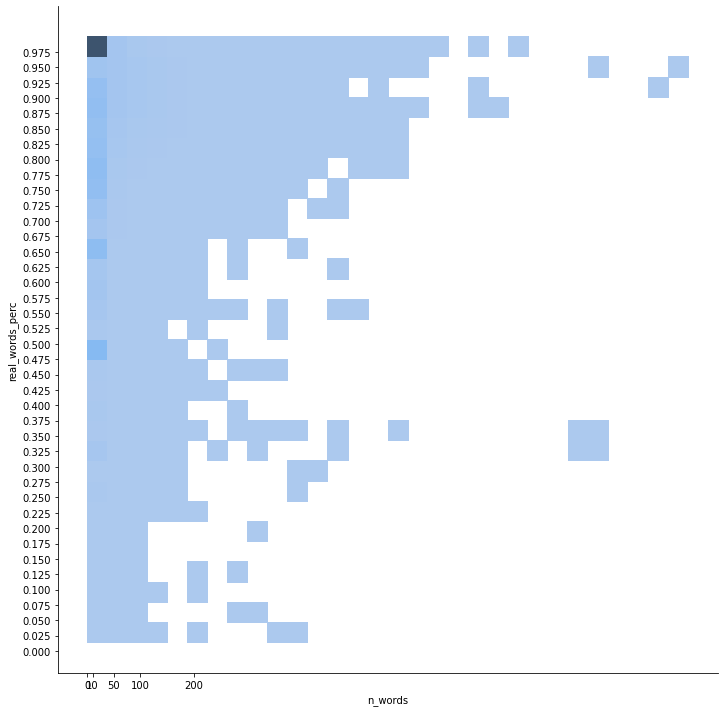

In [365]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
f = sns.displot(dfs, x='n_words', y='real_words_perc', bins=30, height=10)
a = [x/1000* 1.0 for x in range(0,1000,25)]
#print(plt.gca().get_ylim())
#print(a)
plt.gca().set_yticks(a)
plt.gca().set_xticks([0,10,50,100,200])
plt.show()

<Figure size 1440x1440 with 0 Axes>

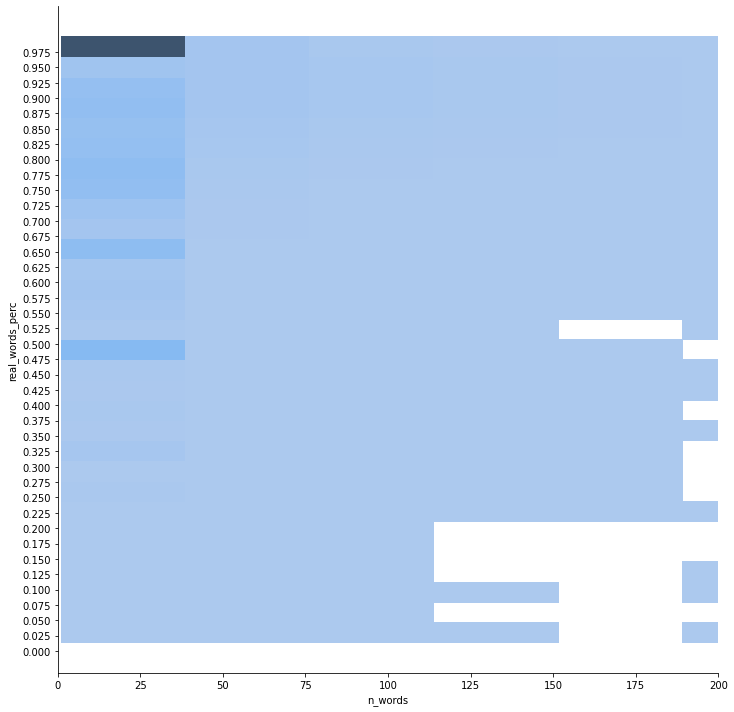

In [367]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
f = sns.displot(dfs, x='n_words', y='real_words_perc', bins=30, height=10)
a = [x/1000* 1.0 for x in range(0,1000,25)]
#print(plt.gca().get_ylim())
#print(a)
plt.gca().set_yticks(a)
#plt.gca().set_xticks([0,10,50,100,200])
plt.gca().set_xlim([0,200])
plt.show()

In [369]:
dfs_filtered = dfs[((dfs.real_words_perc >= 0.60) & (dfs.n_words > 50)) | ((dfs.real_words_perc >= 0.55) & (dfs.n_words > 25)) | ((dfs.real_words_perc >= 0.50) & (dfs.n_words > 10)) | ((dfs.real_words_perc >= 0.45) & (dfs.n_words > 0))]

In [370]:
print(dfs.shape)
print(dfs_filtered.shape)

(237462, 40)
(229538, 40)


In [ ]:
the above dropped 10% of the rows. We should run a final pass of "totally clean" rows

In [371]:
dfs.to_parquet('sample_a_100_dfs_19.parquet')

In [372]:
dfs = dfs_filtered

In [ ]:
## Merge


In [375]:
dfs.columns

Index(['Unnamed: 0', 'obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1', 'pos_y1',
       'text', 'file', 'text_-1', 'text_0', 'text_1', 'text_2', 'text_3',
       'nchars_3', 'letter_count', 'text_5', 'text_6', 'is_enchant_word',
       'word_char_num', 'is_enchant_word_and_g3l', 'any_enchant_word_and_g3l',
       'has_email', 'text_9', 'text_10', 'text_11', 'langs_1_prob', 'langs_1',
       'langs_1_up', 'langs_1_down', 'lang', 'text_13', 'text_14', 'text_15',
       'text_16', 'text_17', 'real_words', 'real_words_n', 'real_words_perc',
       'n_words'],
      dtype='object')

In [381]:
i = 20

In [377]:
from nrcan_p2.data_processing.preprocessing_dfcol import merge_words

In [379]:
dfs['text_20'] = merge_words(dfs.text_17)

In [380]:
dfs.to_parquet('sample_a_100_dfs_20.parquet')

In [385]:
with pd.option_context('display.max_colwidth', None):
    res = dfs[dfs[f'text_{i-3}'] != dfs[f'text_{i}']]
    print(i)
    print(res.shape)
    res = res.sample(20)    
    display(res[[f'text_{i-3}', f'text_{i}']])

20
(229537, 41)


text_17  \
749673.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               DEPOSITS OF THE LAST INTERGLACIAnON    
1770869.0  lower Paleozoic above a widespread detachment in unit ps5 ( seismic mid Cambrian ) throughout northeastern Prince Patrick Island. There are also lines of indirect evidence to indicate that at least three additional thrust faults must exist in this same part of Prince Patrick Island entirely beneath the ps5 detachment. First and most significantly, local and regional structural relief exists on the ps5 detachment. In other words, this surface has been folded and these longwavelength folds can be accounted for by slip on thrust ramps found deeper in the section. Second, faults and horizontal shortening located and measured above the ps5 detachment must be rooted and accounted for by shortening at depth. These faults might be situated either on the lines of section or off the sections to the northeast or southwest. Since the Arctic Platform and the craton of North America lie under the southern Arctic Islands, the fold thrust belt of northeastern Prince Patrick Island is more likely rooted under and northeast of this belt. Third, deep seated thrust faults have been imaged within an adjacent part of this belt under northeastern Eglinton Island. Fourth, evidence is provided for a potential northeasterly facing thrust plane reflection above unit ps2 on profiles PPB32 and PPB33 ( with cross section C ) , southeast of the Wilkie Point J 51 well.    
621472.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [386]:
dfs.columns

[autoreload of nrcan_p2.data_processing.pipelines failed: Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/conda/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/opt/conda/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/opt/conda/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/nrcan_p2/workspace/sraimondo/nrcan_p2/nrcan_p2/data_processing/pipelines.py", line 67, in <module>
    preprocessing_df_filter.merge_words,
AttributeError: module 'nrcan_p2.data_processing.prepro

Index(['Unnamed: 0', 'obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1', 'pos_y1',
       'text', 'file', 'text_-1', 'text_0', 'text_1', 'text_2', 'text_3',
       'nchars_3', 'letter_count', 'text_5', 'text_6', 'is_enchant_word',
       'word_char_num', 'is_enchant_word_and_g3l', 'any_enchant_word_and_g3l',
       'has_email', 'text_9', 'text_10', 'text_11', 'langs_1_prob', 'langs_1',
       'langs_1_up', 'langs_1_down', 'lang', 'text_13', 'text_14', 'text_15',
       'text_16', 'text_17', 'real_words', 'real_words_n', 'real_words_perc',
       'n_words', 'text_20'],
      dtype='object')

In [392]:
matches = []
def replacement_func(matchobj):
    global matches
    g0 = matchobj.group(0)
    g2 = matchobj.group(1)
    
    if not re.search('[a-zA-Z]', g0):
        return g0
    matches.append(g0)
    
    #if g2[0] in ["(", ")"]:
    #    return g2[0] #f"[REPLACE {g0} -> ?]"
    #else: 
    return g0
    #return g0
    #else:
    #return 

print(punct)
ms = f"\S+([{punct}])\S+"
print(ms)
m3 = dfs[f'text_20'].apply(lambda x: re.sub(ms, replacement_func, x))

!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~
\S+([!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~])\S+


In [393]:
print(len(matches))
print(len(set(matches)))
print(set(matches))

55181
20048
{'A.KD', '&1lOU.1.t', 'r,rey', "Stewart's", '<l>t', '15.16e', "fv'l.J.", '10:Kaolinite', 'vrC.tor', "62deg25.8'N,", 'characterization:Arthur', 'magnitu~e', 'r.1ay', 'P.s', 'ni"ki*teu"ituk,', 'Triad",', "Zinc's", 'J.P.,', '1v*comos', '4.6b.', "school's", 'P.P.Pv', 'C.vo', "L'or", 'A.V', 'el&ewherc,', 'S.L.', 'propo:tion', "Majesty's", '5.2x10', 'stock;another', "qi'xuaq", 'LE.,', 'Otdel.,', 'mentioned.2', 'A.G.', 'Comml!nts', 'A10c.4:', 'F.,1985a,', 'Moi,ture', 'D.M.Watson;', 'SID3D.USER', '1.l', 'Z>4', 'FA~AGNEISS', '5.4*c;', 'R_ese_arch.', 'pr~ncipal', 'l.E', 'pr.oiblems', 'e!ebr', "Douglas's", 'K.B.S.', 'p.47', "52deg25.0617'N", 'f.l.G', 'name=location"', 'grainc*d', '76deg18\'18"N,', 'r~ngb', 'recrystallized*art~', 'MA~WINNIFEG', "Martin's", 't:1:ie', 'ma.p', 'Temperoh"e', ';eadi$s', 'exist,s', 'm,b,', 'ot.l', 'Lock[s]', 'L,Ps', 'portio:ri~', 'K.W.', '1986,1988a,', 'j+l', "'Glauber's", 'ndrinko.blo', "Donaldson's", 'C29>C27>C28', 'tir.g', 'F.L.', '42.40m.', '.of*greensto

In [471]:
matches = []
def replacement_func(matchobj):
    global matches
    g0 = matchobj.group(0)
    
    matches.append(g0)
    
    #if g2[0] in ["(", ")"]:
    #    return g2[0] #f"[REPLACE {g0} -> ?]"
    #else: 
    return f" {g0} "
    #return g0
    #else:
    #return 

print(punct)
ms = r"[=+\[\]*:]"
print(ms)
m3 = dfs[f'text_20'].apply(lambda x: re.sub(ms, replacement_func, x))
dfs['text_21'] = m3
                        

!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~
[=+\[\]*:]


In [472]:
with pd.option_context('display.max_colwidth', None):
    res = dfs[m3 != dfs[f'text_20']]
    m4 = m3[m3 != dfs[f'text_20']]
    print(i)
    print(res.shape)
    res = pd.concat([m4.reset_index(), res[f'text_20'].reset_index()], axis=1)
    res = res.sample(20)    
    display(res)

20
(29412, 45)


index  \
1858     28934.0   
2243     34689.0   
22920  2556610.0   
29195  3965597.0   
9468    469110.0   
8326    366482.0   
10000   477344.0   
26139  2936981.0   
9312    467307.0   
863      10361.0   
27195  3180046.0   
6105    226905.0   
379       5748.0   
3869     68873.0   
9865    473289.0   
20338  1699713.0   
19943  1677064.0   
11418   536261.0   
25129  2767383.0   
3166     51558.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   text_20  \
1858                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           1962 :  The role of fungal spores in palynology. Journal of   
2243                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           The Meadowbank gold deposits are polydeformed, auriferous iron formations within the Woodburn Lake group of the western Churchill Province ( Fig. 1 ) . The deposits are located about 70 km north of Baker Lake and are 100% owned by Cumberland Resources Ltd. who are currently conducting a prefeasibility study. Cumberland has identified a classified resource of about 2 000 000 ounces ( Table 1 ) , of which 962 400 are considered to be a proven and probable open pit reserve ( Cumberland Resource Ltd., Press Releases :  March 29, 2000; April 27, 2000 ) .   
22920                                                                                                                                                                                                                                                                                                                                       

In [523]:
matches = []
def replacement_func(matchobj):
    global matches
    g0 = matchobj.group(0)

    matches.append(g0)

    #if g2[0] in ["(", ")"]:
    #    return g2[0] #f"[REPLACE {g0} -> ?]"
    #else: 
    return f" "
    #return g0
    #else:
    #return 

print(punct)
ms = r"\S*[0-9]deg[0-9NSEW]\S*"
print(ms)
m3 = dfs[f'text_21'].apply(lambda x: re.sub(ms, replacement_func, x))
dfs['text_22'] = m3

!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~
\S*[0-9]deg[0-9NSEW]\S*


In [524]:
print(len(matches))
print(len(set(matches)))
print(set(matches))

1026
875
{"80deg12'N,", "77deg58'", '75deg47\'30"N,', "129deg13.l'W;", '119deg54\'00"W;', '73deg54,', '54deg53,', "81deg29.13'N,", '20degE', 'l30degW,', "76deg57'3CY'N,", 'N08degW', '72deg13\'14"W', '69deg59,', "139deg23'", '52degN', '4degN.', '119deg31\'30"W;', '63.7degW', "81deg30'N,", 'N45degW', "065deg08.12'W.", 'N85degE,', 'N17degW,', "79deg76'", '50deg5\'45"N,', '75deg40\'30"N,', "7deg30'W", '119deg33\'30"W;', '77deg48\'52",', "62deg29'N,", 'N27degE.', 'N28degE.', '53deg31\'10",', '76deg22\'50"N,', '134deg50', '116deg20\'10"W;', '112degW', 'N59deg23,', '2deg7PbJ206pb', "62deg40'N", "139deg26'", '76deg50N.', '45deg56', '76deg17\'30"N,', "75deg40'", "139deg24'", "76deg45'", '119deg14\'00"W;', '140deg58\'35"', '140deg56\'20"', 'N35degW', "79deg51.5'", "148deg07'30'W", 'S61degE', "60deg55.08'N,", "62deg25.8'N,", "63deg17'N,", '67.5degN,', "67deg30'NN", "97deg56'", '40degW.', 'N85degW', '53deg29,', '5degSW.', '49deg21\'18"N,', '50deg30', '59degN.', "63deg13'N,", '53deg29\'55",', "54de

In [458]:
print(len(matches))
print(len(set(matches)))
print(set(matches))

87768
13747
{'1310A,', '86%', '2477.', '155;', '45;', '1.94%', '64607,', '11b,', '17835.', '371,', '64771.', '1846,', '599.', '4.59:1:0.85;', '59.9%', '0.1~', '17625.', '11offre,', '279,', '13.34.', '282.', '42321.', '23?', '23066.', '22270.', '42339,', '10.4.', '608000E,', '21.2,', '9lrveys,', '76SDS4258.', '425,', '885.', '1991c:', '10.6.', '1125.', '1882,', '39.9%', '2403S.', '565.', '721.', '291,', '75N,', '64,', '64745.', '27.32.', '30LJ.', '260.', '12m.', '10A.2.', "07'W.", '17822.', '1920s"', '0.04.', '72328,', '97.3h:', '299,', '1997a,', '1482.', '5445,', '17.23A;', '1012,', '61648.', '4.83%', '21828.', '02,', '32209,', "1'3.", '83834.', '32.1.', '9649.', '62.5%', '925,', '408,', '271,', '047,', '2183.', '3,500,', '60699,', '1972.', '17,19681,', '4584,', '584,', '1899,', '1931:', '1054,', '5,267,274;', '4.6b.', '304300E,', '26X,', '6%.', '379.', '98886;', '2146.', '1894:', '600degC;', '2808,', '586.', '63X.', '28985,', '7514450N.', '2E;', '2715m:', '444,', '287:', '17572.', '20

In [529]:
matches = []
def replacement_func(matchobj):
    global matches
    g0 = matchobj.group(0)
    g2 = matchobj.group(1)
    
    #matches.append(g0)
    if not re.search(r"[0-9]", g0):
        return g0
 
    m = re.match(r"^(['\"]?)[<>]?([0-9]+)%?[a-zA-Z]?([.,;'\"]?)$", g0)
    if m:
        #num = int(m.group(1))
        #if num > 2100:
        matches.append(m.group(1) + "[NUM]" + m.group(3))
        return m.group(1) + "[NUM]"+ m.group(3)


    
    m = re.match(r"(['\"]?)[<>]?([0-9]*\.[0-9]+)%?[a-zA-Z]?([.,;'\"]?)$", g0)
    if m:
        matches.append(m.group(1) + "[NUM]" + m.group(3) )
        return m.group(1) + "[NUM]" + m.group(3) 
    
    m = re.match(r"(['\"]?)([0-9]+[,.])+([0-9]+)%?[a-zA-Z]?([.,;'\"]?)$", g0)
    if m: 
        matches.append(m.group(1)+"[NUM]" + m.group(4) )
        return m.group(1) + "[NUM]" + m.group(4)    
    
#     m = re.search("(\S+)[0-9]{3,}(\S+)",g0)
#     if m:
#         matches.append(m.group(1)+"[NUM]" + m.group(2) )
#         return m.group(1) + "[NUM]" + m.group(2)     
    
    
#     if not re.match(f"[{punct}]", g0.strip()[-2]):
#         if g0.strip()[-1] in [",", ":",".", ";", "\"", "?", "'", "!"]:
            
#             return g0
#     else:
#         if g0.strip()[-2:] in [".,", ",.", "\",", ",\"", "\";", ";\"", "\".", ".\""]:
#             return g0
        
        
#     if not re.match(f"[{punct}]", g0.strip()[1]):
#         if g0.strip()[0] in ["'", "\""]:
#             return g0

    matches.append(g0)
            
    #if g0.strip()[-2:] in ["\"","
    #if g2[0] in ["(", ")"]:
    #    return g2[0] #f"[REPLACE {g0} -> ?]"
    #else: 
    return " "
    #return g0
    #else:
    #return 

print(punct)
ms = f"(((?<=\s)|^)\S+([{punct}]+)((?=\s)|$))|(((?<=\s)|^)([{punct}]+)\S+((?=\s)|$))|(((?<=\s)|^)\S+([0-9]+)\S+((?=\s)|$))"
print(ms)
m3 = dfs[f'text_22'].apply(lambda x: re.sub(ms, replacement_func, x))


!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~
(((?<=\s)|^)\S+([!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]+)((?=\s)|$))|(((?<=\s)|^)([!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]+)\S+((?=\s)|$))|(((?<=\s)|^)\S+([0-9]+)\S+((?=\s)|$))


In [530]:
print(len(matches))
print(len(set(matches)))
print(set(matches))

199414
11467
{'gmfm2jy', '40Jo', '21m2', 'As34', '&1lOU.1.t', 'D2435.', '0.1~', '"buf3clgbr200i"', '925degC', '043AA', '2brc1s1.1m', '11offre,', '#11', '901.00FT', '<90deg.', 'US$109.', '23?', 'La5alle,', 'E.3.6', 'conforn1ably', '9lrveys,', '4L14', 'm.1iy', '62OW', '76SDS4258.', '$1.40', '31961to1963', 'SiO2,', 'copp0r', 'Villemonte1,', 'B293', '14th', '30LJ.', '2013.Casino', '10A.2.', "07'W.", 'Petrus1,', 'rc1idu&l', 'f1exuosa', '124O41', '2C03', 'A8b.', 'z6409', 'V56,', 'ea2rdomain200', 'of2708', '@303deg.', 'bra1111ia1111s', "1'3.", 'region.12', 'polariz8tion', 'r.1ay', 'th8GO', 'MWR206,', 'i11di', 't!1esc', 'F3,', 'moliv10', 'l67', '60NE', '<1Vailable', 'soL1rco', 'prese1Ted', '53L14', '600degC;', 'no.4,', 'Fig.5c', '35ON', 'Or25', '63L,K', 'l1ine', 'p.1271', '5.2x10', 'N17', '11BSC', 'di~rep~n2y', '270deg', 'vmt0r', '"abmproxv2n"', '.Q8E', 'sup"911', '21deg', '28deg', "deg57'W", '99,100th', 'tl1N10', 'P765A', 'attheBrunswickNo.12deposit,Bathurstminingcamp,NewBrunswick;', 'IJ50.',

In [531]:
punct

'!"\\#\\$%\\&\'\\(\\)\\*\\+,\\-\\./:;<=>\\?@\\[\\\\\\]\\^_`\\{\\|\\}\\~'

In [ ]:
Figure out which words are left that 
* contain numbers
* contain punct - are they mostly garbage or real words

In [541]:
matches = []
def replacement_func(matchobj):
    global matches
    g0 = matchobj.group(0)
    g2 = matchobj.group(1)
    
    m = re.match(r"(\S+)([,.;]\")|(\"[,.;])", g0)
    if m:
        matches.append(m.group(1))
        return g0
    
    m = re.match(f"(\S*[^{punct}])([.,;'\"!?])", g0)
    if m:
        matches.append(m.group(1))
        return g0    


    matches.append(g0)
            
    #if g0.strip()[-2:] in ["\"","
    #if g2[0] in ["(", ")"]:
    #    return g2[0] #f"[REPLACE {g0} -> ?]"
    #else: 
    return g0
    #return g0
    #else:
    #return 

print(punct)
ms = f"((?<=\s)|^)\S*[0-9]\S*((?=\s)|$)"
print(ms)
m3 = dfs[f'text_22'].apply(lambda x: re.sub(ms, replacement_func, x))


!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~
((?<=\s)|^)\S*[0-9]\S*((?=\s)|$)


In [542]:
print(len(matches))
print(len(set(matches)))
print(set(matches))

321915
25411
{'23474', '86%', '97531', 'gmfm2jy', '1vill', '17799', '1885', '425', '1849', '925degC', '31961to1963', '0.27', 'B293', '17614', '31001007', '1%1', '28535', '27999', '2km', 'th8GO', '21.1', '75273', 'diameter', 'Eurypterida"4', 'no.11', 'Lk1', 'prese1Ted', '7.5', '085E', '19861', 'solutions1', '168550', 'vmt0r', '17.34', 'FG5', 'are.1', 'Gls', '7405', '77', '2233', 'nr0', 'Sr8G', 'use', '1nid', 'SID3D.USER', '1253', 'th0s0', 'Z>4', '2.01.01', 'output2', '28342', '90808', '45deg', 'I1mlls', '19R2', '#9', '24421', '5121', 'N55W', '1565A', '.1052', '58%', '13;586', '50Jo', '197U', '22', '1911', '256', 'Se2', '28679', '4255', '26,4', '4917', 'High120', '5091091', '11x105', 'deg30', '8080', '1997.03', '94F', 'access1on~Qr', '606', '72169', 'l3ear', '1n9s', '40%0', '13.2', '1035a', 'pebble5', 'Choc6', 'Q2', 'T9E', '3.Wm', '.388', 'U1N', '14EAN', '254p', '202673', 'SB21', '1I', '220PC', '1361', 'C29>C27>C28', '17644', '.69', '33%,', '1444', '9004', '16al', '220', 'C15L6', '8.20',

In [543]:
matches_df = pd.DataFrame({'matches':matches})
with pd.option_context('display.max_rows', 100):
    display(matches_df.value_counts().to_frame()[0:100])

0
matches       
1        20910
2        14617
3        10939
4         9566
5         7438
0         6801
6         5321
10        5317
7         4220
8         3840
9         2925
20        2778
12        2576
15        2546
11        2487
30        2158
50        1933
100       1909
13        1818
14        1742
25        1649
40        1460
17        1402
16        1392
000       1342
1987      1301
18        1284
1991      1205
1990      1194
19        1183
1975      1180
1979      1128
23        1118
1977      1109
60        1106
1986      1089
24        1084
1976      1065
1989      1054
35        1051
1973      1044
1982      1040
200       1033
2000      1026
22        1007
1978      1006
21        1001
1981       990
1988       988
2001       963
1984       950
1996       948
1974       921
1967       907
1983       903
1994       901
1980       894
1963       894
2007       891
27         885
80         838
1969       832
1985       809
1972       792
28         776
31         775
1971       768
1970       767
1992       765
45         757
70         753
300        750
500        748
26         706
1968       706
1995       673
1998       671
90         669
1965       665
1960       647
1964       641
2013       636
1993       636
2005       633
2002       623
75         620
32         618
95         600
2006       591
2008       589
1966       572
2003       564
33         561
1962       561
34         560
150        557
2004       556
37         555
1961       547
1997       546

In [ ]:
How many of the mathces are straight up nimbers

In [548]:
vc = matches_df.value_counts()
display(vc.shape)
display(vc.index.get_level_values('matches'))
vc[vc.index.get_level_values('matches').str.contains('^[0-9]+$')]

(25410,)

Index(['1', '2', '3', '4', '5', '0', '6', '10', '7', '8',
       ...
       '36.7', '36.71', '36.8', '3605', '360A', '360K', '360degC', '360ft',
       '36141', '~rp0r'],
      dtype='object', name='matches', length=25410)

matches
1          20910
2          14617
3          10939
4           9566
5           7438
           ...  
3590           1
36146          1
3598           1
3605           1
36141          1
Length: 8742, dtype: int64

In [ ]:
8.7k/25.4k are numbers

In [553]:
with pd.option_context('display.max_rows', 100):
    m = vc[~vc.index.get_level_values('matches').str.contains('^[0-9]+$')].to_frame()
    display(m.shape)
    display(m[0:100])

(16668, 1)

0
matches                
95%                 356
P1                  242
D2                  240
S2                  239
km2                 239
m3                  222
200im               221
10%                 221
p                   213
S1                  205
.25                 199
2a                  196
3a                  188
5%                  173
5a                  166
F2                  165
20%                 160
4a                  157
K1A                 152
P2                  151
<0                  150
206Pb               147
CO2                 145
50%                 142
C1                  134
75O                 128
14C                 124
13K                 124
2%                  124
Fig                 123
2.0                 120
1A                  117
15%                 116
207Pb               116
23A                 115
<2                  114
6a                  109
#5                  109
HCO3                107
0E8                 103
30%                 100
1%                   97
7a                   95
7A                   93
C2                   93
13N                  93
D1                   92
SiO2                 91
1960a                91
3b                   90
<1                   88
80%                  88
1B                   87
m2                   87
2b                   87
8a                   86
.1                   86
v2                   85
cm3                  85
5degC                84
A1                   84
F3                   83
LOG10                81
25%                  81
d13C                 80
204Pb                80
F1                   79
C02                  78
9a                   78
#1                   78
50deg                78
OE8                  78
2013a                77
3A                   74
3.08.01              74
1970s                73
1a                   72
92H                  71
13J                  70
2A                   70
40%                  69
100%                 68
40Ar                 66
96deg                66
90%                  65
D3                   65
5b                   65
d2H                  64
2013b                63
I1                   62
2013c                62
60%                  62
8B                   62
$1                   60
4.2                  60
Si02                 59
1.1                  59
10,9,8,7,6,5,4,3,2   58
3rd                  58
3%                   57

In [ ]:
bthe top 100 seem mostly reaonsable, except for a few... 

In [554]:
with pd.option_context('display.max_rows', 100):
    m = vc[~vc.index.get_level_values('matches').str.contains('^[0-9]+$')].to_frame()
    display(m.shape)
    display(m[-100:])

(16668, 1)

0
matches     
38.2       1
38.13      1
38.12      1
38.10b     1
38,300     1
38&30O0C   1
37%.       1
370deg     1
37%,       1
36p        1
36deg      1
36b        1
36L        1
36J        1
36@C       1
375000E9   1
375W       1
3766FT     1
382630E    1
382A       1
39.3       1
390o       1
390200E    1
39.86      1
396degC    1
39A        1
39B        1
39.5       1
39.1       1
387800E    1
39'N       1
3885m      1
3885rn     1
388p       1
38Ar       1
38B        1
38D        1
38FT       1
38HERROR   1
38N        1
38_        1
38a        1
38b        1
39%,       1
39%.       1
36;066.3   1
36;066     1
369A       1
35431G     1
3535m      1
354A       1
355000E    1
355025E    1
357deg     1
358257E    1
35.81      1
35.l       1
35.6       1
35.5       1
35.05      1
35.0%0     1
35,1       1
34s        1
34rgensen  1
350UO      1
365degC    1
363111E    1
36665G     1
369111E    1
3693.1     1
3615.15    1
35QQ       1
35o        1
35mm       1
35e        1
35degC     1
35cm       1
35S        1
35ON       1
35MPa      1
35JOFTH    1
35C        1
35@        1
35941G     1
35oC       1
35th       1
36%;       1
36.21      1
36.3       1
36.30m     1
36.4       1
36.6       1
36.7       1
36.71      1
36.8       1
360A       1
360K       1
360degC    1
360ft      1
~rp0r      1

In [ ]:
this is the bottom 100. Let's look at the one's that are at the bottom,but show up at least 5 times

In [555]:
with pd.option_context('display.max_rows', 100):
    m = vc[~vc.index.get_level_values('matches').str.contains('^[0-9]+$') & (vc>=5)].to_frame()
    display(m.shape)
    display(m[-100:])

(1732, 1)

0
matches           
114P             5
PPA4             5
24.5             5
82deg            5
G3               5
130deg           5
1H1              5
36H              5
$12              5
223PC            5
F2P              5
aupg2kt          5
G9               5
;1               5
#11              5
12B              5
3%,              5
RP94             5
#44              5
aupg2ke          5
61a              5
71deg            5
21degI>b         5
$298             5
22.5             5
18O              5
C17              5
25%0             5
22nd             5
HG30             5
J980             5
>40degC          5
Al203            5
U4               5
D                5
41%              5
220PC            5
"I2              5
1200degC         5
17.19            5
>25              5
SEI4             5
3.6              5
1968a,b          5
Ta20             5
1V               5
.05              5
<500             5
5J3              5
16b              5
L5               5
Z2               5
21.5             5
SB4              5
16deg            5
36.1             5
nC18             5
SE85             5
13b              5
ar0              5
70E              5
US$5             5
36.2             5
11.2             5
SE27             5
1890s            5
.71              5
11.4             5
LDG10            5
70m              5
.77              5
SE20             5
1nm              5
.104             5
.79              5
1100degC         5
1W               5
PGC2010005       5
d2HH2O           5
SB14             5
ThE1             5
40%.             5
10FNA192A02      5
V90              5
600oC            5
@1500            5
>5%              5
23A.3            5
0.7              5
JP019            5
dissen1inations  5
TX08             5
K1S              5
10b              5
e1               5
G1K              5
14.3             5
x900             5
40%,             5
An3              5

In [556]:
with pd.option_context('display.max_rows', 100):
    m = vc[~vc.index.get_level_values('matches').str.contains('^[0-9]+$') & (vc>=5)].to_frame()
    display(m.shape)
    display(m.sample(100))

(1732, 1)

0
matches         
V89           54
1963b         12
1967b         20
F4            23
026A          21
1940s         22
1055A         11
5Y5           10
1976a         32
1990a         17
~8             5
a_h1          15
2Department    5
1980a         26
g3             8
9C            16
V6B           34
34a           17
T2N            5
1998b         15
10FNA138B01    6
TW3           15
1B            87
100s           6
10m           20
1969a         12
1s            41
G2            11
5,000          5
Z2             5
4degC         19
HP9825         9
NAD83         52
HN0            8
W3            15
36.2           5
15x            5
500,000        8
I1e           10
1985a         17
24th          45
0r             6
L4             8
C29>C27>C28    8
11m           14
252Cf          7
Cr2O3         25
9~             6
35%           31
50th          42
2002a         29
32.1           7
15A           15
14C          124
2o            20
SO42          10
II1            8
W03            9
4D            27
H2S04          5
R2            33
AK1            5
29th           6
7deg           7
~3            47
8b            15
1Department    7
a1            26
1890s          5
207PC          6
PPA7          10
TCA8010        5
3.08.01       74
1584A         25
>5            48
2deg          15
NB18           8
22.5           5
C4            16
1997.03        7
ps1           12
26b            5
1623A         11
9.12           5
10a           47
5Y            19
>55degC        7
Q2            29
13J           70
75N           30
15.1          11
1632A          6
3.1           39
2%           124
V1A           19
2H1            8
16b            5
6.6           10
OF2           10
87Sr          31

In [ ]:
ok so a bit of garbage is maintained, but not that much

In [451]:
matches = []
def replacement_func(matchobj):
    global matches
    g0 = matchobj.group(0)
    g2 = matchobj.group(1)
    
    #matches.append(g0)
    
    if not re.match(f"[{punct}]", g0.strip()[-2]):
        if g0.strip()[-1] in [",", ":",".", ";", "\"", "?", "'", "!"]:
            
            return g0
    else:
        if g0.strip()[-2:] in [".,", ",.", "\",", ",\"", "\";", ";\"", "\".", ".\""]:
            return g0
        
        
    if not re.match(f"[{punct}]", g0.strip()[1]):
        if g0.strip()[0] in ["'", "\""]:
            return g0

    matches.append(g0)
            
    #if g0.strip()[-2:] in ["\"","
    #if g2[0] in ["(", ")"]:
    #    return g2[0] #f"[REPLACE {g0} -> ?]"
    #else: 
    return " "
    #return g0
    #else:
    #return 

print(punct)
ms = f"(((?<=\s)|^)\S+([{punct}]+)((?=\s)|$))|(((?<=\s)|^)([{punct}]+)\S+((?=\s)|$))"
print(ms)
m3 = dfs[f'text_22'].apply(lambda x: re.sub(ms, replacement_func, x))
#dfs['text_23'] = m3

!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~
(((?<=\s)|^)\S+([!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]+)((?=\s)|$))|(((?<=\s)|^)([!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]+)\S+((?=\s)|$))


In [449]:
print(len(matches))
print(len(set(matches)))
print(set(matches))

15762
6569
{'mad~', '86%', '>18', '1.94%', '<1000', '.r', ':1005799629588', 'CA~', '.published', '.Where', '&1lOU.1.t', '59.9%', '0.1~', ':ategories', 'Ro~', '!mown', '~icolet', '.ffect', '#11', 'D<', '.earGh', '~tat', '!rozen', '$1.40', '!Observatoire', ':froJ;1', '?Abies', '39.9%', '>1', '~h', ':rp~', '!Iri', '<l>t', '~anadian', 'LAI<', '<ind', '<I>', '?Welleri', ':ict', '!ON', '?Daonella', '>43', '4.83%', '.more', '62.5%', '!chen', 'perviou&', '{rozen', 'pegmatite~', '6%.', '.C.ge', '<1Vailable', '>vith', ',aters', ':is', '{Sandstone', 'differences<', '.Q8E', 'Cop}', '.188', '.chi', '3.21%,', 'epidote~', 'MATACHEW~I\\', 'U~', '.58', '%,', '.defined', ':many', '.Pale', '~ALY', '~eilogical', '.oxidized', '#800', '\\iliddle', '.l.o', 'A>', 'CFE~', '.FOR', '#9', 'followi>', 'Columbia~', '.very', '~ackenzie', ':ovr', '.1052', '~ABIGCCN', '58%', 'FRCVIhC~', 'tons~', '.ortheast', 'Island~', '.4.5.6', 'pp~', '.Ye', ',ind', '2<', ';ccome', ';eadi$s', '1.37%', 'surmner~', ';va', 'brown>', '.J

In [450]:
with pd.option_context('display.max_colwidth', None):
    res = dfs[m3 != dfs[f'text_22']]
    m4 = m3[m3 != dfs[f'text_22']]
    print(i)
    print(res.shape)
    res = pd.concat([m4.reset_index(), res[f'text_22'].reset_index()], axis=1)
    res = res.sample(20)    
    display(res)

20
(9922, 43)


index  \
9658  3734010.0   
7765  2604259.0   
4536   643201.0   
730     67966.0   
2245   466904.0   
9262  3263243.0   
1946   339135.0   
9918  4058922.0   
322     26533.0   
4178   613299.0   
5069   686165.0   
7915  2668903.0   
3462   545131.0   
8069  2676202.0   
5006   681886.0   
8566  2869740.0   
6891  1926483.0   
1622   256327.0   
7088  1953942.0   
3467   545211.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 text_22  \
9658                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             but relatively low Fe2O3 ( total iron ) content ( Fig. 15.16d ) more typical of felsic volcanic rocks. Some samples have anomalously high (   ) Al2O3 content ( samples KZ 09 CV 2 3 and KZ 09 CV 4 4, Appendix 15A.1 ) . As suggested by the AFM diagram ( Fig. 15.16g ) , samples from the Cavalier area appear to be   
77

In [455]:
matches = []
def replacement_func(matchobj):
    global matches
    g0 = matchobj.group(0)
    g2 = matchobj.group(1)
    
    #matches.append(g0)
    
#     if not re.match(f"[{punct}]", g0.strip()[-2]):
#         if g0.strip()[-1] in [",", ":",".", ";", "\"", "?", "'", "!"]:
            
#             return g0
#     else:
#         if g0.strip()[-2:] in [".,", ",.", "\",", ",\"", "\";", ";\"", "\".", ".\""]:
#             return g0
        
        
#     if not re.match(f"[{punct}]", g0.strip()[1]):
#         if g0.strip()[0] in ["'", "\""]:
#             return g0
        
    matches.append(g0)
            
    #if g0.strip()[-2:] in ["\"","
    #if g2[0] in ["(", ")"]:
    #    return g2[0] #f"[REPLACE {g0} -> ?]"
    #else: 
    return " "
    #return g0
    #else:
    #return 

print(punct)
ms = f"((?<=\s)|^)([{punct}0-9]+)((?=\s)|$)"
print(ms)
m3 = dfs[f'text_23'].apply(lambda x: re.sub(ms, replacement_func, x))
dfs['text_24'] = m3

!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~
((?<=\s)|^)([!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~0-9]+)((?=\s)|$)


In [454]:
print(len(matches))
print(len(set(matches)))
print(set(matches))

556559
21443
{'97531', '2477.', '155;', '1885', '425', '599.', '4.59:1:0.85;', '17625.', '1849', '42321.', '12.3.1', '565.', '0.27', '17822.', '31001007', '1%1', '28535', '299,', '1.027', '5445,', '27999', '32.1.', '1909,80', '271,', '21.1', '3,500,', '4584,', '1657.8', '5696.64', '68217:1', '7.5', '5.2.6', '110.5', '56166.', '83818.', '7405', '77', '2233', '7.54', '32097,', '1253', '616;', '554.', '17.21.', '28342', '90808', "7418'", '2178.', '>1952.', '2011;', "5'", '7.61', '2479.', '24421', '2672.00', '6475,', '3372.3', '22', '1911', '256', '1912;', '4917', '5091091', '28647,', '8080', '25.1,', '787;', '17883.', '606', '13.2', '1807.', '1:20,000', '202673', '50.', '3.01.02.011', '1361', '28284.', '88;', '329;', '1444', '9004', '19557.', '348,', '220', '2301.32', '8.20', "11718'", '2.891.', '90', '2405.05', '618,', '47610', '2431,', '1468,', '090351.', '2.01.01.009', '4281056', '133984,', '6.1.', '17148.', '1890,', '42342.', '8.49', '19447', '9841', '1807,', '717.3', '4991024', '6566

In [ ]:
## Final cleaning steps


In [ ]:
### Rm ords without letters

In [394]:
matches = []
def replacement_func(matchobj):
    global matches
    g0 = matchobj.group(0)
    g2 = matchobj.group(1)
    
    matches.append(g0)
    
    #if g2[0] in ["(", ")"]:
    #    return g2[0] #f"[REPLACE {g0} -> ?]"
    #else: 
    return g0
    #return g0
    #else:
    #return 

print(punct)
ms = f"(\s|^)([{punct}]+)(\s|$)"
print(ms)
m3 = dfs[f'text_20'].apply(lambda x: re.sub(ms, replacement_func, x))

[autoreload of nrcan_p2.data_processing.preprocessing_dfcol failed: Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/conda/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/opt/conda/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/opt/conda/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/nrcan_p2/workspace/sraimondo/nrcan_p2/nrcan_p2/data_processing/preprocessing_dfcol.py", line 195, in <module>
    def merge_words_2(dfcol, en_dict=EN_DICT, special_cases=SPECIAL_CASES_2

!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~
(\s|^)([!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]+)(\s|$)


In [395]:
print(len(matches))
print(len(set(matches)))
print(set(matches))

230966
96
{' | ', ' +', ' , ', '< ', '( ', '& ', '\\ ', ' ; ', '^ ', '? ', '" ', '~ ', ' ~', '., ', ' ,', ' _', ' $', ' = ', ' \\', ' ",', ' ^ ', ' . ', '> ', ' %, ', '@ ', ' @ ', ' ? ', ' (', ' %.', ' [ ', '! ', ' =', '% ', '} ', ') ', '_ ', ' ] ', ' < ', ' &', '+ ', ' { ', '[ ', ', ', ': ', ' } ', ' .', ' % ', ' [', ' ;', ' }', ' > ', '. ', ' ?', ' .,', ' _ ', ' ]', ' ., ', " ' ", '; ', ' ," ', ' @', ' ~ ', ' ) ', ' # ', '", ', ' !', ' *', '$ ', ' ( ', ' + ', '# ', ' :', ' )', ' ", ', " '", ' ! ', ' \\ ', ' : ', ' $ ', '* ', "' ", ' * ', ' & ', ' >', ' #', ' %', ' " ', ' <', '{ ', '] ', ' {', '= ', ' "', ' %. ', ' %; ', ' %: '}


In [396]:
matches = []
def replacement_func(matchobj):
    global matches
    g0 = matchobj.group(0)
    g2 = matchobj.group(1)
    
    matches.append(g0)
    
    #if g2[0] in ["(", ")"]:
    #    return g2[0] #f"[REPLACE {g0} -> ?]"
    #else: 
    return g0
    #return g0
    #else:
    #return 

print(punct)
ms = f"(\s|^)([{punct}0-9]+)(\s|$)"
print(ms)
m3 = dfs[f'text_20'].apply(lambda x: re.sub(ms, replacement_func, x))

!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~
(\s|^)([!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~0-9]+)(\s|$)


In [397]:
print(len(matches))
print(len(set(matches)))
print(set(matches))

431887
24572
{' 094; ', ' 205141 ', ' 10 ', ' 705 ', ' 2669.2 ', ' 2,500.', ' 7001, ', ' 1003, ', ' +17 ', ' 1,580 ', ' 12568. ', ' 6913. ', '1.12.1 ', ' 4917 ', ' 40500 ', ' 45" ', ' 55.8 ', ' 61.3 ', ' 6447 ', ' 109,493 ', ' 161, ', ' 130. ', ' 38.9. ', '3502 ', " 4.1' ", ' 1162.', ' 6.9.2 ', ' 7.11 ', '17252. ', ' .107 ', ' 20.19 ', ' 64775 ', ' $434,528, ', ' 150+ ', ' 2013 ', ' 1154 ', '108263 ', ' 061654, ', ' 428, ', ' 2} ', ' 6.2 ', ' 300, ', ' 190.', ' 7077.', ' $5,000 ', ' 2,342 ', ' 39.5. ', ' 3.29% ', ' ,1969; ', ' 68274. ', '1947 ', ' 49:1. ', ' 11.10.1 ', ' $31.2 ', ' 46% ', ' 336.', ' 1705. ', ' 32337 ', ' 1862 ', ' 680 ', ' 74.9 ', ' .1. ', ' 78', '1937 ', ' 15.20 ', ' 342,296 ', ' 7.65 ', ' ~3. ', ' 126, ', ' 53.1 ', ' 1035. ', '18. ', '68, ', ' 80334, ', ' 1:253,440.', ' 80,81, ', ' 32.5. ', ' 1675 ', ' 10417 ', ' #100111: ', ' 0.5* ', ' 2007', ' 0.42, ', ' 1279 ', ' 1987.', ' 114; ', ' 89 ', ' 2.58% ', ' 28790 ', ' 157373. ', ' 37; ', ' 24,1994 ', ' 91 ', ' 28578 ', 

In [71]:
with pd.option_context('display.max_colwidth', None):
    res = dfs[dfs[f'text_{i}'].str.contains('doi')]
    print(i)
    print(res.shape)
    res = res.sample(20)    
    display(res[[f'text_{i}']])

8
(759, 23)


text_8
273529                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       PSede rale-provinciale sur !'exploitation minerale, les gouvernements federal et du Manitoba ant entrepris des etudes afin de mieux evaluer la rentabilite de la valorisation des gisements de chromite de Bird River. D1autres etudes effectuees gouvernement federal et visant a determiner les possibilites de production de ferrochrome au Quebec et en Colombie-Britannique ont ete accelerees non seulement en raison de l'accroissement contin u de chrome, mais aussi parce q ue l'on sou haite profiter la valorisation sur le plan de la valeur ajoutee au pays puisque tout le ferrochrome utilise actuellement au Canada doit etre importe. 
473353                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Hryciuk, M., Macdonald, W., Hayes, B., Steigerwaldt, K., Hadlari, T., Rainbird, R., Dewing, K., and Girard, E., 2012. Fault-mediated melt ascent in a Neoproterozoic continental flood basalt province, the Franklin sills, Victoria Island, Canada; GSA Bullentin, v. 124, no. 5-6, p. 723-736. doi:10.1130/B30450.1 
51423                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [140]:
i=5
dfs_filtered = filter_no_real_words_g3letter(dfs, f'text_{i-2}')

/nrcan_p2/workspace/sraimondo/nrcan_p2/nrcan_p2/data_processing/preprocessing_df_filter.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_enchant_word'] = df[col].str.split().apply(lambda x: [en_dict.check(word) for word in x])
/nrcan_p2/workspace/sraimondo/nrcan_p2/nrcan_p2/data_processing/preprocessing_df_filter.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_char_num'] = df[col].str.split().apply(lambda x: [len(word) for word in x])
/nrcan_p2/workspace/sraimondo/nrcan_p2/nrcan_p2/

In [161]:
with pd.option_context('display.max_colwidth', None):
    res = dfs[~dfs.index.isin(dfs_filtered.index)].sample(20)
    display(res[[f'text_{i-2}']])

text_3
268513                                                                        the \n
667887                                                                     l, 715 \n
1706179                                                                        Mn \n
2912257                                                               S177 \nSi7J \n
21146                                                                     t112 WI \n
2438413                                                          Dpar \n(microns) \n
339937                                            0:::: \nLL \nCJ) \nCJ) \n<( \n~ \n
666241                                                          u \n- - - - - - --\n
698857                                                           ,[::yy / \n:-,') \n
219622                                                                    I \n8 E \n
706744                                       <Det \n8 \n95 \n<Del \n<Det \n46 \n5 \n
229418                                                            fit s the data. \n
2869727                                                  Occurrence: \nLithology: \n
3999145                                                              skcor cissien\n
2854977                                                                14-PTA-R011\n
644741                                                                      Elev. \n
1677888                                                n.a. \n- \n35 \n100 \n1000 \n
4058383  -./(#.0(9(.;( 61$%>!*.!%>1*\n $%>+* .B$4!".B$\n!".!"5688?3.B!";:%9*.9:5 (\n
208850                                                Red sondstone and siltstone \n
565388                                                                        sea \n

In [155]:
import enchant
en_dict = enchant.Dict("en")
en_dict.check('mudstone')

False

In [165]:
print(dfs[f'text_{i-2}'].str.len().sum())
print(dfs_filtered[f'text_{i-2}'].str.len().sum())
print(dfs[f'text_{i-2}'].str.split().str.len().sum())
print(dfs_filtered[f'text_{i-2}'].str.split().str.len().sum())

49547103
44584401
8003441
7056139


In [166]:
print(44584401/49547103)
print(7056139/8003441)

0.8998387049995638
0.8816381603862639


**analysis** so doing the above removed a lot of garbage!

In [167]:
dfs = dfs_filtered

In [169]:
dfs = dfs.drop(columns='text_5')

[None]

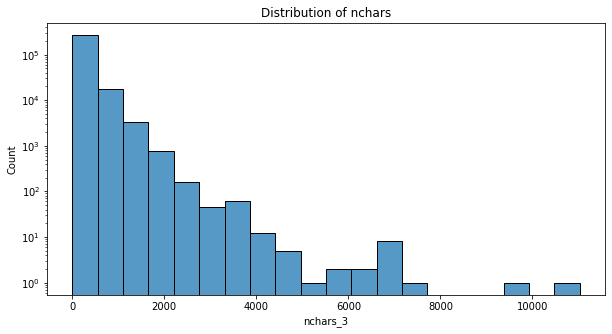

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
i = 3
plt.figure(figsize=(10,5))
sns.histplot(data=dfs, x=f'nchars_{i}', bins=20)
#sns.lineplot(data=dim_dist, x='perc', y='height', label='height', marker='o', markersize=4)
plt.title('Distribution of nchars')
#plt.legend()
#plt.ylabel('pixels')
plt.gca().set(yscale='log')

In [ ]:
**analysis** the above plot is basically unchanged

In [175]:
with pd.option_context('display.max_colwidth', None):
    display(dfs[['text_3']].sample(20))

text_3
216003                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   In all, 587 k m of survey lines w e r e c o m p l e t e d . Of t h i s \nt o t a l d i s t a n c e , 106 k m w e r e c o l l e c t e d in Shepody Bay, 125 k m \nw e r e c o l l e c t e d \nt h e remaining \n256 k m w e r e f r o m C h i g n e c t o Bay (Fig. 27.4). \n
664828                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             ESRI White Paper\n
352076                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [177]:
with pd.option_context('display.max_colwidth', None):
    display(dfs[['text_3']].sample(20))

text_3
2305729                                                                                                                                                                     SELECTED BIBLIOGRAPHY \n
324284                                                                                                                                                                                North Basin \n
53049                                                                                                                                                                    continuing /inde- \nfini \n
3208410                                                                                                                                                                     Feature-type grouping \n
229133                                                                                                                two measured numbers are required to compute a datum change; in the case of \n
172779   Les activites d'exploitation ont \nate interrompues pour des \nraisons economiques. La \nsociete veut continuer a \nanalyser les stocks de reserve \nen vue d'une exploitation \nfuture. \n
448224                                                                                                                                                                                     Median \n
3250263                                                    WHICH \n\'.'1'7 HO UT T H E. \n? R ! V ~ WI' I T T EM P ~ R '--t I S SI 0 ~l 0 P. \nI3J1R l-~!NG ER Rt:.:z::: : .. r.:c:: LIMJT t:: O. \n
32789                                                                                                                                                                                G.R. Douglas \n
3203093                                                                                                                                                      Feature-type notes on symbol \nusage \n
2444787                                                                                                                                                               Angle to c-axis \n(degrees) \n
3586208                                                                                                                                                   23\n23\nNiobium\nNiobium\n92.906\n92.906\n
2650461                                                                                                                           To the south and east, the limited Nahanni/Lower, Keg thickness \n
179968                                                                                Barres, tiges, profiles et fils, en \netain \nBarres et tiges, non allie ou en \nallia9es d'etain-antimoine \n
310970                                                                                                                                                                               Pearson Reef \n
469294                                                              results of vacuum drying, saturating, and oven-d~ying for \nsample number 5 measured under EP-1991(3) is listed in \nTable 4. \n
536743                                                                                                                                    thc..t occur in u..nconsolido..tGd dcposi ts or as bods \n
499393                                                                                                                                                                       NI PISSING DISTRIC T \n
225134    up to 1929, since when there has been little change. It includes \ninformation on m .inerals, uses, character and origin of \ndeposits, and descriptions of many mines and occurrences. \n
644761                                                                                                                                                                                       WELL \n

### Languages...

In [348]:
import langdetect
import tqdm
tqdm.tqdm.pandas()
#dfs['lang'] = dfs['text_3'].progress_apply(lambda x: langdetect.detect(x))
dfs['langs'] = dfs['text_3'].progress_apply(lambda x: langdetect.detect_langs(x))

100%|██████████| 284768/284768 [45:40<00:00, 103.90it/s] 


In [405]:
#dfs['langs_list'] = dfs.langs.progress_apply(lambda x: [[lang.lang, lang.prob] for lang in x])
#dfs['langs_list_str'] = dfs.langs.progress_apply(lambda x: ';'.join([f"{lang.lang}:{lang.prob}" for lang in x]))
#dfs['langs_2'] = dfs.langs.progress_apply(lambda x: None if len(x) <2 else x[1].lang)
#dfs['langs_1'] = dfs.langs.progress_apply(lambda x: None if len(x) <1 else x[0].lang)
dfs['langs_2_prob'] = dfs.langs.progress_apply(lambda x: None if len(x) <2 else x[1].prob)
dfs['langs_1_prob'] = dfs.langs.progress_apply(lambda x: None if len(x) <1 else x[0].prob)
# for lang in dfs['langs'].iloc[0]:
#     print(lang.lang)
#     print(lang.prob)

100%|██████████| 284768/284768 [00:00<00:00, 543505.11it/s]


In [359]:
dfs.drop(columns=['langs', 'langs_list']).to_parquet('sample_a_100_dfs_2.parquet')

In [429]:
eng = dfs[dfs['lang'] == 'en']
not_eng = dfs[dfs['lang'] != 'en']
fr = dfs[dfs['lang'] == 'fr']
print(eng.shape)
print(not_eng.shape)
print(fr.shape)


(187954, 31)
(96814, 31)
(27398, 31)


In [392]:
print(dfs[dfs.lang != dfs.langs_1].shape)
with pd.option_context('display.max_colwidth', None): 
    display(dfs[dfs.lang != dfs.langs_1][['lang', 'langs', 'text_3']].sample(20))

(9943, 29)


lang  \
450868    it   
1127937   tl   
1063222   ca   
576025    en   
196723    fr   
803708    en   
180813    pt   
2325783   de   
63093     de   
98063     en   
89573     fr   
543112    no   
551264    it   
3118814   fr   
2325315   tl   
466243    de   
597391    it   
3534374   pt   
3242128   de   
1267746   en   

                                                                            langs  \
450868                             [en:0.571426203366917, it:0.42857188908645183]   
1127937                             [en:0.714283338547327, tl:0.2857134052766909]   
1063222                            [ro:0.5639792006620373, ca:0.4286116818892896]   
576025    [af:0.4285703484198896, fi:0.37306713345633846, en:0.19836117869934197]   
196723                            [ca:0.7142820050478912, fr:0.28571628306955327]   
803708                             [id:0.5714279691940581, en:0.4285713485422551]   
180813   [it:0.46197560232057744, pt:0.39516825752988743, en:0.14285614014953488]   
2325783                            [tl:0.714281700252613, de:0.28571824517910166]   
63093                              [so:0.5714283132792718, de:0.4285706181799215]   
98063                             [fr:0.7142853397816176, en:0.28571435576779314]   
89573                              [ca:0.4894654713540544, fr:0.4293188036288335]   
543112                              [da:0.5759543589899355, no:0.424045071969294]   
551264      [sv:0.4285723996626812, it:0.428569894459806, no:0.14285690070086243]   
3118814     [de:0.42856819068386265, fr:0.2857139148209173, tl:0.285713412181152]   
2325315                           [de:0.7142816880666223, tl:0.28571819205573956]   
466243                            [fr:0.8571399705643057, de:0.14285802131643568]   
597391                            [ro:0.5715113068023701, it:0.42848862420360995]   
3534374                             [fr:0.714284260919152, pt:0.2857153449831694]   
3242128    [tl:0.4285702960129836, fr:0.28571485356862036, de:0.1973555731785041]   
1267746                            [fr:0.5714276092635504, en:0.4285719020161812]   

                                                                                                                    text_3  
450868                                                                                              ecommended citation \n  
1127937                                                                                                       c\nm\nsand\n  
1063222                                                                                                         Abstract\n  
576025                                                                                                       Division 1 \n  
196723      Mineraux metalliques \nNickel-cuivre-zinc \nOr \nArgent-plomb-zinc \nFer \nUranium \nMines de metaux divers \n  
803708                                                                                                              Mean\n  
180813                                                                                 CVRD \n(Nibrasco) \nSavage River \n  
2325783                                                                               KNOWN PARAMETERS AND \nASSUMPTIONS\n  
63093                                                                       SILURIAN-MIDDLE DEVONIAN \nROAD RIVER GROUP \n  
98063                                             Figures 12, 14. Shastites vulcanus n. sp. (Zone uncertain) (Page 178) \n  
89573                                                                   Plate 91, figures 4-6, 8-12; Figure 73 (p. 530) \n  
543112                                                                                                        " Drilled \n  
551264                                                                                              Ventilator.on upper \n  
3118814                                                                                                        Page 241 \n  
2325315   

In [391]:
with pd.option_context('display.max_colwidth', None): 
    display(fr[fr.text_3.str.len() < 50][['lang', 'langs', 'text_3']].sample(20))
    #display(not_eng[not_eng.text_3.str.len() < 50][['lang', 'langs', 'text_3']].sample(20))

lang  \
288149    fr   
363123    fr   
3136887   fr   
475774    fr   
284057    fr   
2583550   fr   
3109414   fr   
229989    fr   
3136171   fr   
3453541   fr   
675090    fr   
1144417   fr   
27908     fr   
3497509   fr   
3014679   fr   
306331    fr   
3131239   fr   
478360    fr   
327362    fr   
733949    fr   

                                                                           langs  \
288149                                                   [fr:0.9999967922823743]   
363123                                                   [fr:0.9999967143692123]   
3136887                                                  [fr:0.9998811768073944]   
475774                             [fr:0.857137758368564, de:0.1428577993447111]   
284057                                                   [fr:0.9999918450245668]   
2583550                                                  [fr:0.9999955900229217]   
3109414                          [fr:0.8571399021008107, pt:0.14285700031913667]   
229989                            [fr:0.5714261456864023, en:0.4285735395667563]   
3136171                                                  [fr:0.9987748173581378]   
3453541                                                  [fr:0.9999938801246919]   
675090                           [fr:0.7142833565392499, et:0.28571340684937185]   
1144417                          [fr:0.8571372567281301, tl:0.14285691064006736]   
27908                            [fr:0.7151207207017768, ro:0.28487886075679714]   
3497509                                                  [fr:0.9999961091371117]   
3014679  [tl:0.5714262755119517, de:0.28574874413342805, fr:0.14281791043275394]   
306331                                                   [fr:0.9999969949066194]   
3131239                                                  [fr:0.9999946969743271]   
478360                            [fr:0.7142843528136167, ca:0.2857156458238381]   
327362                                                   [fr:0.9999957691359841]   
733949    [fr:0.714281095929998, en:0.14286022811836524, es:0.14285716449681488]   

                                          text_3  
288149              sera exploitee en premier \n  
363123              Poisson Granite Transport \n  
3136887                           Description \n  
475774                             Figure 35. \n  
284057                           Importations \n  
2583550                    Grenville Province \n  
3109414                           Domain Code \n  
229989             Elevation changes - metres \n  
3136171                           Description \n  
3453541                         Olivine Grains\n  
675090   Longitude Latitude Elevation Gravity \n  
1144417                                samples\n  
27908                               Figure 5. \n  
3497509                               Latitude\n  
3014679                               Page 78 \n  
306331           1986 \nMines a \nciel ouvert \n  
3131239                         Domain \nCode \n  
478360                   sever:-'. l points . \n  
327362                                 Colour \n  
733949                         last Glaciation\n

In [ ]:
**analysis** seems that short fr text is *mostly* french. To investigate: examples where ca is in the list 2nd

In [372]:
with pd.option_context('display.max_colwidth', None): 
    display(fr[fr.text_3.str.len() >= 50][['lang', 'langs', 'text_3']].sample(20))
    #display(not_eng[not_eng.text_3.str.len() < 50][['lang', 'langs', 'text_3']].sample(20))

lang  \
2305474   fr   
2478560   fr   
277781    fr   
237052    fr   
74030     fr   
178476    fr   
172614    fr   
187505    fr   
167659    fr   
172724    fr   
140375    fr   
295125    fr   
70501     fr   
228663    fr   
299019    fr   
75438     fr   
284781    fr   
192199    fr   
468250    fr   
51687     fr   

                                                                          langs  \
2305474  [fr:0.5714272570940432, ca:0.28571369577974864, en:0.1428583224502586]   
2478560                                                 [fr:0.9999972608708211]   
277781                                                  [fr:0.9999964069652658]   
237052                                                  [fr:0.9999949202792136]   
74030                                                   [fr:0.9999966411742682]   
178476                                                  [fr:0.9999953045801733]   
172614                                                  [fr:0.9999961977072501]   
187505                                                  [fr:0.9999957976550875]   
167659                                                   [fr:0.999995279427082]   
172724                                                  [fr:0.9999960815772054]   
140375                                                  [fr:0.9999970852537164]   
295125                                                  [fr:0.9999960075049872]   
70501                                                   [fr:0.9999942539230967]   
228663                                                  [fr:0.9999951731722552]   
299019                                                  [fr:0.9999979838565627]   
75438                                                    [fr:0.999997205456312]   
284781                                                  [fr:0.9999970229448604]   
192199                                                  [fr:0.9999963912596227]   
468250                                                  [fr:0.9999951949680945]   
51687                                                    [fr:0.999994708509426]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      text_3  
2305474                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Canadian deposits: \nCoppercorp \n(Mamainse Point), \n  
2478560                                                                                                                                                                                                                                  

In [ ]:
**analysis** longer texts are generally better/easier to identify. We should still investigate examples where lang2 == en and lang1 == fr

In [395]:
fr[['lang', 'langs', 'text_3']]
print(fr[fr.langs_2 == 'fr'].shape)
with pd.option_context('display.max_colwidth', None): 
    display(fr[fr.langs_2 == 'fr'][['lang', 'langs', 'text_3']].sample(20))
    #display(not_eng[not_eng.text_3.str.len() < 50][['lang', 'langs', 'text_3']].sample(20))

(755, 29)


lang  \
99861     fr   
1671685   fr   
90341     fr   
2940089   fr   
352426    fr   
2739490   fr   
1553055   fr   
3027323   fr   
89573     fr   
28582     fr   
3014639   fr   
3037139   fr   
452552    fr   
2985865   fr   
662759    fr   
668997    fr   
274211    fr   
683360    fr   
37997     fr   
186117    fr   

                                                                           langs  \
99861                            [de:0.5714266824262242, fr:0.42857122095037015]   
1671685                           [en:0.7144246427056218, fr:0.2855751654371221]   
90341    [ca:0.5729784452308524, fr:0.28416351364910897, ro:0.14285699098815433]   
2940089                           [es:0.5714279354695619, fr:0.4285707019573468]   
352426                            [ro:0.5714283041320924, fr:0.4285695933484828]   
2739490   [es:0.5246876267503564, fr:0.2858893847228585, ca:0.18942293768829999]   
1553055   [ro:0.5714252406397841, fr:0.28571718437037225, en:0.1428564962947197]   
3027323                          [ca:0.5714260263578745, fr:0.42857396515867263]   
89573                             [ca:0.4894654713540544, fr:0.4293188036288335]   
28582                             [ca:0.5714261298216377, fr:0.4285738698249617]   
3014639                          [en:0.8571364820101446, fr:0.14286241188788737]   
3037139                          [ca:0.5896931097360028, fr:0.41030668591088776]   
452552                           [en:0.5714258473588388, fr:0.42857204804943205]   
2985865                           [pt:0.5714253808570376, fr:0.4285698532072786]   
662759                           [en:0.7142823822223797, fr:0.14301356656239791]   
668997                           [pt:0.7142837332477876, fr:0.28571504869249836]   
274211                           [en:0.5714266168322812, fr:0.42857170327779565]   
683360    [en:0.5714262894281654, fr:0.2857173575078046, ro:0.14285626889694886]   
37997                             [en:0.7142852714176047, fr:0.2857143916327878]   
186117     [en:0.714283716304283, fr:0.1428591411523064, de:0.14285680999039024]   

                                                                                                                                                                                                                                                  text_3  
99861                                                                                                                                                                                        Figures 6a, b. Rhacophyllites debilis (Hauer) (Page 271) \n  
1671685                                                                                                                                                                                                               Formation (present, absent) ....\n  
90341                                                                                                                                                                                                                        Plate 143, figures 10-12 \n  
2940089                                                                                                                                                                                                                                         large \n  
352426                                                                                                                                                                                                                                     Repertoire \n  
2739490                                                                                                                                                                                                       Elements traces doses par spectrometrie \n  
1553055                                                                                                                                              

In [410]:
fr[['lang', 'langs', 'text_3']]
print(fr[fr.langs_2 == 'en'].shape)
with pd.option_context('display.max_colwidth', None): 
    m = fr[(fr.langs_2 == 'en') & (fr.langs_2_prob <0.2)][['lang', 'langs', 'text_3']]
    print(m.shape)
    display(m.sample(20))
    #display(not_eng[not_eng.text_3.str.len() < 50][['lang', 'langs', 'text_3']].sample(20))

(1494, 31)
(814, 3)


lang                                            langs  \
1701499   fr   [fr:0.8571397572868977, en:0.1428592945405455]   
3032172   fr  [fr:0.8571405504054681, en:0.14285657104155258]   
3011748   fr  [fr:0.8571412398715874, en:0.14285839602353984]   
3204651   fr  [fr:0.8603019022667081, en:0.13969785874896815]   
192785    fr  [fr:0.8571413233952934, en:0.14285807917990456]   
654343    fr  [fr:0.8555104195329002, en:0.14448554582932777]   
298794    fr  [fr:0.8571391360203462, en:0.14286060004057993]   
3119549   fr  [fr:0.8777205905215699, en:0.12227820307172983]   
3027282   fr    [fr:0.857138751657373, en:0.1428608959233898]   
167150    fr  [fr:0.8571394002599138, en:0.14285777681426237]   
284598    fr  [fr:0.8571405903214266, en:0.14285934991732877]   
3185746   fr  [fr:0.8561608434498179, en:0.14383915654538337]   
772540    fr  [fr:0.8571403086321561, en:0.14285848394059789]   
3008368   fr   [fr:0.8570694147926972, en:0.1429289585249528]   
3171137   fr  [fr:0.8571391136488378, en:0.14286066161357594]   
3162402   fr    [fr:0.857139820540819, en:0.1428599444028745]   
750775    fr  [fr:0.8571394127990736, en:0.14285936767376753]   
3071314   fr   [fr:0.8571394388948905, en:0.1428605605409541]   
675146    fr   [fr:0.8571387614482537, en:0.1428592980145193]   
3047155   fr  [fr:0.8571398371373478, en:0.14285885288736927]   

                                                                                    text_3  
1701499                                                             Measurement \nSilts \n  
3032172                                                                   Domain \nCode \n  
3011748                                                               Map-unit relation \n  
3204651                                                                     Description \n  
192785   Etats-Unis \nlnde \nTaiwan \nCorea du Sud \nRoyaume-Uni \nFrance \nAutres pays \n  
654343                                                                         Table 44 \n  
298794                                                La societe Ressources Audrey Inc. \n  
3119549                                                                     Description \n  
3027282                                                                     Description \n  
167150               Sources : tnergie, Mines et Ressources Canada; Statistique Canada. \n  
284598                    ete officiellement ouverte par \nextractive American Barrick. \n  
3185746                                                                     Description \n  
772540                                                             prospecting technique\n  
3008368                                                               Map-unit relation \n  
3171137                                                                     Description \n  
3162402                                                                  Not applicable \n  
750775                           Quatern;.lry\nphysique et Quaternaire, v. 11, p. 7- [4.\n  
3071314                                                                     Description \n  
675146                                             Longitude Latitude Elevation Gravity \n  
3047155                                                               Map-unit relation \n

In [ ]:
**analysis** seems like fr = lang but low prob en  == titles etc. probably not an issue to delete them, really

In [425]:
fr[['lang', 'langs', 'text_3']]
print(fr[fr.langs_2 == 'en'].shape)
with pd.option_context('display.max_colwidth', None): 
    m = fr[(fr.langs_2 == 'en') & (fr.langs_2_prob >0.2)][['lang', 'langs', 'text_3']]
    print(m.shape)
    m = m.sample(20)
    miloc = [dfs.index.get_loc(ii) for ii in m.index]
    miloc = [mi -1 for mi in miloc]
    display(dfs.iloc[miloc,:][['lang', 'langs', 'text_3']])
    
    display(m)
    #display(not_eng[not_eng.text_3.str.len() < 50][['lang', 'langs', 'text_3']].sample(20))

(1494, 31)
(680, 3)


lang  \
2577582   en   
2983742   fr   
3534124   en   
32739     en   
3492542   fr   
1857742   en   
654647    ca   
204802    en   
186129    en   
653744    en   
1858872   fr   
3035088   ca   
180912    fr   
154749    de   
365765    en   
742646    ca   
50319     fr   
3787700   fr   
745489    fr   
142407    it   

                                                                                                langs  \
2577582                                                                       [en:0.9999971219040864]   
2983742                        [fr:0.7522198933598858, ro:0.1422758814299062, pt:0.10550398534349065]   
3534124                                                                       [en:0.9999962556626986]   
32739                                                                         [en:0.9999977240325713]   
3492542                                               [fr:0.7142826872852891, ro:0.28571593373703225]   
1857742                                                                       [en:0.9999970475217034]   
654647                                                 [en:0.5326414479594509, ca:0.4673572484580404]   
204802                                                                        [en:0.9999977840613853]   
186129                                                                        [en:0.9999972165380284]   
653744                                                                        [en:0.9999963075811454]   
1858872                       [fr:0.5714252457797442, ca:0.28571526483711346, de:0.14285777137051173]   
3035088                                                [ca:0.5714270758008162, fr:0.4285729008874156]   
180912                                                                         [fr:0.999995653215013]   
154749                                                 [de:0.5714277702579061, en:0.4285718609621856]   
365765                                                                        [en:0.9999969619039747]   
742646                                                [ca:0.8571395460772322, nl:0.14285958229191828]   
50319                                                                         [fr:0.9999952572258386]   
3787700  [fr:0.4285706125746089, sq:0.2857146952918532, sv:0.1428583041279464, de:0.1428562957175329]   
745489                                                                        [fr:0.9999976570625988]   
142407                                                                        [it:0.9999961546839788]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               text_3  
2577582                                                                                                                                                                                                                                                                                                                                                                                                                          The application of geophysics to gold\nexploration in South Africa\n  
2983742                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Domain \nCode \n  
3

lang  \
2577583   fr   
2983743   fr   
3534125   fr   
32740     fr   
3492543   fr   
1857743   fr   
654648    fr   
204807    fr   
186130    fr   
653748    fr   
1858875   fr   
3035091   fr   
180913    fr   
154751    fr   
365766    fr   
742648    fr   
50320     fr   
3787702   fr   
745490    fr   
142408    fr   

                                                                           langs  \
2577583                          [fr:0.7142853544742019, en:0.28571334548710287]   
2983743                           [fr:0.738542916009679, en:0.26145707913708455]   
3534125                           [fr:0.7142845590692108, en:0.2857154409307733]   
32740     [fr:0.5714286784430684, en:0.2857146926108627, ca:0.14285662894574624]   
3492543                          [fr:0.5714363598000519, en:0.42856346961267644]   
1857743                          [fr:0.7012860792365537, en:0.29871281974036684]   
654648   [fr:0.4285710647266979, en:0.28571507625632075, af:0.28571315290691507]   
204807   [fr:0.5714260298703454, en:0.28571364273085315, fi:0.14285956892703017]   
186130    [fr:0.5714256970866114, en:0.2857151800145958, ca:0.14285779381321254]   
653748     [fr:0.5714267310049208, en:0.2857137741884605, da:0.1428578808301742]   
1858875                          [fr:0.5714303941568368, en:0.42856935239445904]   
3035091    [fr:0.5714288919408985, en:0.2857135884453901, tl:0.1428569554146526]   
180913                           [fr:0.5648752740497783, en:0.42857024667783605]   
154751                           [fr:0.7142845909486912, en:0.28571374270834876]   
365766                            [fr:0.7142861834899921, en:0.2857125550547321]   
742648                           [fr:0.7142829292073143, en:0.28571626874311296]   
50320                             [fr:0.5714265400036939, en:0.4285705100055778]   
3787702                          [fr:0.7537368003267375, en:0.24626319967240906]   
745490                              [fr:0.714285563198389, en:0.285714208088663]   
142408                           [fr:0.7142832337057301, en:0.28571402433875603]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         text_3  
2577583                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             A.T. Roux\n  
2983743                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [438]:
fr[['lang', 'langs', 'text_3']]
print(fr[fr.langs_2 == 'en'].shape)
with pd.option_context('display.max_colwidth', None): 
    m = fr[(fr.lang == "fr") & (fr.langs_2 == 'en')& (fr.text_3.str.len() < 50)][['lang', 'langs', 'text_3', 'langs_1_prob']]
    print(m.shape)
    #m = m.sample(20)
    miloc = [dfs.index.get_loc(ii) for ii in m.index]
    miloc = [mi - 1 for mi in miloc]
    mi = dfs.iloc[miloc,:][['lang', 'langs', 'text_3']]
    mi.columns = [f"{col}_up" for col in mi.columns]
    
    mm = pd.concat([m.reset_index(), mi.reset_index()], axis=1)
    
    print(mm[mm.lang_up == 'en'].shape)
    print(mm[mm.lang_up != 'en'].shape)
    print(mm[mm.lang_up == 'fr'].shape)
    print(mm[mm.lang_up != 'fr'].shape)
    print(mm.shape)
    display(mm[mm.lang_up == 'en'].sample(10))
    display(mm[(mm.lang_up == 'en') & (mm.langs_1_prob >0.8)].sample(10))
    display(mm[(mm.lang_up == 'en') & (mm.langs_1_prob <0.8)].sample(10))
    display(mm[mm.lang_up != 'fr'].sample(10))
    display(mm[(mm.lang_up != 'fr') & (mm.text_3_up.str.len() < 50)].sample(10))
    display(mm[(mm.lang_up != 'fr') & (mm.text_3_up.str.len() >= 50)].sample(10))
    #display(mm.sample(10))
    #display(not_eng[not_eng.text_3.str.len() < 50][['lang', 'langs', 'text_3']].sample(20))

(1494, 31)
(1049, 4)
(471, 9)
(578, 9)
(260, 9)
(789, 9)
(1049, 9)


index lang                                            langs  \
601  1742919   fr   [fr:0.5714288432408359, en:0.4285711567591451]   
201   220139   fr  [fr:0.5714254772304023, en:0.42857276168526426]   
810  3047148   fr   [fr:0.7600924246804166, en:0.2399075753166432]   
829  3058062   fr  [fr:0.7142839730576019, en:0.28571413588411176]   
608  1861575   fr   [fr:0.7142813839182331, en:0.2857167192487131]   
910  3129224   fr  [fr:0.8571385249833082, en:0.14286073613874023]   
280   278235   fr  [fr:0.8571397888579837, en:0.14285724268462216]   
620  2318883   fr  [fr:0.7142854686555463, en:0.28571431218142324]   
340   310780   fr  [fr:0.8571390881023091, en:0.14286089478187872]   
799  3040745   fr   [fr:0.5714275552094766, en:0.4285724398747609]   

                                             text_3  langs_1_prob    index  \
601                            extension phase(s)\n      0.571429  1742917   
201                          contain hornblende, \n      0.571425   220138   
810                               Not applicable \n      0.760092  3047147   
829             Map-unit notes on symbol \nusage \n      0.714284  3058061   
608                           earlier sulphides. \n      0.714281  1861574   
910                 Ornamentations point uphill. \n      0.857139  3129221   
280  Total des exportations, \ntoutes categories \n      0.857140   278234   
620                               Not applicable \n      0.714285  2318869   
340                                Sample \nType \n      0.857139   310779   
799                            Map-unit relation \n      0.571428  3040742   

    lang_up                                         langs_up  \
601      en  [en:0.7142828336986184, ro:0.28571600536475694]   
201      en                          [en:0.9999975462465038]   
810      en   [en:0.7142814146070136, fr:0.2857175288220579]   
829      en                          [en:0.9999955335550934]   
608      en                          [en:0.9999973219595567]   
910      en                          [en:0.9999947954129184]   
280      en                          [en:0.9999960032378814]   
620      en                           [en:0.999995582889013]   
340      en  [en:0.7142833925327641, id:0.28571423864956985]   
799      en                          [en:0.9999960004481037]   

                                                                                                       text_3_up  
601                                                                                       Angular unconformity\n  
201                                                                                                     thick \n  
810                                                                                             Map-unit type \n  
829                                                                       Map-unit symbology \nrepresentation \n  
608                                              6) Quartz veinlets carrying gold and tellurides, cutting the \n  
910                                                                      Feature-type notes on symbol \nusage \n  
280                                                                                         TABLEAU 18. (fin) \n  
620                                                                                             Cooling Since \n  
340                                                                                           Sample \nNumber \n  
799  Glaciofluvial sediments - Undifferentiated \nsediments \nNot applicable \nComplex \nNone \nStratigraphic \n

index lang                                            langs  \
949  3191959   fr  [fr:0.8571425459876291, en:0.14285708453451476]   
427   568690   fr  [fr:0.8519845374585029, en:0.14285736831176654]   
1       1530   fr  [fr:0.8571397339067945, en:0.14286026609099664]   
164   204893   fr  [fr:0.8571397088055541, en:0.14285795779141308]   
814  3048625   fr  [fr:0.8571416694046221, en:0.14285738859875335]   
818  3051524   fr   [fr:0.857139875090638, en:0.14285832391087394]   
527   747038   fr  [fr:0.8571386638614975, en:0.14285897107666162]   
493   668467   fr   [fr:0.8571399786173151, en:0.1428599456804874]   
65     69534   fr  [fr:0.8561996232720247, en:0.14285643579297475]   
504   685118   fr   [fr:0.8571388905245058, en:0.1428592369894151]   

                                         text_3  langs_1_prob    index  \
949  Version 1.2 \nDomain \nCode Description \n      0.857143  3191958   
427       SLIDE 16 Element of data structure \n      0.851985   568686   
1                              Description 2 \n      0.857140     1526   
164         Canoma 27 (1) July /juillet 2001 \n      0.857140   204887   
814                        Map-unit relation \n      0.857142  3048624   
818                        Map-unit relation \n      0.857140  3051521   
527                             and\nphysique\n      0.857139   747034   
493               Table l. Correlation table \n      0.857140   668463   
65                     Massive Sulphide Ores \n      0.856200    69533   
504                               activities \n      0.857139   685117   

    lang_up  \
949      en   
427      en   
1        en   
164      en   
814      en   
818      en   
527      en   
493      en   
65       en   
504      en   

                                                                   langs_up  \
949  [es:0.4285702628324881, ro:0.2857163398117415, en:0.28571339082036973]   
427                                                 [en:0.9999976218440498]   
1                                                   [en:0.9999969512699528]   
164                                                 [en:0.9999964486411772]   
814                                                 [en:0.9999957605280497]   
818                                                 [en:0.9999966412813611]   
527                         [fr:0.5714270393786927, en:0.42857273825255543]   
493                                                 [en:0.9999943071709255]   
65                                                  [en:0.9999984216833244]   
504                                                  [en:0.999997698861384]   

                                                                                                                                                                                                                                                           text_3_up  
949                                                                                                                                                                                                                                                   unspecified \n  
427                             This can be crudely approximated by a conceptual data structure that models five stages \nin the history of a metamorphic rock. They are from oldest to youngest: protolith, descent, \nmetamorphic peak, uplift, and at surface. \n  
1                                                                                                                                                                                            Sulphur isotope data from the layered series of the Muskux intrusion \n  
164                                                                                                                                                                                                                                               and Lake \npour \n  
814                                                                   

index lang  \
8       3585   fr   
546   771823   fr   
594  1702637   fr   
648  2600757   fr   
575  1677546   fr   
699  2878217   fr   
529   747717   fr   
661  2673284   fr   
852  3068443   fr   
23     12780   fr   

                                                                       langs  \
8                              [fr:0.7988351205771854, en:0.201164879422112]   
546  [fr:0.5714269327667971, en:0.28571542374098946, da:0.14285762002162303]   
594                           [fr:0.714281534639124, en:0.28571421848098943]   
648                          [fr:0.7142828197533092, en:0.28571660894192413]   
575   [fr:0.7142841429221206, en:0.1428592727821163, da:0.14285631149916447]   
699                           [fr:0.7142838034965051, en:0.2857149912295689]   
529   [fr:0.7142828172391549, en:0.14285900054450165, de:0.1428580336084129]   
661    [da:0.4285701338057268, en:0.2857147843697132, fr:0.2857144115854885]   
852                            [fr:0.7286117407132653, en:0.271388259226353]   
23   [fr:0.42857122840073025, en:0.4285704776904326, fi:0.14285815610630004]   

                                   text_3  langs_1_prob    index lang_up  \
8                          Description \n      0.798835     3582      en   
546                          Table 13.1\n      0.571427   771822      en   
594                          Table 19.1\n      0.714282  1702636      en   
648                        Sample Type \n      0.714283  2600756      en   
575                            Table 5 \n      0.714284  1677545      en   
699            Heavy Liquid Separations\n      0.714284  2878215      en   
529                      Chaudiere Till\n      0.714283   747716      en   
661                              Table \n      0.428570  2673264      en   
852                     Not applicable \n      0.728612  3068442      en   
23   Canoma 23 (1) July / juillet 1997 \n      0.428571    12776      en   

                                            langs_up  \
8                            [en:0.9999958241049988]   
546                          [en:0.9999939797273201]   
594  [en:0.8571401724170522, da:0.14285816883815763]   
648                          [en:0.9999935132443448]   
575                          [en:0.9999970308011872]   
699   [en:0.8571386529478907, it:0.1428593520497154]   
529                          [en:0.9999962226247232]   
661                          [en:0.9999953955726835]   
852                          [en:0.9999967756539023]   
23                            [en:0.999998013427534]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      text_3_up  
8                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

index lang  \
215    223822   fr   
917   3134036   fr   
139    181224   fr   
1037  3769363   fr   
643   2580440   fr   
543    767929   fr   
713   2983722   fr   
54      50897   fr   
478    654878   fr   
256    269787   fr   

                                                                       langs  \
215                          [fr:0.8571412101976389, en:0.14285676613160234]   
917                          [fr:0.8579057962534603, en:0.14209372393659436]   
139                          [fr:0.8571388118934731, en:0.14285746832239188]   
1037                          [fr:0.856878497679171, en:0.14312150231553022]   
643                            [fr:0.8571417180379283, en:0.142857883663802]   
543                           [fr:0.7477094066017266, en:0.2522903827304448]   
713                          [fr:0.8571362409480352, en:0.14286333216739958]   
54                            [fr:0.8571421786232726, en:0.1428576367884825]   
478   [fr:0.714308960152466, en:0.14285800119948722, af:0.14283293470309089]   
256                          [fr:0.8571385587602407, en:0.14285875296763242]   

                                             text_3  langs_1_prob    index  \
215   - $10 . 00 les 100 pieds d e film (command \n      0.857141   223821   
917                                  Description \n      0.857906  3134035   
139                                       tonnes \n      0.857139   181223   
1037                                  Conclusions\n      0.856878  3769362   
643                   contour\n(a plan view); 3 -\n      0.857142  2580439   
543                       sample location\n500 M.\n      0.747709   767924   
713                            Map-unit relation \n      0.857136  2983721   
54         With assistance from /avec l'aide de: \n      0.857142    50896   
478                                   assemblage \n      0.714309   654877   
256                   t'.tats-Unis \nAutres pays \n      0.857139   269784   

     lang_up                                         langs_up  \
215       en                          [en:0.9999951494058466]   
917       de   [de:0.7142820748703719, fr:0.2857144829080617]   
139       sv   [sv:0.5714287495371471, ca:0.4285698788192297]   
1037      en                          [en:0.9999968758475295]   
643       en                          [en:0.9999976356088703]   
543       en                          [en:0.9999962269553119]   
713       ca  [ca:0.8571379911265419, en:0.14285880353847255]   
54        af   [af:0.7219623966960681, nl:0.1939838175744521]   
478       en   [ca:0.7142824578660678, en:0.2857165374091501]   
256       es  [it:0.8848711856073856, es:0.11512806126746739]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      text_3_up  
215                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Microfilm \n  
917                                                                                                                                                                                                                                                                                                                      

index lang  \
892   3110865   fr   
1029  3503513   fr   
64      67854   fr   
729   2992638   fr   
862   3077383   fr   
917   3134036   fr   
966   3206614   fr   
201    220139   fr   
221    228728   fr   
1043  3799797   fr   

                                                                       langs  \
892                           [fr:0.7129910627343848, en:0.2870089372241707]   
1029                         [fr:0.8571407125958095, en:0.14285672716498643]   
64                           [fr:0.8571380230593316, en:0.14286132257569908]   
729   [fr:0.5714260215674535, en:0.28571670071532207, tl:0.1428566326470466]   
862                           [fr:0.7242961880413233, en:0.2757038119455968]   
917                          [fr:0.8579057962534603, en:0.14209372393659436]   
966                          [fr:0.8692365012237974, en:0.13076249928312378]   
201                          [fr:0.5714254772304023, en:0.42857276168526426]   
221                           [fr:0.714283696943223, en:0.28571368514324424]   
1043                         [fr:0.5598558144768848, en:0.41246662105187215]   

                                   text_3  langs_1_prob    index lang_up  \
892                \n \nNot applicable \n      0.712991  3110855      en   
1029                d Visible \nReshape\n      0.857141  3503512      en   
64                             igneous \n      0.857138    67853      ca   
729   Map-unit notes on \nsymbol usage \n      0.571426  2992637      ca   
862                        Description \n      0.724296  3077382      de   
917                        Description \n      0.857906  3134035      de   
966                        Description \n      0.869237  3206613      de   
201                contain hornblende, \n      0.571425   220138      en   
221               Inquiries concerning \n      0.714284   228727      en   
1043                       MVT\nDeposit\n      0.559856  3799796      en   

                                                                    langs_up  \
892                                                  [en:0.9999965474126074]   
1029                                                 [en:0.9999940953488109]   
64    [ca:0.5714282878697686, af:0.28571225822302293, ro:0.1428585614518639]   
729                          [ca:0.7143690900921937, fr:0.28563088466900066]   
862                                                  [de:0.9999962845914849]   
917                           [de:0.7142820748703719, fr:0.2857144829080617]   
966                                                  [de:0.9999965971704801]   
201                                                  [en:0.9999975462465038]   
221                                                  [en:0.9999987926618417]   
1043                                                 [en:0.9999971399657787]   

                                                   text_3_up  
892    \n \nFeature-type \nsubset \nFeature-type \nstatus \n  
1029                                            Norm\nGold\n  
64                                     textural varieties \n  
729                                Map-unit colour values \n  
862                                         Version 2.0.2 \n  
917                           Version 1.2 \nDomain \nCode \n  
966                           Version 1.2 \nDomain \nCode \n  
201                                                 thick \n  
221            and tested with simple dislocation models. \n  
1043                  Resources\n(measured & \n indicated)\n

index lang  \
851  3068439   fr   
183   211149   fr   
678  2687922   fr   
223   229766   fr   
491   665561   fr   
400   510102   fr   
462   652583   fr   
463   652757   fr   
136   180772   fr   
181   208167   fr   

                                                                       langs  \
851                           [fr:0.7142819142513505, en:0.2857180842842219]   
183     [fr:0.571426356179067, en:0.2857160564340325, da:0.1428567540915586]   
678                           [fr:0.714285256347333, en:0.28571204508273096]   
223                          [fr:0.7142825299528379, en:0.28571436980969145]   
491   [fr:0.7142823518955814, en:0.1428568948054931, ro:0.14285632504276644]   
400                          [fr:0.7142855001325983, en:0.28571309647425125]   
462  [fr:0.5702391733868806, en:0.28690339085223315, da:0.14285658483931846]   
463  [fr:0.7142849051036126, en:0.14285719708306985, da:0.14285628488722035]   
136                           [fr:0.8571394253681219, en:0.1428567925174504]   
181   [fr:0.7142840489270657, en:0.1726949704092322, da:0.11302000085467973]   

                                            text_3  langs_1_prob    index  \
851                              Not applicable \n      0.714282  3068437   
183                                  Table 17.1 \n      0.571426   211147   
678                         Magnetic separation \n      0.714285  2687921   
223  data structures or routines are required . \n      0.714283   229765   
491                      Marine Shale Seri es . \n      0.714282   665560   
400                                 Chapter Ill \n      0.714286   510098   
462                                    Table 15 \n      0.570239   652579   
463                                    Table 17 \n      0.714285   652756   
136                    Fer de reduction directe \n      0.857139   180771   
181                                  Table 10.1 \n      0.714284   208166   

    lang_up                                         langs_up  \
851      en                          [en:0.9999979823073808]   
183      en                          [en:0.9999981453705654]   
678      en                          [en:0.9999958390163595]   
223      en                          [en:0.9999965370720263]   
491      en                          [en:0.9999952811965998]   
400      en                          [en:0.9999971616423693]   
462      en                          [en:0.9999971792915845]   
463      en                           [en:0.999996747297194]   
136      en  [en:0.8571408915744176, fr:0.14285890583461006]   
181      en                          [en:0.9999971711985569]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     text_3_up  
851                                                                                                                                                                                         

In [451]:
fr[['lang', 'langs', 'text_3']]
print(fr[fr.langs_2 == 'en'].shape)
with pd.option_context('display.max_colwidth', None): 
    m = fr[(fr.lang == "fr") & (fr.langs_2 == 'en')& (fr.text_3.str.len() > 100)][['lang', 'langs', 'text_3', 'langs_1_prob']]
    print(m.shape)
    #m = m.sample(20)
    miloc = [dfs.index.get_loc(ii) for ii in m.index]
    miloc = [mi - 1 for mi in miloc]
    mi = dfs.iloc[miloc,:][['lang', 'langs', 'text_3']]
    mi.columns = [f"{col}_up" for col in mi.columns]
    
    mm = pd.concat([m.reset_index(), mi.reset_index()], axis=1)
    
#     print(mm[mm.lang_up == 'en'].shape)
#     print(mm[mm.lang_up != 'en'].shape)
#     print(mm[mm.lang_up == 'fr'].shape)
#     print(mm[mm.lang_up != 'fr'].shape)
#     print(mm.shape)
    print(mm.shape)
    mm= mm[mm.langs_1_prob > 0.8]
    print(mm.shape)
    display(mm.sample(20))
#     display(mm[mm.lang_up == 'en'].sample(10))
#     display(mm[(mm.lang_up == 'en') & (mm.langs_1_prob >0.8)].sample(10))
#     display(mm[(mm.lang_up == 'en') & (mm.langs_1_prob <0.8)].sample(10))
#     display(mm[mm.lang_up != 'fr'].sample(10))
#     display(mm[(mm.lang_up != 'fr') & (mm.text_3_up.str.len() < 50)].sample(10))
#     display(mm[(mm.lang_up != 'fr') & (mm.text_3_up.str.len() >= 50)].sample(10))
    #display(mm.sample(10))
    #display(not_eng[not_eng.text_3.str.len() < 50][['lang', 'langs', 'text_3']].sample(20))

(1494, 31)
(217, 4)
(217, 9)
(121, 9)


index lang                                            langs  \
129   296452   fr   [fr:0.8571394879059906, en:0.1428594661629139]   
201  1855935   fr  [fr:0.8571393096880616, en:0.14285805385818404]   
96    267583   fr  [fr:0.8571410139780911, en:0.14285729358812854]   
3      12477   fr  [fr:0.8571378100910826, en:0.14285940962391244]   
175   622308   fr  [fr:0.8571386755641154, en:0.14286102715048776]   
132   299618   fr  [fr:0.8571397010713512, en:0.14285887494706995]   
112   283116   fr  [fr:0.8571380294695622, en:0.14286041159638055]   
55    183612   fr  [fr:0.8571393797329684, en:0.14285754892864116]   
151   365519   fr   [fr:0.8571392534775528, en:0.1428587588589868]   
140   350725   fr    [fr:0.85713870924948, en:0.14285812249085844]   
114   286291   fr  [fr:0.8571382817871671, en:0.14285789401271684]   
17     49681   fr   [fr:0.8571417559880286, en:0.1428578139867461]   
98    267850   fr   [fr:0.8571399936369399, en:0.1428562316799146]   
48    177280   fr  [fr:0.8571405490975378, en:0.14285738382455498]   
85    205043   fr   [fr:0.8571416950849672, en:0.1428581490635413]   
130   298605   fr  [fr:0.8571402082902081, en:0.14285881681288043]   
100   269943   fr  [fr:0.8571392619110012, en:0.14286047438884397]   
128   295755   fr   [fr:0.8571403262819133, en:0.1428567025479205]   
144   351533   fr  [fr:0.8571391838733624, en:0.14285813419329643]   
108   276980   fr  [fr:0.8571401409870154, en:0.14285846552924816]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         text_3  \
129                                                                                                                                                                                                                                                                                                                                  Terre-Neuve \n!le-du-Prince-tdouard \nNouvelle-tcosse \nNouveau-Brunswick \nQuebec \nOntario \nManitoba \nSaskatchewan \nAlberta \nColombie-Britannique \n   
201                                                                                                                                                                                                                                                                                                                                        Gold-auartz veins. lodes. \nlenses,silicified zones; \nskam-type deposits; \nauriferous polymetallic \nveins, lodes and massive \nsulphide bodies \n   
96                                                                      la Maxxam Group, \nInc. a effectue une prise de controle par \nlevier financier de \nla Kaiser Tech Limited, \nsociete mere \nla Kaiser Aluminum \n& \nChemical Corporation. \nEn decembre, \nla \nKaiser Aluminum a annonce qu'elle vendrait a \nla Stanwich Partners Inc. son usine d'elec\nlaminage a \ntrolyse et ses \n(W. VA) ainsi qu'un centre de \nRavens wood \nrecuperation de canettes a Bedford (Ind.). \n   
3                                                                                                                                                                                                                                                                           Fig. 1 Dr. Robert Bell \n(Source: Earth Sciences Information Centre, Earth \nSciences Sector, NRCan / Centre d'information sur \nles sciences de la Terre, Secteur des sciences de la \nTerre, RNCan, GSC 68775) \n   
175                                                                                                                      

In [ ]:
**analysis** it's totally safe to remove >100 characters and in fr >0.8 

In [454]:
fr[['lang', 'langs', 'text_3']]
print(fr[fr.langs_2 == 'en'].shape)
with pd.option_context('display.max_colwidth', None): 
    m = fr[(fr.lang == "fr") & (fr.langs_2 == 'en')& (fr.text_3.str.len() > 50)][['lang', 'langs', 'text_3', 'langs_1_prob']]
    print(m.shape)
    #m = m.sample(20)
    miloc = [dfs.index.get_loc(ii) for ii in m.index]
    miloc = [mi - 1 for mi in miloc]
    mi = dfs.iloc[miloc,:][['lang', 'langs', 'text_3']]
    mi.columns = [f"{col}_up" for col in mi.columns]
    
    mm = pd.concat([m.reset_index(), mi.reset_index()], axis=1)
    
#     print(mm[mm.lang_up == 'en'].shape)
#     print(mm[mm.lang_up != 'en'].shape)
#     print(mm[mm.lang_up == 'fr'].shape)
#     print(mm[mm.lang_up != 'fr'].shape)
#     print(mm.shape)
    print(mm.shape)
    display(mm[(0.8 < mm.langs_1_prob)].sample(20))

(1494, 31)
(428, 4)
(428, 9)


index lang                                            langs  \
315   492158   fr  [fr:0.8571389420491082, en:0.14285798829585122]   
202   269580   fr  [fr:0.8571403827527007, en:0.14285687234757977]   
256   296452   fr   [fr:0.8571394879059906, en:0.1428594661629139]   
161   205007   fr  [fr:0.8571401636648716, en:0.14285791684769075]   
200   268686   fr  [fr:0.8571409512272714, en:0.14285754728721217]   
333   571333   fr   [fr:0.857139745869523, en:0.14285767833545834]   
9      12477   fr  [fr:0.8571378100910826, en:0.14285940962391244]   
135   189439   fr     [fr:0.8571399872848, en:0.14285835598497754]   
341   628754   fr  [fr:0.8571400423008362, en:0.14285965049627067]   
398  1966351   fr  [fr:0.8571386548967639, en:0.14285849025560368]   
65     98169   fr   [fr:0.8693686492818149, en:0.1306296569584946]   
312   472397   fr   [fr:0.8571410305292648, en:0.1428585108096268]   
427  3860945   fr  [fr:0.8571401131973764, en:0.14285885272644902]   
42     50590   fr   [fr:0.8571396007630201, en:0.1428599956140604]   
318   524468   fr   [fr:0.8571413214976213, en:0.1428577119109073]   
127   186101   fr    [fr:0.857139308403064, en:0.1428597319040068]   
415  2977190   fr  [fr:0.8571415025199847, en:0.14285678752291744]   
215   276140   fr   [fr:0.8571409960022864, en:0.1428580424702672]   
123   185887   fr  [fr:0.8571379632876145, en:0.14286143248207286]   
247   293046   fr   [fr:0.8571399209475796, en:0.1428597615591177]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   text_3  \
315                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Value p e r ton mill e d \nProduction cost per ton mill e d \nValue p e r pound Nb20 5 produced \nProdu c tion cost p e r pound Nb20 5 \nproduced \nTotal cost p e r poun d Nb 205 pr oduce d \n   
202                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      l!:tats-Unis \nThailande \nKoweit \nEmirats arabes unis \nPakistan \nMexique \nAustralie \nNouvelles ZEUR:lande \nAutres pays \n   
256                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Terre-Neuve \n!le-du-Prince-tdouard \nNouvelle-tcosse \nNouveau-Brunswick \nQuebec

In [455]:
fr[['lang', 'langs', 'text_3']]
print(fr[fr.langs_2 == 'en'].shape)
with pd.option_context('display.max_colwidth', None): 
    m = fr[(fr.lang == "fr") & (fr.langs_2 == 'en')& (fr.text_3.str.len() > 50)][['lang', 'langs', 'text_3', 'langs_1_prob']]
    print(m.shape)
    #m = m.sample(20)
    miloc = [dfs.index.get_loc(ii) for ii in m.index]
    miloc = [mi - 1 for mi in miloc]
    mi = dfs.iloc[miloc,:][['lang', 'langs', 'text_3']]
    mi.columns = [f"{col}_up" for col in mi.columns]
    
    mm = pd.concat([m.reset_index(), mi.reset_index()], axis=1)
    
#     print(mm[mm.lang_up == 'en'].shape)
#     print(mm[mm.lang_up != 'en'].shape)
#     print(mm[mm.lang_up == 'fr'].shape)
#     print(mm[mm.lang_up != 'fr'].shape)
#     print(mm.shape)
    print(mm.shape)
    display(mm[(0.8 < mm.langs_1_prob)].sample(20))

(1494, 31)
(428, 4)
(428, 9)


index lang                                            langs  \
148   198551   fr  [fr:0.8571396033640787, en:0.14285982141668185]   
218   277710   fr  [fr:0.8571392891058791, en:0.14285787926909443]   
413  2879168   fr  [fr:0.8571390356933982, en:0.14286035061215316]   
166   208698   fr  [fr:0.8571389054073719, en:0.14286100856182798]   
28     49681   fr   [fr:0.8571417559880286, en:0.1428578139867461]   
98    173803   fr  [fr:0.8571413534312162, en:0.14285829219918647]   
162   205043   fr   [fr:0.8571416950849672, en:0.1428581490635413]   
233   286291   fr  [fr:0.8571382817871671, en:0.14285789401271684]   
272   350725   fr    [fr:0.85713870924948, en:0.14285812249085844]   
1       7555   fr  [fr:0.8571399034209906, en:0.14286009657900617]   
89    168474   fr  [fr:0.8571390175626576, en:0.14285969848977748]   
95    173414   fr   [fr:0.8571403532857191, en:0.1428582684019648]   
393  1560847   fr  [fr:0.8571404797943825, en:0.14285782165113586]   
324   550477   fr   [fr:0.857139502379113, en:0.14285919008844702]   
381   748590   fr  [fr:0.8571391709870101, en:0.14285823291914934]   
106   177280   fr  [fr:0.8571405490975378, en:0.14285738382455498]   
336   575600   fr  [fr:0.8571391000854275, en:0.14285833275829554]   
213   274204   fr   [fr:0.857139170035707, en:0.14285725451886516]   
217   276980   fr  [fr:0.8571401409870154, en:0.14285846552924816]   
165   208649   fr  [fr:0.8571378666789714, en:0.14286049243404317]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     text_3  \
148  (Liste de prix du producteur) \nManganese, metal ordinaire aux E.-U. \nMercure, courtier a New York \nMolybdene, oxyde, courtier \nNickel, courtier a New York, cathode \nOr, Londres4 \nOsmium, courtier a New York \nPalladium, prix cotes a Landres en apres-midi \nPlatine, prix cotes a Landres en apres-midi \nPlomb, producteur \nPotasse, principal producteur de gros grains, \n60 % contenu, K2os \nRhodium, courtier a New York& \nRutherium, courtier a New York \nSelenium, courtier a New York \nSoufre elementaire, livraisons nord-americaines \nTantale, minerai de tantale, au comptant \nTungstene, minerai au comptant aux E.-U.7 \nUranium, U305 \nZinc, haute teneur speciale \n   
218                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      pour s 1etablir a 40, 7 Mt, \nexpeditions \nstocks. \n1, 4 milliard de dollars. \n   
413                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

**analysis** new plan, this is getting way too specific...

In [ ]:
What we're going to do is to firstly just point blank take all long strings >50 at face value language prediction

In [457]:
print(eng.shape)
print(not_eng.shape)
print(fr.shape)


print(eng[eng.text_3.str.len()> 50].shape)
print(not_eng[not_eng.text_3.str.len()> 50].shape)
print(fr[fr.text_3.str.len()> 50].shape)

(187954, 31)
(96814, 31)
(27398, 31)
(128282, 31)
(20774, 31)
(13765, 31)


In [ ]:
Ok so this removes more than half of the english, about half of the french and about a quarter of the non en non fr

In [458]:
eng_short = eng[eng.text_3.str.len()<= 50]
not_eng_short = not_eng[not_eng.text_3.str.len()<=50]
fr_short = fr[fr.text_3.str.len()<= 50]

In [ ]:
Now the question is, do I have to be more careful for shorter texts

In [460]:
with pd.option_context('display.max_colwidth', None): 
    display(fr_short[['lang', 'langs', 'text_3']].sample(20))
    #display(not_eng[not_eng.text_3.str.len() < 50][['lang', 'langs', 'text_3']].sample(20))

lang  \
1698357   fr   
295004    fr   
335165    fr   
174178    fr   
332630    fr   
39009     fr   
669134    fr   
305417    fr   
307831    fr   
2306100   fr   
267810    fr   
568690    fr   
292571    fr   
2649804   fr   
739783    fr   
1604970   fr   
3172753   fr   
183945    fr   
268427    fr   
303879    fr   

                                                                           langs  \
1698357                                                   [fr:0.999994856047375]   
295004                                                     [fr:0.99999825192374]   
335165                                                   [fr:0.9999940766925867]   
174178                                                   [fr:0.9999944159430362]   
332630                                                   [fr:0.9999971945920063]   
39009                            [fr:0.8571384344877399, de:0.14285655127383182]   
669134                                                   [fr:0.9310389156890992]   
305417                                                   [fr:0.9999957417527813]   
307831                                                   [fr:0.9999936126388441]   
2306100  [en:0.7142827930426308, fr:0.14286003854226467, de:0.14285708916329726]   
267810                                                   [fr:0.9999963633720759]   
568690                           [fr:0.8519845374585029, en:0.14285736831176654]   
292571                                                   [fr:0.9999947536257177]   
2649804                          [fr:0.7142845921466616, tl:0.28571535909233947]   
739783                                                   [fr:0.9999937143732445]   
1604970                                                  [fr:0.9999965539450765]   
3172753                          [fr:0.8657739700442397, en:0.13422602614388301]   
183945    [de:0.4285695346545569, fr:0.2857158209574433, ro:0.28571350117115674]   
268427                                                   [fr:0.9999958339316795]   
303879                                                    [fr:0.999995390064855]   

                                                  text_3  
1698357                                        LEGEND \n  
295004                                           pour \n  
335165                                         Colour \n  
174178                                   en franchise \n  
332630                                         Colour \n  
39009                                      Figure 40. \n  
669134                                     Figure 10. \n  
305417                                   et de bureau \n  
307831      ouvres exprimes en% \nde tousles produits \n  
2306100                                Schist envelope\n  
267810                            remettre en service \n  
568690             SLIDE 16 Element of data structure \n  
292571   Etats-Unis \nSuisse \nPays-Bas \nAutres pays \n  
2649804                                      page 20. \n  
739783                                     assemblages\n  
1604970                                         Sample\n  
3172753                                   Description \n  
183945                   Region s \nAsie et \nOceanie \n  
268427                                   En franchise \n  
303879                              Unite de \nmesure \n

In [462]:
fr_short[fr_short.langs_1_prob>0.99].shape

(9086, 31)

In [463]:
fr_short.shape

(13633, 31)

In [468]:
with pd.option_context('display.max_colwidth', None): 
    display(fr_short[fr_short.langs_1_prob>0.99][['lang', 'langs', 'text_3']].sample(20))

lang                    langs  \
223823    fr  [fr:0.9999944043691279]   
299671    fr  [fr:0.9999967059849659]   
203095    fr  [fr:0.9999965576224121]   
265002    fr   [fr:0.999996475940039]   
489385    fr  [fr:0.9999962775732668]   
2672729   fr  [fr:0.9999932602959938]   
774073    fr   [fr:0.999994523170912]   
3171163   fr  [fr:0.9999917471070179]   
263949    fr  [fr:0.9999968504908869]   
275343    fr  [fr:0.9999967928258378]   
183971    fr   [fr:0.999996570824988]   
610771    fr  [fr:0.9999945757123991]   
283938    fr  [fr:0.9999969972415225]   
187676    fr  [fr:0.9999969196239079]   
296885    fr  [fr:0.9999954994543299]   
3075656   fr   [fr:0.999890126202073]   
3243687   fr  [fr:0.9999961989945756]   
755242    fr  [fr:0.9999964567902787]   
675783    fr  [fr:0.9999972669718868]   
179985    fr  [fr:0.9999939783690046]   

                                              text_3  
223823   Ce tarif peut etre modifie sans preavis. \n  
299671                   Etats-Unis \nAutres pays \n  
203095               Entrepreneurs \nen forage de \n  
265002                      les mines de charbon, \n  
489385                            Table 3 (cont.) \n  
2672729                                     Table \n  
774073                             sulphides occur\n  
3171163                               Description \n  
263949                                     etudes \n  
275343               fac;:on au profit des \nCela \n  
183971                      Region 4 \nAfrique et \n  
610771                                     LEGEND \n  
283938                En franchise \nEn franchise \n  
187676     en franchise en franchise en franchise \n  
296885                               En franchise \n  
3075656                               Description \n  
3243687                         Table 10: Domains \n  
755242                  en franchise\nen franchise\n  
675783       Longitude Latitude Elevation Gravity \n  
179985                               en franchise \n

In [ ]:
if prob > 0.99 then maybe legend and description get through, but it seems legit

In [481]:
with pd.option_context('display.max_colwidth', None): 
    display(fr_short[(fr_short.langs_1_prob>0.9) & (fr_short.langs_1_prob < 0.99)][['lang', 'langs', 'text_3']].sample(20))

lang                    langs                                  text_3
838865    fr  [fr:0.9598974993746154]                            Figure 11.\n
323582    fr  [fr:0.9049078256322384]                            Figure 3. \n
174716    fr  [fr:0.9695675440151349]                             Figure 1 \n
2306558   fr  [fr:0.9890688821312493]                         Figure 27.18.\n
575676    fr  [fr:0.9762832311791455]                            Figure 10 \n
734671    fr  [fr:0.9709536849281059]                               complex\n
3103777   fr  [fr:0.9862569825311305]                          Description \n
575610    fr  [fr:0.9776669782201777]                             Figure 4 \n
3217092   fr  [fr:0.9519364348684844]                          Description \n
3178206   fr  [fr:0.9693768726566488]                          Description \n
735221    fr  [fr:0.9409062556699821]                               surface\n
3494656   fr  [fr:0.9368493597991774]                           Sample Type\n
2873586   fr  [fr:0.9290940968743617]                              Element \n
3094701   fr  [fr:0.9465685836601582]                          Description \n
321390    fr  [fr:0.9898596337639294]                            Figure 3. \n
3025841   fr  [fr:0.9707350249503803]                          Description \n
556882    fr  [fr:0.9163568172332547]                         Large (Plate \n
353449    fr  [fr:0.9816385179247779]                              Sapphire\n
3047171   fr  [fr:0.9379877798223144]                          Description \n
88737     fr  [fr:0.9892160910112291]  Plate 70, figures 1-6; Figure 53d-f \n

In [ ]:
so we definitely do lost some real text, but it's probably almost all tables... so let's just ditch it >0.9

In [484]:
with pd.option_context('display.max_colwidth', None): 
    display(fr_short[(fr_short.langs_1_prob>0.8) & (fr_short.langs_1_prob < 0.90)][['lang', 'langs', 'text_3']].sample(20))

lang                                            langs  \
675570    fr  [fr:0.8571369850475143, en:0.14285770931324626]   
688139    fr   [fr:0.857140092069273, en:0.14285971626746313]   
560136    fr   [fr:0.8571379734031377, ca:0.1428615825425635]   
3068445   fr  [fr:0.8834700839081104, en:0.11652991598888282]   
674819    fr  [fr:0.8571398735514475, en:0.14285651578028158]   
3495472   fr   [fr:0.8571394080039768, et:0.1428558039512013]   
654635    fr  [fr:0.8571386875619781, en:0.14285883160097484]   
34265     fr  [fr:0.8571395968455099, it:0.14285732533394124]   
290367    fr   [fr:0.8571389582454204, de:0.1428583219219679]   
351932    fr   [fr:0.8571401568909569, ca:0.1428597434871709]   
212673    fr  [fr:0.8559941133387938, de:0.14285578017139997]   
468       fr  [fr:0.8559349258870479, ro:0.14406405781176007]   
193600    fr  [fr:0.8571367228533603, it:0.14285738895138259]   
50675     fr  [fr:0.8571402945432511, ca:0.14285968986174075]   
688208    fr  [fr:0.8571378509288373, ca:0.14286203708327455]   
211533    fr    [fr:0.857138705257275, tl:0.1428570895779325]   
333094    fr  [it:0.8571381856961371, fr:0.14286157633951205]   
3110866   fr  [fr:0.8571386833936598, en:0.14286128954633223]   
265058    fr    [fr:0.8571384070613605, es:0.142861327006493]   
2741093   fr  [fr:0.8571376685316532, es:0.14285815223365553]   

                                                      text_3  
675570               Longitude Latitude Elevation Gravity \n  
688139                  little comment on computer tapes. \n  
560136                        Exportations\nde clinker (2)\n  
3068445                                    Not applicable \n  
674819               Longitude Latitude Elevation Gravity \n  
3495472                                     Datum Latitude\n  
654635                                           Table 48 \n  
34265                  La toponymie francaise au Manitoba \n  
290367                                intermittentes plus \n  
351932   Suggestions quant a l'emploi de noms alternatifs \n  
212673                                        Figure 20.3 \n  
468                                             Figure 3. \n  
193600     La gr9ve d* dix moil .... \nteminM en mli 1991 \n  
50675                                geologique du Canada \n  
688208                                 its important role \n  
211533                                             sample \n  
333094                                           Magnetic \n  
3110866                                    Not applicable \n  
265058            Reserves minieres canadiennes, mises en \n  
2741093           Elements traces doses par spectrometrie \n

k so at >0.8 it's getting a little dicey. It looks like there are end of paragraphs that show up that are only a couple of words long and should probably not be removed... 

In [490]:
with pd.option_context('display.max_colwidth', None): 
    display(fr_short[(fr_short.langs_1_prob>0.8) & (fr_short.langs_1_prob < 0.90) & (fr_short.text_3.str.strip().str[0] == fr_short.text_3.str.strip().str[0].str.lower())][['lang', 'langs', 'text_3']].sample(20))

lang                                            langs  \
186002    fr  [fr:0.8571403566887973, es:0.14285700779059715]   
236092    fr  [fr:0.8571385232693065, ca:0.14286115891413095]   
274253    fr  [no:0.8571385899255776, fi:0.14285794214996597]   
211862    fr   [fr:0.8571401774761875, ro:0.1428587283129946]   
303764    fr   [fr:0.8571383396949228, es:0.1428616603050771]   
262264    fr  [fr:0.8571386505660842, es:0.14286133552794228]   
187176    fr   [fr:0.8571387862858778, en:0.1428598901320147]   
771646    fr  [fr:0.8571402299126228, et:0.14285713926718513]   
274292    fr    [fr:0.857138435113698, en:0.1428580204425199]   
1704256   fr  [fr:0.8097330805583909, it:0.14649835571081185]   
2871430   fr   [fr:0.857137860192803, es:0.14286045441436301]   
3024383   fr  [fr:0.8571389451449078, it:0.14286093284902524]   
239306    fr   [fr:0.8571407024306733, es:0.1428581375382654]   
232834    fr  [fr:0.8469945247722611, ca:0.15300547522773889]   
282895    fr  [fr:0.8571412100601876, es:0.14285878993752965]   
597556    fr  [fr:0.8571396672572997, en:0.14285986304149592]   
293954    fr    [fr:0.8571395076553073, cy:0.142857043306186]   
3790898   fr  [fr:0.8571391972312911, en:0.14285813626163865]   
3898965   fr  [fr:0.8571368399147432, nl:0.14285675894615993]   
481764    fr  [fr:0.8571395100501947, sv:0.14285627655502034]   

                                                   text_3  
186002                           region de Chibougamau \n  
236092                                          fluxes \n  
274253                                   a Hamilton et \n  
211862                                      structures \n  
303764                          en% de la \nproduction \n  
262264      6. Reserves minieres canadiennes, mises en \n  
187176                                          tonnes \n  
771646                                     measurements\n  
274292      fermeture importante n'a touche le Canada. \n  
1704256                                    distribution\n  
2871430                         [centimetres, function \n  
3024383                          moraine complex (all) \n  
239306   (c) Sa Majeste la Reine du chef du Canada 2012\n  
232834                                        constant \n  
282895                           la production en \nde \n  
597556                                      tourmaline \n  
293954                               surface garderont \n  
3790898             fusion and dilute nitric digestion.\n  
3898965                                    ^\n_ Deposit\n  
481764                    2,495 100 2, 475 Ravens crag \n

In [522]:
with pd.option_context('display.max_colwidth', None): 
    m = fr_short[(fr_short.langs_1_prob>-1) & (fr_short.langs_1_prob < 0.9) & (fr_short.text_3.str.strip().str[0] == fr_short.text_3.str.strip().str[0].str.lower())][['lang', 'langs', 'langs_1', 'langs_1_prob','text_3']]
    
    print(m.shape)
    #m = m.sample(20)
    miloc = [dfs.index.get_loc(ii) for ii in m.index]
    miloc = [i - 1 for i in miloc]
    mi = dfs.iloc[miloc,:][['lang', 'langs', 'langs_1', 'langs_1_prob',  'text_3']]
    mi.columns = [f"{col}_up" for col in mi.columns]
    
    miloc = [dfs.index.get_loc(ii) for ii in m.index]
    miloc = [i + 1 for i in miloc]
    mid = dfs.iloc[miloc,:][['lang', 'langs', 'langs_1', 'langs_1_prob',  'text_3']]
    mid.columns = [f"{col}_down" for col in mid.columns]
    
    mm = pd.concat([m.reset_index(), mi.reset_index(), mid.reset_index()], axis=1)
    print(mm.shape)
    print(mm.columns)
    
#     # it's probably french
#     m = mm[(mm.langs_1_down == 'fr') & (mm.langs_1_up == 'fr')]
#     print(m.shape)
#     display(m.sample(20).filter(regex='text_|lang_|langs$'))
    
#     # it's probably french
#     m = mm[(mm.lang_down == 'fr') & (mm.lang_up == 'fr')]
#     print(m.shape)
#     display(m.sample(20).filter(regex='text_|lang_|langs$'))    
    
#     # it's probably not french
#     m = mm[(mm.langs_1_down != 'fr') & (mm.langs_1_up != 'fr')]
#     print(m.shape)
#     display(m.sample(20).filter(regex='text_|lang_|langs$'))
    
#     m = mm[(mm.langs_1_down != 'fr') | (mm.langs_1_up != 'fr')]
#     print(m.shape)
#     display(m.sample(20).filter(regex='text_|lang_|langs$'))    
    
#     # it's sort of french
#     m = mm[((mm.langs_1_down == 'fr') | (mm.langs_1_up == 'fr')) & ((mm.langs_1_down != 'en') & (mm.langs_1_up != 'en'))]
#     print(m.shape)
#     display(m.sample(20).filter(regex='text_|langs_1|langs$'))
    
#     # it's sort of french
#     m = mm[((mm.lang_down == 'fr') | (mm.lang_up == 'fr')) & ((mm.lang_down != 'en') & (mm.lang_up != 'en'))]
#     print(m.shape)
#     display(m.sample(20).filter(regex='text_|langs_1|langs$'))       

    # 
    m = mm[((mm.langs_1_down == 'fr') & (mm.langs_1_up == 'en')) | ((mm.langs_1_down == 'en') & (mm.langs_1_up == 'fr'))]
    print(m.shape)
    display(m.sample(20).filter(regex='text_|langs_1|langs$'))
    
    # 
    m = mm[((mm.lang_down == 'fr') & (mm.lang_up == 'en')) | ((mm.lang_down == 'en') & (mm.lang_up == 'fr'))]
    print(m.shape)
    display(m.sample(20).filter(regex='text_|lang_|langs$|prob')) 
    
# #     # it's probably not french (covered by the case above)
# #     m = mm[(mm.langs_1_down == 'en') | (mm.langs_1_up == 'en')]
# #     print(m.shape)
# #     display(m.sample(20).filter(regex='text_|lang_|langs$'))    
# #     #display(mm.sample(20))

(1074, 5)
(1074, 18)
Index(['index', 'lang', 'langs', 'langs_1', 'langs_1_prob', 'text_3', 'index',
       'lang_up', 'langs_up', 'langs_1_up', 'langs_1_prob_up', 'text_3_up',
       'index', 'lang_down', 'langs_down', 'langs_1_down', 'langs_1_prob_down',
       'text_3_down'],
      dtype='object')
(72, 18)


langs  \
989                            [fr:0.714285996273457, en:0.2857129230753767]   
518                          [fr:0.8571389707543561, it:0.14286039911817133]   
593                          [fr:0.8571389297754106, ro:0.14285723326124922]   
1040                           [fr:0.714284171665181, lt:0.2857132140372309]   
1071                         [fr:0.7142724134466125, en:0.28572755884084317]   
136                          [fr:0.8571404924256453, en:0.14285950085766982]   
758   [fr:0.7142807368244305, es:0.1428618812754273, en:0.14285598326713275]   
964                           [fr:0.7142850790711959, en:0.2857141661248464]   
354                          [fr:0.8571377390985087, sq:0.14285594860978773]   
519                           [es:0.7142842529265341, fr:0.2857147251215049]   
221                           [fr:0.7142853708725658, ca:0.2857143462430617]   
36                           [fr:0.8571402945432511, ca:0.14285968986174075]   
1042                           [fr:0.857140063294535, lt:0.1428587448355368]   
667                          [fr:0.8571378509288373, ca:0.14286203708327455]   
1037                         [fr:0.8571407506213424, lt:0.14285821150993572]   
119                          [fr:0.7142825216128317, it:0.28571645179935384]   
620                           [it:0.7142815976767832, fr:0.2857171832511023]   
768                          [fr:0.8571403086321561, en:0.14285848394059789]   
806   [fr:0.5714265958279958, tl:0.2857152071237329, af:0.14285693619302908]   
728                           [fr:0.857139771526608, es:0.14286005092271611]   

     langs_1  langs_1_prob                               text_3 langs_1_up  \
989       fr      0.714286                       is possible \n         fr   
518       fr      0.857139  dimension lors de la publication \n         fr   
593       fr      0.857139    current sample - - - - - . . . \n         en   
1040      fr      0.714284              1 grain pyrite (75u).\n         fr   
1071      fr      0.714272                     100 Mile House\n         en   
136       fr      0.857140                on franchise 2.4 % \n         fr   
758       fr      0.714281                      (2) anomalies\n         en   
964       fr      0.714285            heavy liquid separation\n         fr   
354       fr      0.857138                          graphite \n         en   
519       es      0.714284           7. Pronunciation guides \n         fr   
221       fr      0.714285                           require \n         fr   
36        fr      0.857140              geologique du Canada \n         fr   
1042      fr      0.857140        ~10 grains pyrite (25-75@).\n         fr   
667       fr      0.857138                its important role \n         en   
1037      fr      0.857141             2 grains pyrite (50u).\n         en   
119       fr      0.714283     reserve geologique non diluee \n         en   
620       it      0.714282                              more \n         fr   
768       fr      0.857140              prospecting technique\n         en   
806       fr      0.571427                          n samples\n         en   
728       fr      0.857140  du Wisconsin Moyen,\ncanadien des\n         fr   

      langs_1_prob_up  \
989          0.999995   
518          0.999997   
593          0.999995   
1040         0.999995   
1071         0.999997   
136          0.999995   
758          0.999995   
964          0.999993   
354          0.714283   
519          0.999996   
221          0.718859   
36           0.999997   
1042         0.999997   
667          0.999995   
1037         0.999994   
119          0.999997   
620          0.999996   
768          0.999996   
806          0.999997   
728          0.999994   

                                                                                                                                                                                                                                 

(83, 18)


langs  \
125                            [fr:0.5714282647433592, ro:0.4285704567206899]   
477                              [fr:0.71428426712003, ro:0.2857153142278944]   
503                           [ca:0.5380885924483477, fr:0.46191137445668784]   
27                            [fr:0.8566441456231415, ca:0.14335576025141053]   
354                           [fr:0.8571377390985087, sq:0.14285594860978773]   
807     [fr:0.5714281180126707, tl:0.285713285156756, af:0.14285743745726076]   
33    [fr:0.6350650667177852, it:0.22184294220790876, en:0.14306623897157675]   
220                           [fr:0.7188592588891733, en:0.28114074111082665]   
920                           [fr:0.7142836963879247, tl:0.28571603381875343]   
160                           [fr:0.8571385742658302, es:0.14286136123073703]   
249                           [fr:0.8571381746944438, es:0.14285912599007672]   
504                            [fr:0.857136829487735, en:0.14286076790359034]   
610                           [fr:0.8571389644730809, lv:0.14286072098241284]   
964                            [fr:0.7142850790711959, en:0.2857141661248464]   
994                           [fr:0.8571402476340605, en:0.14285975236593942]   
330                            [fr:0.7142832395797303, id:0.2857132335327627]   
500                           [fr:0.8571388628852082, da:0.14285836146033717]   
126                           [fr:0.5714306364948647, ro:0.42856902932719987]   
728                            [fr:0.857139771526608, es:0.14286005092271611]   
1042                            [fr:0.857140063294535, lt:0.1428587448355368]   

      langs_1_prob                                            text_3 lang_up  \
125       0.571428                               nickel et cuivre \n      en   
477       0.714284                             zinc pour cause de \n      fr   
503       0.538089                      core sites \ngrab samples \n      en   
27        0.856644  18 -22 mars 1991, Centre des congres d'Ottawa \n      fr   
354       0.857138                                       graphite \n      en   
807       0.571428                                       n samples\n      fr   
33        0.635065               a/s Identification de meteorites \n      fr   
220       0.718859                                    explanation \n      en   
920       0.714284                                       page 27. \n      en   
160       0.857139                                     en service \n      fr   
249       0.857138                               @ 1.0"lo sulphur \n      en   
504       0.857137                              1996 survey lines \n      fr   
610       0.857139                                        nodules \n      fr   
964       0.714285                         heavy liquid separation\n      fr   
994       0.857140                                   large trougl \n      fr   
330       0.714283                                      trai tent \n      fr   
500       0.857139    milliersde$ \nmillions de kWh \nmilliersde$ \n      en   
126       0.571431                               nickel et cuivre \n      en   
728       0.857140               du Wisconsin Moyen,\ncanadien des\n      fr   
1042      0.857140                     ~10 grains pyrite (25-75@).\n      fr   

      langs_1_prob_up  \
125          0.999996   
477          0.999999   
503          0.999997   
27           0.999995   
354          0.714283   
807          0.571427   
33           0.999996   
220          0.999996   
920          0.571428   
160          0.999995   
249          0.999995   
504          0.538089   
610          0.999994   
964          0.999993   
994          0.999994   
330          0.999994   
500          0.857140   
126          0.999994   
728          0.999994   
1042         0.999997   

                                                                                                                                                                   

In [ ]:
ok so regardless of the prob. if before and after are *both* not french, then it's *safer* to say that it's not french. 
Ok so if *neither* of them are french, it's probably pretty safe to say that it's not french

if either is frnech and neither is english, it's not perfect, but let's ditch it

In [558]:
print(m.shape)
#m = m.sample(20)

# miloc = [dfs.index.get_loc(ii) for ii in dfs.index]
# miloc = [i - 1 if i > 0 else None for i in miloc[1:]]
# mi = dfs.iloc[miloc,:][['lang', 'langs', 'langs_1', 'langs_1_prob',  'text_3']]

# mi.columns = [f"{col}_up" for col in mi.columns]

# miloc = [dfs.index.get_loc(ii) for ii in dfs.index]
# miloc = [i + 1 for i in miloc[:-1]]
# mid = dfs.iloc[miloc,:][['lang', 'langs', 'langs_1', 'langs_1_prob',  'text_3']]
# mid.columns = [f"{col}_down" for col in mid.columns]

dfs_up = dfs.copy()
dfs_up = dfs_up.reset_index()
dfs_up.index = dfs_up.index +1
dfs_up.columns = [f"{col}_up" for col in dfs_up.columns]

dfs_down = dfs.copy()
dfs_down = dfs_down.reset_index()
dfs_down.index = dfs_down.index - 1
dfs_down.columns = [f"{col}_down" for col in dfs_down.columns]

mm = pd.concat([dfs.reset_index(), dfs_up, dfs_down], axis=1)
print(mm.shape)
print(mm.columns)

(83, 18)
(284770, 96)
Index(['index', 'Unnamed: 0', 'obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1',
       'pos_y1', 'text', 'file', 'width', 'height', 'nchars_stripped',
       'text_-1', 'text_0', 'text_1', 'text_2', 'text_3', 'nchars_3',
       'letter_count', 'is_enchant_word', 'word_char_num',
       'is_enchant_word_and_g3l', 'any_enchant_word_and_g3l', 'lang', 'langs',
       'langs_list', 'langs_list_str', 'langs_2', 'langs_1', 'langs_2_prob',
       'langs_1_prob', 'index_up', 'Unnamed: 0_up', 'obj_type_up', 'pg_up',
       'pos_x0_up', 'pos_y0_up', 'pos_x1_up', 'pos_y1_up', 'text_up',
       'file_up', 'width_up', 'height_up', 'nchars_stripped_up', 'text_-1_up',
       'text_0_up', 'text_1_up', 'text_2_up', 'text_3_up', 'nchars_3_up',
       'letter_count_up', 'is_enchant_word_up', 'word_char_num_up',
       'is_enchant_word_and_g3l_up', 'any_enchant_word_and_g3l_up', 'lang_up',
       'langs_up', 'langs_list_up', 'langs_list_str_up', 'langs_2_up',
       'langs_1_up', 'langs

In [581]:
with pd.option_context('display.max_colwidth', None): 
    display(mm[~mm.langs_1.isin(['fr', 'en']) & (mm.text_3.str.len() < 50)].sample(20).filter(regex='text_3|langs_1(_[^p])?'))

text_3 langs_1  langs_1_prob  \
217713                           Etch \nFigures \n      de      0.999994   
215933        KNOWN PARAMETERS AND \nASSUMPTIONS\n      tl      0.714284   
36307                                 PLATE 142 \n      vi      0.999995   
280428                        CONCLUDING REMARKS\n      de      0.999996   
98153                   MASSIVE MAFlC VOLCANICS \n      de      0.999994   
140392                                      Free\n      nl      0.999994   
9341                        Code \nIntennittent \n      de      0.857140   
37011               Catalogue No. M85- 12/14 -2 \n      pt      0.773672   
187963                          Figure\nveining.\n      no      0.571427   
273935                                     River\n      da      0.999992   
41181                                     Total \n      ca      0.999994   
49124                        % du total mondial \n      it      0.999994   
107026  4NE TA \nBC 5 HI S OF MANSCN CR VILLAGE \n      vi      0.999997   
59136                           YUKON TERRITORY \n      cy      0.999998   
284138                                   Vein Cu\n      de      0.999997   
249927                                     TYPE \n      vi      0.999998   
24731                  TOM Zn-Pb-BARITE DEPOSIT \n      de      0.999994   
265749            Piping depression \nPit \nPit \n      tl      0.571428   
237374                                     SKEW \n      pl      0.857140   
86365                                     value \n      fi      0.999997   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 text_3_up  \
217713                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Length \n(microns) \n   
215933                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Details of recent cooling (since 35 Ma) >=50degC \nPeak burial Temperature (degC) >=170degC \n   
36307                                                                                                                                                                                                                                                                                                                                                

In [594]:
def mylang(row):
    #print(row.text_3, row.langs_1)
    if row.langs_1 == 'fr':
        
        if len(row.text_3) > 50:
            return "fr"
        
        if row.langs_1_prob >= 0.9:
            return 'fr'
        
        if row.langs_1_up == "fr" and row.langs_1_down == "fr":
            return "fr"
        
        if row.langs_1_up == "fr" and row.langs_1_down != "en" or row.langs_1_up != "en" and row.langs_1_down == "fr":
            return "fr"
         
        if row.langs_1_up != "fr" and row.langs_1_down != "fr":
            return "en"
        
    if row.langs_1 == "en":
        #if row.langs_1_up == "fr" and row.langs_1_down == "fr":
        return "en"
    
    
    if not row.langs_1 in ['en', 'fr']:
        if row.langs_1_up == "fr" and row.langs_1_down == "fr":
            return "fr"
        
        if row.langs_1_up == "en" and row.langs_1_down == "en":
            return "en"       
        
        
        
    return "en"
    
    

mm['my_lang'] = mm.progress_apply(mylang, axis=1)



100%|██████████| 284770/284770 [00:13<00:00, 21840.35it/s]


In [595]:
mm.my_lang.value_counts(dropna=False)

en    257766
fr     27004
Name: my_lang, dtype: int64

In [596]:
mm.my_lang.value_counts(dropna=False, normalize=True)

en    0.905173
fr    0.094827
Name: my_lang, dtype: float64

In [593]:
with pd.option_context('display.max_colwidth', None): 
    display(mm[mm.my_lang.isnull()].sample(20).filter(regex='text_3|langs_1(_[^p])?'))

text_3  \
56870                                                                                                                                                                                                               Wood ( P i c e a ) \n   
201511                                                                                                                                                                                                                         geologic\n   
169290                                                                                                                                                                                                 aOUTELLlER\nNDNGLAClAL\nINTERVAL\n   
238374                                                                                                                          -- --- -- -- - -- --- -- ----------- --- PERCENTILE - ---- - - ---- - -------------------\n99TH \n25TH \n   
237220  MINIMUM VALUE \n25TH PERCENT! LE OR 1 ST QUART! LE \n50TH PERCENT! LE OR MEDIAN \n75TH PERCENT! LE OR 3RD QUARTILE \nBOTH PERCENTILE \n90TH PERCENT! LE \n95TH PERCENTILE \n98TH PERCENT! LE \n99TH PERCENTILE \nMAXIMUM VALUE \n   
257793                                                     GLd: Glaciolacustrine sediments - Deltaic \nsediments (all) \nGLd: Glaciolacustrine sediments - Deltaic \nsediments \nGLd: Glaciolacustrine sediments - Deltaic \nsediments \n   
224597                                                                                                                                                                                                         l'b\nI\nPulse\nflt:.aper\n   
24934                                                                                                                                                                                                                            SOUTH \n   
70500                                                                                                                                                                                                                           Quebec \n   
141094                                                                                                                                                                                                               EXCELLENT MAJESTY \n   
148014                                                                                                                                                                                                  Integer\nDouble\nDouble\nDouble\n   
199393                                                                                                                                                                                                                   NORTH AMERICA \n   
67191                                                                                                                                                                                                       'lCC. SOUTHEASTERN .aLASKA \n   
150896                                                                                                                                                                                                                     OBSERVATORY \n   
257674                                                                                                                                                                                                                     Version 1.2 \n   
180601                                                                                                                                                                                                                         regional\n   
51508                                                                                                                                                                                                 

In [584]:
with pd.option_context('display.max_colwidth', None): 
    display(mm[mm.my_lang == "en"].sample(20).filter(regex='text_3|langs_1(_[^p])?'))

text_3 langs_1  \
9828                                           SAMPLING OEPTH \n      de   
119263  GRAVITY AND ISOSTASY IN NORTHERN ONTARIO AND MANITOBA \n      so   
158595                                           MOUNT EDZIZA \n      pt   
17441                                     GSC 93-73 Muscovite \n      ro   
209243                                          GOLD DEPOSITS \n      de   
67817                                          Simple payback \n      tl   
229504                                      6.25" Steel Casing\n      af   
256043                                             Field Name \n      de   
135486                                        SILVER DEPOSITS \n      de   
119467                   PRINCIPAL FACTS FOR GRAVITY STATIONS \n      de   
132223                           (4) Gl a cial Lake Deposits. \n      ca   
7033                                      LAPIDARY LABORATORY \n      cy   
136262            THE GBOCHEMISTRY OF SILVER AND ITS DEPOSITS \n      de   
217064                                         Track \nNumber \n      de   
112603                                              PLATE III \n      id   
84586                       1934 soundings \ndatum 712.8 feet \n      da   
283899                                      D.F. Wright et al.\n      da   
140650                                                  Russia\n      fi   
57809                           Horizontal-Movement Processes \n      it   
157395                         FIELD AND LABORATORY \nMETHODS \n      de   

        langs_1_prob  \
9828        0.999995   
119263      0.999996   
158595      0.999995   
17441       0.999964   
209243      0.999997   
67817       0.571427   
229504      0.999995   
256043      0.999996   
135486      0.999996   
119467      0.999996   
132223      0.999996   
7033        0.714283   
136262      0.999995   
217064      0.714284   
112603      0.999993   
84586       0.440696   
283899      0.428572   
140650      0.999995   
57809       0.714282   
157395      0.999994   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      text_3_up  \
9828                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [570]:
with pd.option_context('display.max_colwidth', None): 
    display(mm[mm.my_lang == "not fr"].sample(20).filter(regex='text_3|langs_1(_[^p])?'))

text_3 langs_1  \
209842                           64\n66\nLatitude (degN)\n      fr   
242471                                     Equation 3.1 \n      fr   
75860              Singapour \nEtats-Unis \nAutres pays \n      fr   
208498                               Uraniferous pebble \n      fr   
235999                                            Table \n      fr   
145467                                         Table 52 \n      fr   
235314                                            Table \n      fr   
147805                                          Figure 1\n      fr   
171026                             surface\ntemperatures\n      fr   
106659                 Feldspar - calcite veins (Magnet \n      fr   
262061          Version 1.2 \nDomain \nCode Description \n      fr   
233045                                        Figure 1. \n      fr   
183500                                            Strait\n      fr   
247127                           Heavy Liquid Separation\n      fr   
280730                                      conspicuous \n      fr   
88811    Members and observers /membres et observateurs \n      fr   
221291  Description and samples (C-419012-1,2; Table 1) \n      fr   
218809                                      Figure 38.8 \n      fr   
230990                                         page 19. \n      fr   
219003                     Ressources naturelles\nCanada\n      fr   

        langs_1_prob  \
209842      0.810069   
242471      0.857139   
75860       0.857140   
208498      0.714282   
235999      0.857141   
145467      0.571426   
235314      0.855523   
147805      0.714282   
171026      0.857138   
106659      0.714285   
262061      0.571425   
233045      0.571427   
183500      0.571427   
247127      0.857137   
280730      0.755976   
88811       0.575598   
221291      0.714283   
218809      0.571425   
230990      0.571429   
219003      0.857140   

                                                                                                                                                                                                                                                                              text_3_up  \
209842                                                                                                                                                                                                                                 Degree days below 0degC (freezing degree days)\n   
242471                                                                                                                                                                        contents in which the sediment behaves in the plastic condition, defined by the difference between the \n   
75860                                                                                                                                                                                                                                                                          Total \n   
208498                                                                                                                                                                                                                                                              Pebbly quartzite \n   
235999                                                                                                                                                                                                                                              Well Rounded \n# Grains Examined \n   
145467                                                                                                                                                                                                        Quebec C olumbium property \nnear Oka, Quebec (Lang et \na l ., 1962). \n   
235314                                                                                         

In [ ]:
with pd.option_context('display.max_colwidth', None): 
    mm[mm.my_lang == "fr"].sample(20)

In [ ]:
**analysis** good enough, this dropped 10% of our docs - this is going to be really difficult to do though, since we'll need 

In [600]:
mm[mm.my_lang == 'en'].dropna(subset=['text_3']).set_index('index')

Unnamed: 0                                       obj_type   pg  \
index                                                                       
40.0              1.0  <class 'pdfminer.layout.LTTextBoxHorizontal'>  0.0   
41.0              2.0  <class 'pdfminer.layout.LTTextBoxHorizontal'>  0.0   
42.0              3.0  <class 'pdfminer.layout.LTTextBoxHorizontal'>  0.0   
44.0              5.0  <class 'pdfminer.layout.LTTextBoxHorizontal'>  0.0   
45.0              6.0  <class 'pdfminer.layout.LTTextBoxHorizontal'>  0.0   
...               ...                                            ...  ...   
4059021.0         3.0                                           None  NaN   
4059023.0         0.0                                           None  NaN   
4059026.0         0.0                                           None  NaN   
4059032.0         0.0                                           None  NaN   
4059035.0         0.0                                           None  NaN   

           pos_x0    pos_y0      pos_x1    pos_y1  \
index                                               
40.0        45.27  500.5075  196.913190  520.7375   
41.0       314.40  507.9795  396.275804  521.2735   
42.0        73.65  473.6068  167.783928  493.9524   
44.0        70.26  428.2675  168.644253  448.4975   
45.0        36.70  365.9332  200.425660  398.5486   
...           ...       ...         ...       ...   
4059021.0     NaN       NaN         NaN       NaN   
4059023.0     NaN       NaN         NaN       NaN   
4059026.0     NaN       NaN         NaN       NaN   
4059032.0     NaN       NaN         NaN       NaN   
4059035.0     NaN       NaN         NaN       NaN   

                                                        text  \
index                                                          
40.0                                           GEOLOGICAL \n   
41.0                                         PAPER  68-46 \n   
42.0                                               SURVEY \n   
44.0                                               CANADA \n   
45.0       DEPARTMENT  OF  ENERGY, \nMINES  AND  RESOURCE...   
...                                                      ...   
4059021.0  Data has been collected and compiled to cover ...   
4059023.0  Winters, W. J., Dallimore, S. R., Collett, T. ...   
4059026.0  McNeil, D. H., 1999: Micropaleontology of the ...   
4059032.0  Lorenson, T. D., Whiticar, M., Waseda, A., Dal...   
4059035.0  A plexiglass plate with 4 brass electrodes mou...   

                                                        file       width  ...  \
index                                                                     ...   
40.0       /nrcan_p2/data/02_intermediate/100660.pdfminer...  151.643190  ...   
41.0       /nrcan_p2/data/02_intermediate/100660.pdfminer...   81.875805  ...   
42.0       /nrcan_p2/data/02_intermediate/100660.pdfminer...   94.133928  ...   
44.0       /nrcan_p2/data/02_intermediate/100660.pdfminer...   98.384253  ...   
45.0       /nrcan_p2/data/02_intermediate/100660.pdfminer...  163.725660  ...   
...                                                      ...         ...  ...   
4059021.0  /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...         NaN  ...   
4059023.0  /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...         NaN  ...   
4059026.0  /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...         NaN  ...   
4059032.0  /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...         NaN  ...   
4059035.0  /nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...         NaN  ...   

           any_enchant_word_and_g3l_down  lang_down  \
index                                                 
40.0                                True         lt   
41.0                                True         so   
42.0                                True         so   
44.0                                True         de   
45.0                                True         en   
...                                  ...       

In [605]:
dfs = mm[mm.my_lang == 'en'].dropna(subset=['text_3']).set_index('index')

### Punctuation...

In [606]:
import string
import re
punct = re.escape(string.punctuation)
m = dfs[dfs['text_3'].apply(lambda x: len(re.findall(f"[{punct}]", x))/len(x) > 0.5)]

with pd.option_context('display.max_colwidth', None):    
    display(m.sample(20)[['text_3']])

text_3
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
1926470.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [ ]:
**analyis** we can't just remove boxes with lots of punctuation

In [ ]:
Can I remove all punctuation words that are between other punctuation?

In [741]:
matches = []

legals = ["')(,",
 #'(?)]',
 #'(>),',
 '--);',
 #'(?).',
 #'(*).',
 #'(?),',
 #'(?),',
 #'(?),',
 #'(?),',
 #'(?),',
 #'(?).',
 #'(?);',
 '(,),',
 "'),~",
 #'(-):',
 #'(*);',
 #'(?):',
 "'):;",
 ');-,',
 ';(.~',
 ':):,',
 #'(?).',
 '(,_,',
 '(,_,',
 '(,_,',
 '(,_,',
 #'(?),',
 #'(?),',
 #'(?),',
 ")('(",
 ";').",
 #'(?).',
 #'(?),',
 #'(?),',
 #'(%):',
 #'(+/-',
 #'(+/-',
 #'(?),',
 #'(+),',
 #'(%),',
 '&)!,',
 '-/.(',
 ';({.',
 ',_)"',
 '.{(,',
 '~)\\~',
 #'(/).',
 '(._:',
 #'(*),',
 "_(:'",
 #'(?):',
 #'(?):',
 #'(?):',
 #'(?):']
         ]

def replacement_func(matchobj):
    global matches
    g0 = matchobj.group(0)
    g2 = matchobj.group(2)
    
    
    
    #if re.search("\(\s*[?!*+]\s*\)",g0):
    #    f" [DREPLACE {g2}] "
    
    #if g2 in legals:
    #return f'[REPLACE]'
    #if len(re.findall(f"[{punct}]", g2)) < 6:
    matches.append(g2)
    return f"."
    
    #return g0
    #else:
    #return 


ms = f"(^|\s)([{punct}\s]" + "{6,}" + f")(\s|$)"
print(ms)
m2 = dfs.text_3.apply(lambda x: re.sub(ms, replacement_func, x))

# matches = []
# ms = f"(?<![{punct}])([{punct}]" + "{4,}" + f")(?![{punct}])"
# print(ms)
# m = m.apply(lambda x: re.sub(ms, replacement_func, x))

(^|\s)([!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~\s]{6,})(\s|$)


In [742]:
set(matches)
set([match for match in matches if ")" in match[0:4]])# in match or "(" in match])

{'\n(!) \n',
 '\n(%) \n',
 '\n() *:',
 '\n()(/}( \n',
 '\n(*) \n',
 '\n{?) \n',
 '&)!, \n-',
 "' {)'-( ",
 "'.):>... \n(",
 "'])~-:",
 '( +) \n',
 '( +) :',
 '( -) \n',
 '( ?) \n',
 '( ?) . \n',
 '( ?). \n',
 '(%)\n(%)\n(%)\n(%)',
 '(%)\n(%)\n(%)\n(%)\n(%)\n(%)',
 '()!!. , \n',
 '()/;;..',
 '(*). \n',
 '(? ) \n',
 '(?) \n. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . \n. . . . . . . . . . . . . . . . . . . . . . ',
 '(?). \n',
 ')\n,\n)\n \n,',
 ') \n- \n',
 ") ' ~ , ~",
 ') ,.; ',
 ') - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -\n',
 ') ---+ \n',
 ') . . . ',
 ') . . . . ',
 ') . . . . . . ',
 ') . . . . . . . \n. . ... ',
 ') . . . . . . . . . . . . .\n',
 ') . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ',
 ') . . .... . ..... .',
 ') . . ...... . . \n',
 ') . . ........... . ',
 ') . ..... . ',
 ') .. \n',
 ') .. . ',
 ') .. ..... ',
 ') ... .. . ...... . ',
 ') ... .... . . ...... . ... . .

In [743]:
with pd.option_context('display.max_colwidth', None): 
    s = m2[dfs['text_3'] != m2].sample(10).to_frame()
    
    #s2 = dfs.loc[s.index,'text_3']
    #display(pd.concat([s,s2], axis=1))
    display(s.text_3.to_frame())

text_3
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
575821.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           K \nKelly, Donovan.230 \nKlimley, Susan.305 \n
727117.0   Railway-East Mines.Folly river ; water, Oct. 3, 1914, 110 *0; rail.Londonderry.Probert.Folly lake; water, Oct. 6, 1914.Folleigh.vYentworth.W estchester.Greenville.Atkinson.Thompson.Oxford Junction (main line).River Philip; water, Oct. 19, 1914, 41 *5; rail...River Philip (station).Salt Springs.Springhill Junction.Little Forks river; water, Oct. 29, 1914, 38*2; rail..Athol...Maccan.Nappan.Amherst.Fort Lawrence.Aulac.Sackville.Evans.Dorchester.Upper Dorchester.College Bridge.Memramcook.Gayton Crossing.Calhoun.Meadow Brook.Painsec.Cook.Harrisville.Buctouche Junction.Humphrey.Sunny Brae.Moncton.
2716981.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Introduction..1\n
2668832.0                                                                                                                                                                    5.0 DISCUSSIONS AND INTERPRETATIONS.37 \nGeneral Discussions Physical Laboratory Test Data.37 \nPhysical Test Data Cape Split Dunefield.37 \nPhysical Test Data Margaretsville Dunefield.38 \nPhysical Test Data Browns Bank.39 \nPhysical Test Data S.W. lnner Shelf.40 \nPhysical Data Middle Bank.41 \nPhysical Test Data Banquereau.42 \nPhysical Test Data Canso Bank.43 \nLigtit Microscope Examination Data \nDiscussion And Evaluation.44 \n
3036500.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          .520 \n 524 \n 522 \n 521 \n 523 \n* 3.01.07.225 GFf: Glaciofluvial sediments - Outwash fan sediments (all) \n
650399.0                                                                                                                                                                                                                                                                                                                                     

In [ ]:
**analysis** it's really not worth the effort to try to remove punctuation, but not remove ")". This will proabably merge a couple of sentences, but no matter

In [746]:
import string
import re
punct = re.escape(string.punctuation)
m = m2[m2.apply(lambda x: len(re.findall(f"[{punct}]", x))/len(x) > 0.5)]

with pd.option_context('display.max_colwidth', None):    
    display(m.sample(20).to_frame())

text_3
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
70445.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [ ]:
we still have to remove the parts that don't have spaces...

In [748]:
matches = []

legals = ["')(,",
 #'(?)]',
 #'(>),',
 '--);',
 #'(?).',
 #'(*).',
 #'(?),',
 #'(?),',
 #'(?),',
 #'(?),',
 #'(?),',
 #'(?).',
 #'(?);',
 '(,),',
 "'),~",
 #'(-):',
 #'(*);',
 #'(?):',
 "'):;",
 ');-,',
 ';(.~',
 ':):,',
 #'(?).',
 '(,_,',
 '(,_,',
 '(,_,',
 '(,_,',
 #'(?),',
 #'(?),',
 #'(?),',
 ")('(",
 ";').",
 #'(?).',
 #'(?),',
 #'(?),',
 #'(%):',
 #'(+/-',
 #'(+/-',
 #'(?),',
 #'(+),',
 #'(%),',
 '&)!,',
 '-/.(',
 ';({.',
 ',_)"',
 '.{(,',
 '~)\\~',
 #'(/).',
 '(._:',
 #'(*),',
 "_(:'",
 #'(?):',
 #'(?):',
 #'(?):',
 #'(?):']
         ]

def replacement_func(matchobj):
    global matches
    g0 = matchobj.group(0)
    g2 = matchobj.group(1)
    
    
    
    #if re.search("\(\s*[?!*+]\s*\)",g0):
    #    f" [DREPLACE {g2}] "
    
    #if g2 in legals:
    #return f'[REPLACE]'
    #if len(re.findall(f"[{punct}]", g2)) < 6:
    matches.append(g2)
    return f"."
    
    #return g0
    #else:
    #return 


ms = f"([{punct}\s]" + "{6,}" + f")"
print(ms)
m3 = m2.apply(lambda x: re.sub(ms, replacement_func, x))

# matches = []
# ms = f"(?<![{punct}])([{punct}]" + "{4,}" + f")(?![{punct}])"
# print(ms)
# m = m.apply(lambda x: re.sub(ms, replacement_func, x))

([!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~\s]{6,})


In [749]:
with pd.option_context('display.max_colwidth', None): 
    s = m3[m3 != m2].sample(10).to_frame()
    
    #s2 = dfs.loc[s.index,'text_3']
    #display(pd.concat([s,s2], axis=1))
    display(s.text_3.to_frame())

text_3
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
550587.0   A-Stations on Highways 11 and 17, North Bay to Cochrane. Sudbury to Sault Ste. Marie ... 275- 276 \nB-Trans-Canada Highway stations from Cochrane to Winnipeg.277-281 \nC-Air survey base stations.281 \nIsostatic correction map for Hayf ord zones L to 1..284 \nGeological sketch map.facing 312 \nStructural provinces of the Canadian Shield (after Wilson 1949.313 \nGeologically corrected gravity profile, Fort Francis, Ontario, to Red Lake, Ontario.315 \nGeologically corrected gravity profile along the Trans-Canada Highway between Perrault Lake and \n
58465.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               ' r.i Eastern suite granitoid intrusions: \n
223434.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             in Current Research, Part B.Geol. Surv. Can., Paper 79-1B. \n
2918329.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         .NOTCH C' uT \nPRE -AMP we/., \n
2910486.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   .ARR HQ.-F IE LD TIME.
473814.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 =f.Alert Bay volcanics \n
2673494.0                                           

In [753]:
import string
import re
punct = re.escape(string.punctuation)
m = m3[m3.apply(lambda x: len(re.findall(f"[{punct}]", x))/len(x) > 0.2)]

with pd.option_context('display.max_colwidth', None):    
    display(m.sample(20).to_frame())

text_3
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
46443.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Ages (Ma, +-2cr)h \n
3703614.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 2. Vein-Hosted Uranium (+- Cu, Ni, Co, Bi, Au,\n
2917677.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        TRACE \n#;~o \n> 0 \n~ \n
2465304.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ordy., P.L., Frey, F.R., and Norris, D.K., 1977, Geological guide for the C.S.P.G. 1977 \n
28785.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       0.s=...t,.,r.:e:..:a.m.le::..;v...,e=...l.in situ tree stump \n-sampled leaf \nlitte

In [758]:
with pd.option_context('display.max_colwidth', None): 
    display(pd.concat([m, dfs.loc[m.index,:].filter(regex=f'text_3|langs$')], axis=1).sample(20))

text_3  \
index                                                                                                                                                                                                                                                                             
2674320.0                                                                                                                                                                                                                          ~ Sandstone \no \n~ 1--~~S-la_t_e.N-/-A.t \n   
571015.0                                                                                                                                                                                                                                                              High t...   
498073.0                                                                                                                                                                                                                                                   R.:'.NFREW COUNTY \n   
3483651.0                                                                                                                                                                                                                 (2)\n(7)\n(6)\n(85)\n(123)\nnumber of\n occurrences\n   
3495591.0                                                                                                                                                                             D.E. Kerr, R.D. Knight, D.R. Sharpe, D.I. Cummings, B.A. Kjarsgaard, and H.A.J. Russell\n   
231766.0                                                                                                                                                                                                                                       120 SCALE = SCALE+ABS(U(K,I)) \n   
545343.0                                                                                                                                                                                                             1,585 foot o.lJovo s"*a- l evtl l, r ospeob.v*;.; l y . \n   
177654.0                                                                                                                                                                                                                           Brookfield (N.-E.) \nCorner Brook (T.-N.) \n   
450794.0                                                                                                                                                                                                                                          Macelwane, James B., S.J., \n   
2911037.0                                                                                                                                                                                                                                      .SWEEP \nRATE \n'i-:rci k-\n~ \n   
2325496.0                                     Age of Oldest Fission Track (Ma) Dpar (um) = 2.08: 42.4 +- 3.5 Ma; \nDpar (um) = 3.09: 45.0 +- 20.1 Ma \nTiming of Initiation of Uplift/Cooling (Ma) Dpar (um) = 2.08: >=42.4 +- 3.5 Ma; \nDpar (um) = 3.09: >=45.0 +- 20.1 Ma \n   
2306053.0                                                                                                                                                                                                                                Figure 27.6.\n(Vauze, Norbec, etc,).\n   
352175.0   .r VINO \n,I-' 1'.Z \n.. I i \nIU =VIM \nr be/ _ \njr_ \nP \n! I I (r) (r) MISINAIB V . \nii m` \n,`NCIAP ':ii `1 _, \nI,J \nPRE, PAR1_ii \nIW ME \nO.I \n++ 1,lm` 'EI \n1,IM'.ti'D..uiir \ndeg,cn.mm/]^aV. `7.t\mu \n.I.aii.' \ny,/"i, \nZia y{ \ni, IN PERIdeg. \n   
744824.0                                                                                                                                    

In [767]:
matches = []
def replacement_func(matchobj):
    global matches
    g0 = matchobj.group(0)
    g2 = matchobj.group(1)
    
    matches.append(g2)
    return f" "
    
    #return g0
    #else:
    #return 


ms = f"([a-zA-Z][{punct}]"+"{2,}[a-zA-Z])" 
print(ms)
m4 = m3.apply(lambda x: re.sub(ms, replacement_func, x))

# matches = []

([a-zA-Z][!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]{2,}[a-zA-Z])


In [760]:
set(matches)

{"c-':;i",
 'i.\\t',
 'r.,.a',
 'u,(H',
 'n_~t',
 'i..n',
 'v*:.*s',
 'J.-k',
 'p,)l',
 "l!'l",
 'T"*o',
 'u:.d',
 "n'.:l",
 'g_;i',
 'l.,v',
 "h'.'..l",
 "b','d",
 'e="d',
 'u*/Y',
 'l<..t',
 "a*'y",
 'e~;e',
 'h::.s',
 'S--.B',
 "u*'d",
 's-.,~i',
 'l".l',
 'd).g',
 "E'<I",
 'm)-M',
 'l.:i',
 'A..L',
 'o:::r',
 'z+:F',
 'c-;;x',
 's:::.i',
 'E.".f',
 'c:~o',
 'n)/P',
 't).R',
 'h<?P',
 't:*J',
 'n;:i',
 'r...l',
 'k<.l',
 "J.'h",
 'i.,r',
 'r.""c',
 'f""P',
 "u:'f",
 "k'..l",
 'O,/t',
 'l<;M',
 'U"\'E',
 'o..r',
 'u--n',
 't*.u',
 'a.-s',
 'o-(A',
 's..:;n',
 'g-(C',
 'I."t',
 't);"-w',
 'J..L',
 'S&"M',
 'b.;d',
 'l_~~i',
 'N)>.N',
 'o:;:o',
 'e..J',
 'j::.d',
 'l--o',
 'C.-l',
 'H""l',
 "e''.~e",
 'Y...s',
 'r,*e',
 'n.(;;d',
 'c..n',
 'r.:r',
 'l""o',
 't..~i',
 'd::n',
 "l'.'J",
 'l..p',
 "m'-l",
 'I...P',
 'b-"A',
 "e.'.C",
 's://o',
 'r*.q',
 'b)-e',
 "L?'f",
 'f:;.i',
 "J'\\r",
 'W};R',
 's://s',
 'L..M',
 "d']o",
 "n('i",
 'R.,a',
 "r,-'=T",
 'i:.i',
 'r.,!m',
 'a;;e',
 'h!::

In [774]:
with pd.option_context('display.max_colwidth', None): 
    display(pd.concat([m4[m4 != dfs.text_3], dfs.loc[m4.index,:]], axis=1).filter(regex='text_3$').sample(20))

text_3  \
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
274125.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        NaN   
569778.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        NaN   
327196.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        NaN   
653167.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [775]:
import string
import re
punct = re.escape(string.punctuation)
m = m4[m4.apply(lambda x: len(re.findall(f"[{punct}]", x))/len(x) > 0.2)]

with pd.option_context('display.max_colwidth', None):    
    display(m.sample(20).to_frame())

text_3
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
742989.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Iron Str ....nd\n
2891603.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               NiO SrO BaO Total Comments\nb.d.\nb.d.\nb.d.\nb.d.\nb.d.\nb.d.\nb.d.\nb.d.\nb.d.\nb.d.\nb.d.\nb.d.\nb.d.\nb.d.\nb.d.\nb.d.\nb.d.\nb.d.\nb.d.\nb.d.\nb.d.\nb.d.\n
212181.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  (Fig. 19.1, 19.2). Basement \n
683841.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    ROBERT BE

In [ ]:
Trying again...

In [855]:
matches = []
def replacement_func(matchobj):
    global matches
    g0 = matchobj.group(0)
    g2 = matchobj.group(1)
    
    if len(g0) < 5:
        if g0 in [".,", "),", ").", ".)", "%;", "%.", "%,", ".\"" "\";", "):", "?)", "%:"]:
            return g0

        if g0 in ["(?)", "(%)"]:
            return g0
    
    #print(g0.split())
    if len(g0.split()) == 0:
        return ""
    m0 = g0.split()[0]
    #print(m0)
    
    if m0[-1] in [".", ",", ";"]:
        #return "[REPLACE "+ g0 + "->" + m0[-1]+"]"
        return m0[-1]
        #return g0
    
    matches.append(g2)
    #return f"[REPLACE {g0} -> {g0[0]}]"
    return g0[0]
    
    #return g0
    #else:
    #return 


ms = f"([{punct}]" + "{2,}" + f")"
print(ms)
m2 = dfs.text_3.str.replace('/', ' ').apply(lambda x: re.sub(ms, replacement_func, x))


([!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]{2,})


In [844]:
s = set([match for match in matches if len(match) == 2])
s

{'!!',
 '!"',
 "!'",
 '!(',
 '!)',
 '!*',
 '!+',
 '!-',
 '!:',
 '!<',
 '!=',
 '!>',
 '!?',
 '![',
 '!\\',
 '!_',
 '!}',
 '!~',
 '"!',
 '""',
 '"\'',
 '"(',
 '")',
 '"*',
 '"+',
 '"-',
 '":',
 '"<',
 '"=',
 '">',
 '"?',
 '"[',
 '"\\',
 '"]',
 '"_',
 '"{',
 '"}',
 '"~',
 '#"',
 "#'",
 '#)',
 '#*',
 '#-',
 '#:',
 '$!',
 '$"',
 '$(',
 '$)',
 '$*',
 '$-',
 '$:',
 '$_',
 '$~',
 '%!',
 '%%',
 "%'",
 '%)',
 '%*',
 '%-',
 '%:',
 '%<',
 '%=',
 '%]',
 '%~',
 '&"',
 '&#',
 "&'",
 '&(',
 '&)',
 '&-',
 '&:',
 '&=',
 '&~',
 "'!",
 '\'"',
 "'#",
 "'$",
 "'%",
 "''",
 "'(",
 "')",
 "'*",
 "'+",
 "'-",
 "':",
 "'<",
 "'=",
 "'>",
 "'?",
 "'[",
 "'\\",
 "']",
 "'^",
 "'_",
 "'{",
 "'}",
 "'~",
 '(!',
 '("',
 '(#',
 '($',
 '(%',
 '(&',
 "('",
 '((',
 '()',
 '(*',
 '(+',
 '(-',
 '(:',
 '(<',
 '(=',
 '(>',
 '(?',
 '(@',
 '([',
 '(\\',
 '(]',
 '(_',
 '({',
 '(}',
 '(~',
 ')!',
 ')"',
 ')&',
 ")'",
 ')(',
 '))',
 ')*',
 ')+',
 ')-',
 ')<',
 ')=',
 ')>',
 ')?',
 ')[',
 ')]',
 ')_',
 ')~',
 '*!',
 '*"',
 "*'",


In [853]:
with pd.option_context('display.max_colwidth', None): 
    s = m2[dfs['text_3'] != m2].sample(10).to_frame()
    
    #s2 = dfs.loc[s.index,'text_3']
    #display(pd.concat([s,s2], axis=1))
    display(s.text_3.to_frame())

text_3
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
2657675.0                                                                             Mean d13CCH4 values at the 36 sampling points with analytical results range from -97.5 to -41.6%0, \nspanning the typical isotopic domains of both microbial gas (usually [REPLACE <=- -> <]60%0) and thermogenic \nnatural gas (usually [REPLACE >=- -> >]50%0) (Figure 21). Values falling between these two typical fields are usually \ninterpreted as mixing between thermogenic and microbial gas. Interestingly, d13CCH4 values at \nsampling points containing Ca-HCO3 type water fall mostly within the thermogenic and mixed gas \ndomains, while in other water types they fall mostly within the microbial and mixed gas domains \n(Figure 21-A). Sampling points with low CH4 concentrations [REPLACE (<= -> (] 1 mg L) tend to be at both ends of \nthe isotopic range observed in our samples (falling either at the most negative end of the \nmicrobial domain, or within the mixed or thermogenic domains). In contrast, sampling points \nwith higher concentrations tend to be mostly located in the middle of the observed range (Figure \n21-B). \n
2679371.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                NATIONAL TOPOGRAPHIC SYSTEM(NTS[REPLACE )- -> )] LETTERED SIXTEENTH \n
630780.0                                                                                                                                                                                                                                                                                                         Marginal gabbros transgressive toward both the gneiss \nenvelope and the coarse-grained, plagioclase-rich cumulate \nrocks are similar to the transitional gabbros. Plagioclase is \ncommonly An[REPLACE ,,->,] to An[REPLACE ,,->,] and usually zoned to more sodic \nmargins, but sometimes the margins are more calcic. Small \namoun

In [856]:
import string
import re
punct = re.escape(string.punctuation)
m = m2[m2.apply(lambda x: len(re.findall(f"[{punct}]", x))/len(x) > 0.2)]

with pd.option_context('display.max_colwidth', None):    
    display(m.sample(20).to_frame())

text_3
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
2668816.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          TEST METHODS . . . . . 24 \nField Sampling . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 24 \n2.1 \nPhysical Laboratory Testing . . . . . 24 \n2.2 \n2.3 Method of Test of the Resistance of Fine Aggregate to Degradations by \nAbrasions in the Micro Deval Apparatus . . . . . . . . . . . . . . . . . . . . . . . . 25 \nTest Method (TM-1) for the Resistance of Coarse Aggregate to Degradation \nby Abrasions in the Micro Deval Apparatus. . . . . . . . . . . . . . . . . . . . . . 26 \nLithothamnium . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 26 \nLight Microscope Examination . . . 26 \nAmended Flat And Elongated Shape . . . . . . . . . . . . . . . . . . . . . . . . . . 27 \nPreparation Of Concrete Test Specimens . . . . 27 \n
511672.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [883]:
matches = []
def replacement_func(matchobj):
    global matches
    g0 = matchobj.group(0)
    g2 = matchobj.group(1)
    
    matches.append(g2)
    
    #if g2[0] in ["(", ")"]:
    #    return g2[0] #f"[REPLACE {g0} -> ?]"
    #else: 
    return g2[0]
    #return g0
    #else:
    #return 


ms = f"(([{punct}]\s+)" + "{3,})"
print(ms)
m3 = m2.str.replace('/', ' ').apply(lambda x: re.sub(ms, replacement_func, x))


(([!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]\s+){3,})


In [884]:
set(matches)

{'. \n" \n" \n" \n',
 '< \\ < ',
 ', ; ; : ',
 "' . \n, ",
 '. . . . . . . . . . . . . . . \n. . . . . . . \n',
 '#\n*\n^\n_\n#\n*\n#\n*\n#\n*\n#\n*\n"\n \n#\n#\n!\n*\n*\n#\n(\n*\n#\n#\n*\n*\n#\n*\n#\n*\n#\n*\n#\n*\n#\n*\n#\n#\n*\n*\n#\n#\n#\n*\n*\n#\n*\n#\n*\n#\n*\n#\n*\n*\n#\n#\n#\n*\n*\n#\n!\n*\n*\n(\n#\n!\n*\n(\n#\n*\n!\n(\n#\n*\n!\n!\n(\n(\n(\n#\n*\n#\n#\n*\n*\n!\n(\n!\n#\n*\n#\n*\n#\n*\n#\n*\n#\n#\n*\n*\n#\n#\n#\n*\n*\n*\n',
 ', . * * . * * * * . . . * * * . . * * . . * * * . * * . * . . * * \n',
 '!\n!\n!\n!\n',
 '. . . . . . . . . . . . . . . . . . . . ~ \n',
 "' ~ ~ ",
 ': . } ] ',
 '.\n.\n.\n.\n.\n.\n.\n. . . . . \n',
 '~ ~ \n~ ',
 '~ ) , ',
 '. \n-\n-\n- -\n-\n',
 '. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . \n',
 ': \n~ ~ ',
 "~ - ' ",
 ') . . . . . \n',
 '. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . \n',
 '. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [886]:
with pd.option_context('display.max_colwidth', None): 
    s = m3[m3 != m2].sample(10).to_frame()
    
    #s2 = dfs.loc[s.index,'text_3']
    #display(pd.concat([s,s2], axis=1))
    display(s.text_3.to_frame())

text_3
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
232337.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Water Contents Of Frozen Soils .8 \n
628831.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                PAGE \n.155 \nFahlbands \nFlin Pion, Manitoba . 104, 179 \nFreiberg, Germany . . 156 \nFreibergite . 22, 99, 145, 147, 148, 153, \n176, 189, 193, 202, 203, 205, 207 \nFresnillo mine, Zacatecas, Mexico . 154 \nFrieseite .22 \n
628861.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Silver deposits \n.1 07 \nclassification \n.179 \nmiscellaneous \nnative silver-Ni-Co-As-type . 108 \norigin . 182 \noxidation and secondary enrichment . 188 \n'red bed' type . 127 \nshale type .109 \nskarn type .141 \nveins, mantos, etc., in sedilpentary \n
678532.0   Sources: Natural Resources Canada; Statistics Canada.\n- Nil;Not available; x Confidential.\n(1) Use of primary and recycled aluminum and alloys, and scrap, reported by users. (2) "Use" is defined as domestic shipments of refined copper plus imports of refined copper. (3) Use of primary and \nrecycled refined metal. \nNotes: Unless otherwise stated, "use" refers to the reported use of refined metals or nonmetallic minerals by users. Production of metals, in most cases, refers to production in all forms and includes \nthe recoverable content of ores, concentrates, matte, etc., and the metal content of primary products recoverable at domestic smelters and refineries. Production of nonmetals refers to producers' \nshipments. \n
163315.0                                                                                                                                                                                                                                                               

In [919]:
import string
import re
punct = re.escape(string.punctuation)
m = m3[m3.apply(lambda x: len(re.findall(f"[{punct}]", x))/len(x) > 0.15 and len(re.findall(f"[{punct}]", x))/len(x) < 0.20)]

with pd.option_context('display.max_colwidth', None):    
    display(m.sample(20).to_frame())

text_3
index                                                                                                                                                                                                                                          
644734.0                                                                                                                                                                                                            DEPTH ALTITUDE 1 --1 --1 \n
473388.0                                                                                                                                                                    Reubi, O., Ross, P.S., and White, J.D.L., 2005. Debris avalanche \n
453504.0                                                                                                                                                                                               Americanas (B.B.G.O.A, Special Edition *
2570216.0                                                                                                                                                                     Pratt, B.R. and James, N.P., 1986. The St. George Group (Lower \n
663091.0                                                                                                                                                                                                               F. Fueten, P.Y. Robin \n
50249.0                                                                                                                                  Kovacs Rock & Gem \nP.O. Box 306 \nTILLSONBURG N4G 4H8 \n(519)842-2904 \n(l , 2, 3, 4, 5, 7, 8, 16) \n
3495890.0                                                                                                                                                                                                                          Weight (g)\n
231133.0                                                                                                                                                                                                                   1 WRITE (6,601) C \n
87608.0    Registered material. Holotype GSC 18893, four \nparatypes GSC 18890 (Tozer, 1967, P1. 6 , figs. la, b), \nGSC 18891 (ibid., figs. 2a, b), GSC 18892 (ibid., \nfigs. 3a, b), GSC 18894 (ibid., figs. 5a-d) (all GSC loc. \n64719). \n
2325960.0             Age of Oldest Fission Track (Ma) Dpar (um) = 2.00: 54.2 + 4.4 Ma; \nDpar (um) = 2.71: 165 + 52.0 Ma \nTiming of Initiation of Uplift Cooling (Ma) Dpar (um) = 2.00: >54.2 + 4.4 Ma; \nDpar (um) = 2.71: >165 + 52.0 Ma \n
545417.0                                                                                                                                                                          J*ym wells, loca.h:d in the SE. , section . , ~md the S:J. \n
1657103.0                                                                                                                                         Induced Polarization\ntool,\nNoranda area; Can. Min. Metall. Bull., v. 64 (706),\np. 31-38.\n
2894694.0                                                                                                                                                                     Figure D1b.2: Glenelg E-58 (3526.41m) (SEM) Site 2 (Table D1b).\n
800727.0                                                                                                                                                                                                                          L.A. Dredge\n
513645.0                                                                                                                                                                        1 Mackenzie, G. C., Sum . Rept ., Mines Branch, 1917, p. GI. \n
314200.0                                                                                                                                                 

In [930]:
import string
import re
punct = re.escape(string.punctuation)
m = m3[m3.apply(lambda x: len(re.findall(f"[{punct}]", x))/len(x) > 0.10 and len(re.findall(f"[{punct}]", x))/len(x) < 0.11)]

with pd.option_context('display.max_colwidth', None):    
    display(m.sample(20).to_frame())

text_3
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
125599.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Ryker, S.J., 2002. Arsenic in ground water used for drink-\n
674829.0                                                                                                                                                                                                                         331 Salem . 1947 64 42*5 45 54.7 \n332 \n(Pollett River)1947 65 06*7 45 54*7 \n333 \n(Cornhill East) . 1944 65 17*6 45 54.7 \n334 Perry Settlement .1947 65 26*8 45 54.7 \n335 \n(Barker)1944 66 33.7 45 54.7 \n336 Surrey .1944 64 38*4 45 54*8 \n337 \n(Steeves Mills) . 1947 64 47.7 45 54*8 \n338 \n(Petitcodiac) . 1944 65 12*0 45 54*8 \n339 \n(Cornhill East) . 1944 65 19*6 45 54*8 \n340 \n(Berryton) . 1947 64 52*9 45 54.9 \n
2859191.0                                                                                                                                                                                                                                                                                                                                                           James, D.T., Dunn, G.A.G., Kamo, S., and Kowk, K., 2003. The\nsoutheastern Churchill Province revisited: U-Pb geochronol-\nogy, regional correlations, and the enigmatic Orma Domain, in\nCurrent Research; Newfoundland Department of Mines and\nEnergy, Geological Survey Report 03-1, p. 35-45. \n
2599068.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Fig. 23. Litholog of core 1985.2-1988.5 m of Sandy Point L-46. \n
500497.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         3.\nC. Black Hawk Mining Inc. (Minago)\nD.\nE. Canmine Resources Corporation (Maskha) \n
575895.0                                                                                     

In [931]:
m3.shape

(257764,)

In [932]:
import string
import re
punct = re.escape(string.punctuation)
m = m3[m3.apply(lambda x: len(re.findall(f"[{punct}]", x))/len(x) <=  0.10)]
print(m.shape)
with pd.option_context('display.max_colwidth', None):    
    display(m.sample(20).to_frame())

(234936,)


text_3
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
57353.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Ottawa \niP \n
663602.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    A MultiPoint represents a set of points, as follows:\n
575196.0                                                                                                                                                                                                                    The Map .lm.a.ger.Y L!a.P.9r.a.t.9r.Y. . JMll.1 \ncomposed of the Map \nthe Digital Data \nCollection, \nCollection, and the Lab -\nis centralized in the University \nLibrary to promote interdisciplinary use of spatial data. \nthe U.S. \nThe 11,000-square-foot facility \nuniversity world \nthe \nand the quality of \nlargest university imagery collection -\nits spatial data, and in having a Lab \nto manipulate that \ndata, either analog or digital. \n
32904.0    Vadzaih kin njik (caribou den or nest creek). Vadzaih \nKan Creek is another Eagle River tributary on the west side \nof the Richardson Mountains. The Gwich'in Elders reported \nthat Vadzaih kan njik was a very important caribou hunting \narea for the Tetl'it Gwich'in. Several pre- contact archaeological \nsites had previously been recognized where the highway \ncrosses this creek. '8 Due to poor preservation conditions, \nhowever, only stone tools remain at these sites, and as a \nresult, we know little about why people camped here long ago. \nThe place name provides a clue as to why people may have \nbeen coming to this locale for thousands of years. \n
2916686.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [956]:
with pd.option_context('display.max_colwidth', None):    
    display(m.sample(20).to_frame())

text_3
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
59301.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Geological Setting of the Deposit: \n
2677685.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Photograph of IKU Grab Sample, CSS Hudson Mission 95-030 \nSouth West lnner Shelf, Station 022, Sample 022 \n
3288369.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Taltheilei\nNarrows\n
321539.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Observation \n
13125.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Harold Noice \n(sailor) \n
485

In [958]:
dfs['text_4'] = m

In [959]:
dfs.filter(regex='text_3|4')

text_3  \
index                                                          
40.0                                           GEOLOGICAL \n   
41.0                                          PAPER 68-46 \n   
42.0                                               SURVEY \n   
44.0                                               CANADA \n   
45.0          DEPARTMENT OF ENERGY, \nMINES AND RESOURCES \n   
...                                                      ...   
4059021.0  Data has been collected and compiled to cover ...   
4059023.0  Winters, W. J., Dallimore, S. R., Collett, T. ...   
4059026.0  McNeil, D. H., 1999: Micropaleontology of the ...   
4059032.0  Lorenson, T. D., Whiticar, M., Waseda, A., Dal...   
4059035.0  A plexiglass plate with 4 brass electrodes mou...   

                                                   text_3_up  \
index                                                          
40.0                                                     NaN   
41.0                                           GEOLOGICAL \n   
42.0                                          PAPER 68-46 \n   
44.0                                               SURVEY \n   
45.0                                               CANADA \n   
...                                                      ...   
4059021.0  The geographic extents of the GIS Geoscience D...   
4059023.0  Data has been collected and compiled to cover ...   
4059026.0  Winters, W. J., Dallimore, S. R., Collett, T. ...   
4059032.0  McNeil, D. H., 1999: Micropaleontology of the ...   
4059035.0  Lorenson, T. D., Whiticar, M., Waseda, A., Dal...   

                                                 text_3_down  \
index                                                          
40.0                                          PAPER 68-46 \n   
41.0                                               SURVEY \n   
42.0                                               CANADA \n   
44.0          DEPARTMENT OF ENERGY, \nMINES AND RESOURCES \n   
45.0       SULPHUR ISOTOPE STUDY OF THE MUSKOX INTRUSION, \n   
...                                                      ...   
4059021.0  Winters, W. J., Dallimore, S. R., Collett, T. ...   
4059023.0  McNeil, D. H., 1999: Micropaleontology of the ...   
4059026.0  Lorenson, T. D., Whiticar, M., Waseda, A., Dal...   
4059032.0  A plexiglass plate with 4 brass electrodes mou...   
4059035.0                                                NaN   

                                                      text_4  
index                                                         
40.0                                           GEOLOGICAL \n  
41.0                                          PAPER 68-46 \n  
42.0                                               SURVEY \n  
44.0                                               CANADA \n  
45.0          DEPARTMENT OF ENERGY, \nMINES AND RESOURCES \n  
...                                                      ...  
4059021.0  Data has been collected and compiled to cover ...  
4059023.0                                                NaN  
4059026.0  McNeil, D. H., 1999: Micropaleontology of the ...  
4059032.0  Lorenson, T. D., Whiticar, M., Waseda, A., Dal...  
4059035.0  A plexiglass plate with 4 brass electrodes mou...  

[257764 rows x 4 columns]

In [960]:
dfs2 = dfs[~dfs.text_4.isnull()]

In [961]:
dfs2.shape

(234936, 97)

In [968]:
enchant.list_languages()

['en', 'en_AU', 'en_CA', 'en_GB', 'en_US']

In [972]:
import enchant
en_dict = enchant.Dict('en_CA')
#dfs2['real_words'] = 
#display(dfs2.iloc[0:10,:].filter(regex='text_4'))
dfs2['real_words'] = dfs2.text_4.progress_apply(lambda x: [en_dict.check(xx) or en_dict.check(xx[0].upper() + xx[1:]) or en_dict.check(xx[0] + xx[1:].lower()) for xx in re.sub(f"[{punct}]", " ", x).split()])

100%|██████████| 234936/234936 [05:38<00:00, 693.26it/s] 
<ipython-input-972-2116b0d3b8f3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs2['real_words'] = dfs2.text_4.progress_apply(lambda x: [en_dict.check(xx) or en_dict.check(xx[0].upper() + xx[1:]) or en_dict.check(xx[0] + xx[1:].lower()) for xx in re.sub(f"[{punct}]", " ", x).split()])


In [973]:
dfs2['real_words_n']= dfs2.real_words.progress_apply(lambda x: len([xx for xx in x if xx == True]))
dfs2['real_words_perc']= dfs2.real_words.progress_apply(lambda x: len([xx for xx in x if xx == True])/len(x))

100%|██████████| 234936/234936 [00:00<00:00, 303169.68it/s]
<ipython-input-973-94b33499b5ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs2['real_words_n']= dfs2.real_words.progress_apply(lambda x: len([xx for xx in x if xx == True]))
100%|██████████| 234936/234936 [00:00<00:00, 301830.79it/s]
<ipython-input-973-94b33499b5ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs2['real_words_perc']= dfs2.real_words.progress_apply(lambda x: len([xx for xx in x if xx == True])/len(x))


In [974]:
dfs2.real_words_n.describe()

count    234936.000000
mean         21.508602
std          38.988261
min           1.000000
25%           2.000000
50%           7.000000
75%          19.000000
max        1077.000000
Name: real_words_n, dtype: float64

In [975]:
dfs2.real_words_perc.describe()

count    234936.000000
mean          0.851923
std           0.179186
min           0.002865
25%           0.764706
50%           0.909091
75%           1.000000
max           1.000000
Name: real_words_perc, dtype: float64

In [990]:
with pd.option_context('display.max_colwidth', None):    
    print(dfs2[dfs2.real_words_perc < 0.2].shape)
    display(dfs2[dfs2.real_words_perc < 0.2].sample(20).filter(regex='text_4|real_'))

(648, 100)


text_4  \
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
3026574.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             7491090 GLd: Glaciolacustrine sediments - Deltaic \n* GLd \n   
2341600.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Quads \n(dmnls) \n100 \n90 \n60 \n90 \n100 \n60 \n70 \n100 \n100 \n48 \n90 \n100 \n60 \n100 \n50 \n81 \n64 \n90 \n60 \n100 \n60 \n54 \n36 \n60 \n64 \n90 \n100 \n90 \n90 \n100 \n80 \n80 \n100 \n80 \n80 \n64 \n60 \n90 \n80 \n100 \n   
92012.0                                                                                                                                                                                                                                                                                                                                                                                                             Registered material. Holotype GSC 32266, four \nparatypes GSC 32267-GSC 32270 (all GSC loc. 82454). \nParatype GSC 32271 (GSC loc. 10739). Three \nparatypes GSC 32272-GSC 32274 (all GSC loc. 68305). \nParatype GSC 14306 (GSC loc. 21431). Paratype GSC \n32275 (GSC loc. 24352). Hypotype GSC 71006 (GSC \nloc. 97557). \n   
319477.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Freshwater taxa \nAulacoseira ambigua \nAulacoseira distans \nAulacoseira granulata \nAulacoseira islandica \nCyclotella radiosa \nEunotia. pectinalis \nPinnularia spp. \nStephanodiscus medius \nStephanodiscus niagarae \n   
2598485.0                                                                                                                                                                                                                                                                                                                                                               

In [1011]:
with pd.option_context('display.max_colwidth', None):    
    print(dfs2[dfs2.real_words_perc < 0.45].shape)
    display(dfs2[(dfs2.real_words_perc >= 0.4) & (dfs2.real_words_perc <0.45)].sample(20).filter(regex='text_4|real_'))

(7967, 100)


text_4  \
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
173413.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Dechets et debris d'aluminium \n   
86738.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Type species. Dunedinites pinguis Tozer. \n   
89907.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Genus Alloclionites Spath, 195 1 \n   
1858442.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Gabbro* schist2 AdjustedSS constituents losses \n   
752184.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               1980a: Quaternary stra tigraphy of\n   
88915.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Subfamily PROTRACHYCERATINAE Tozer, 197 1 \n   
192117.0                                                                     

In [1015]:
dfs3 = dfs2[(dfs2.real_words_perc >0.45)]
dfs3.shape

(226945, 100)

In [1016]:
dfs2.shape

(234936, 100)

In [1021]:
with pd.option_context('display.max_colwidth', None):  
    display(dfs3.sample(20).filter(regex='text_4|real_'))

text_4  \
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
558381.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [1023]:
dfs3.columns

Index(['Unnamed: 0', 'obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1', 'pos_y1',
       'text', 'file', 'width', 'height', 'nchars_stripped', 'text_-1',
       'text_0', 'text_1', 'text_2', 'text_3', 'nchars_3', 'letter_count',
       'is_enchant_word', 'word_char_num', 'is_enchant_word_and_g3l',
       'any_enchant_word_and_g3l', 'lang', 'langs', 'langs_list',
       'langs_list_str', 'langs_2', 'langs_1', 'langs_2_prob', 'langs_1_prob',
       'index_up', 'Unnamed: 0_up', 'obj_type_up', 'pg_up', 'pos_x0_up',
       'pos_y0_up', 'pos_x1_up', 'pos_y1_up', 'text_up', 'file_up', 'width_up',
       'height_up', 'nchars_stripped_up', 'text_-1_up', 'text_0_up',
       'text_1_up', 'text_2_up', 'text_3_up', 'nchars_3_up', 'letter_count_up',
       'is_enchant_word_up', 'word_char_num_up', 'is_enchant_word_and_g3l_up',
       'any_enchant_word_and_g3l_up', 'lang_up', 'langs_up', 'langs_list_up',
       'langs_list_str_up', 'langs_2_up', 'langs_1_up', 'langs_2_prob_up',
       'langs_1_prob_up',

In [607]:
import string
import re
punct = re.escape(string.punctuation)

matches = []

legal_bracket_set = ['(%)', #'(.)', '(")', 
                     #'(-)', 
                     '(#)', #'(:)', 
                     ##'(+)', #'(])', 
                     #'(~)', '(;)', 
                     #'(<)', #'(/)', 
                     #'())', 
                     #'(?)', '(*)', '(!)', 
                     #"(')", '(,)', 
                     #'(>)', #'(&)']
                    ]
def replacement_func(matchobj):
    global matches
    g0 = matchobj.group(0)
    g2 = matchobj.group(1)
    
    #if re.match(, f'(\[{punct}]\)', g2)
    if g2 in legal_bracket_set:
        #return f"[REPLACE {g2}]"
        return f"{g2}"

    
    matches.append(g2)
    #return f'[REPLACE]'
    return " "

ms = f"\(([{punct}])\)"
m = dfs['text_3'].apply(lambda x: re.sub(ms, replacement_func, x))


# ms = f"(?<![{punct}])([{punct}]" + "{6,}" + f")(?![{punct}])"
# print(ms)
# m = dfs['text_3'].apply(lambda x: re.sub(ms, replacement_func, x))

# matches = []
# ms = f"(?<![{punct}])([{punct}]" + "{4,}" + f")(?![{punct}])"
# print(ms)
# m = m.apply(lambda x: re.sub(ms, replacement_func, x))

In [608]:
with pd.option_context('display.max_colwidth', None): 
    s = m[dfs['text_3'] != m].sample(10).to_frame()
    s2 = dfs.loc[s.index,'text_3']
    display(pd.concat([s,s2], axis=1))

text_3  \
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
2868502.0                                                                                                                                                                                                                                                                                                                                                                                                                                                  Although noise levels could be assigned on a frequency-by-frequency and gate-by-gate basis \nusing the observed repeatability errors and ambient noise levels, it is perhaps more representative \nto apply a generalized noise model - this is the approach taken here. We adopt a noise model of \nthe form p = a eb*g + c where p is the noise level  , g is the integer time gate, and a, b and c are \nempirically fit constants based on the raw data. The median soundings and noise models are \nprovided in the Appendix. \n   
340194.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     clay organic \n  \n   
543098.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Sample taken for analysis. \n(D) Domestic; (S) Stock; (I) Irrigation; (M) Municipality; \n   
1858916.0                                                                                                                             

In [609]:
matches = []

def replacement_func(matchobj):
    global matches
    g0 = matchobj.group(0)
    g2 = matchobj.group(1)
    
    matches.append(g2)
    #return f'[REPLACE]'
    return "[REPLACE] "



ms = f"\s(?<![{punct}])([{punct}]" + "{4}" + f")(?![{punct}])\s"
print(ms)
m2 = m.apply(lambda x: re.sub(ms, replacement_func, x))

# matches = []
# ms = f"(?<![{punct}])([{punct}]" + "{4,}" + f")(?![{punct}])"
# print(ms)
# m = m.apply(lambda x: re.sub(ms, replacement_func, x))

\s(?<![!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~])([!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]{4})(?![!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~])\s


In [610]:
with pd.option_context('display.max_colwidth', None): 
    s = m2[m != m2].sample(20).to_frame()
    s2 = m2.loc[s.index]
    display(pd.concat([s,s2], axis=1))

text_3  \
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
320834.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [611]:
print(len(matches))
print(len(set(matches)))
print(set(matches))
[match for match in matches if ")" in match]

3452
268
{'.,,.', '.,::', '""\'"', '::..', '/;,,', '_._.', '~~!.', ':;;!', ';:/;', '----', '--*-', '-\'":', '",\'"', '.***', "'),~", ',:;_', ';\\;,', '!.!!', '..:,', ';::;', "'.'.", '*,:;', '*:.*', ':~;!', '.;~-', '.,__', '!:;;', ':_:;', ',;--', ":,,'", '"-\'\'', ':::,', ':):,', '~~~!', ",:,'", "_(:'", '-...', '::.:', '~~~*', ',,.,', '~-:-', '...;', ',;./', '.~<.', ',,__', "':;:", '(._:', '"\'."', "::,'", ',.,,', '.~..', '*...', ':,!;', '~"~;', '*::*', '~~~~', ',"~:', ";:;'", "',..", "/'-/", ':-*.', '._./', '.::*', ':::-', "'):;", '::.~', '!:~!', '.:~;', '*.*.', '.::.', "\\'.'", "!!'!", '(,_,', "':}-", '"...', '::,:', '*:;.', '.,:!', "',;,", ".'.'", '!:!!', "''''", ';:::', ',,.-', '***.', '..-/', '~.:*', '~)\\~', '/:;.', '>---', "':::", '\'"\\\'', ":'.:", '+--+', '_!!!', "'::;", '_.,,', '.{;;', '-.._', "._.'", '/\\.,', ');-,', '].~*', ':!._', '.---', '!!!_', '-/.(', '.::~', '~.!.', '..**', '---+', '::;:', "!:~'", ".<~'", '~-~~', ',_)"', '.:::', "''':", '-+--', '"~;:', ':*:.', ',,::', '

["')(,",
 '--);',
 "'),~",
 "'):;",
 ');-,',
 ':):,',
 ")('(",
 ";').",
 '&)!,',
 ',_)"',
 '~)\\~']

In [612]:
with pd.option_context('display.max_colwidth', None): 
    display(m[m.str.contains(">>\),")])

Series([], Name: text_3, dtype: object)

In [ ]:
**note that the removal of french text removed all <<>> quotes

In [613]:
with pd.option_context('display.max_colwidth', None): 
    s = m[dfs['text_3'] != m].sample(20).to_frame()
    s2 = dfs.loc[s.index,'text_3']
    display(pd.concat([s,s2], axis=1))

text_3  \
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
661573.0                                                                                                                                                                                                                                                                                                                                                                 tural grounds (Cairnes, 1924 ). \nrelief developed on L ower Cr et ac eous sedime ntary and exposed p luton i c \nrocks, prior to the p e n e planation of the district in Plioc ene tim e . Available \ne vidence permits no more accurat e datin g than Tertiary  . \n   
481101.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Below  \n(above sea Above  \nWELL \n   
91498.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Registered material. Holotype GSC 8820 (GSC loc. \n9636). Topotype  GSC 72352* (GSC loc. 98900). \n   
1614657.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Texture  \n   
2750034.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Plasticity Index  \n   
661857.0                                                                                                                                                                                                                

In [614]:
print(len(matches))
print(len(set(matches)))
print(set(matches))

3452
268
{'.,,.', '.,::', '""\'"', '::..', '/;,,', '_._.', '~~!.', ':;;!', ';:/;', '----', '--*-', '-\'":', '",\'"', '.***', "'),~", ',:;_', ';\\;,', '!.!!', '..:,', ';::;', "'.'.", '*,:;', '*:.*', ':~;!', '.;~-', '.,__', '!:;;', ':_:;', ',;--', ":,,'", '"-\'\'', ':::,', ':):,', '~~~!', ",:,'", "_(:'", '-...', '::.:', '~~~*', ',,.,', '~-:-', '...;', ',;./', '.~<.', ',,__', "':;:", '(._:', '"\'."', "::,'", ',.,,', '.~..', '*...', ':,!;', '~"~;', '*::*', '~~~~', ',"~:', ";:;'", "',..", "/'-/", ':-*.', '._./', '.::*', ':::-', "'):;", '::.~', '!:~!', '.:~;', '*.*.', '.::.', "\\'.'", "!!'!", '(,_,', "':}-", '"...', '::,:', '*:;.', '.,:!', "',;,", ".'.'", '!:!!', "''''", ';:::', ',,.-', '***.', '..-/', '~.:*', '~)\\~', '/:;.', '>---', "':::", '\'"\\\'', ":'.:", '+--+', '_!!!', "'::;", '_.,,', '.{;;', '-.._', "._.'", '/\\.,', ');-,', '].~*', ':!._', '.---', '!!!_', '-/.(', '.::~', '~.!.', '..**', '---+', '::;:', "!:~'", ".<~'", '~-~~', ',_)"', '.:::', "''':", '-+--', '"~;:', ':*:.', ',,::', '

In [255]:
print(len(matches))
print(len(set(matches)))
print(set(matches))

14001
1470
{":',':'!", '..*.......', '..,-:-', '-*-**-', '.-.-.,,...~~~~-+~~~~~~~~~~~~~~~~~~~~~~~-+~~~~', ':.::"\'~-:;:*.:;.::::', ":====~'*", '()(/}(', ':::::;', '""\'\'""', '.;).".', '*******************************************************************************************************', '::::,,*-.:', '----------------------.', '~~~~~~~', '==============================================================', '__,_/_,', '*:*:::.', '............................................................................................................', '.,...,...,..,..', '________', '....................................', '-----------------', ':,~:--', "*'.-'.'.*", '.......**..*', '..******.***', '.:;..:;', '::.~~.!_!', '******************************', '-------------', ':.~~~~', '""\'"\'\'*\'\'', '\'.*:*"*,.:-:::;', '--.....', '.............', '.......-', '*********************.*', ":,',.'", '**.*.**..*..*.*.....*.**', '::::.:', '..*......*.', '?_~*-*', '~\':\'.-"', ',.....................', '....--

In [263]:
print(len(matches))
print(len(set(matches)))
print(set(matches))

8157
1759
{';:.)', '----~', '/;}.', '""\'"', '":::', ',,+.', ",':::", "\\\\'.", '),.,', "~':;,", ',),.', "':;'", "'.)-~", "_(:'", "':'.", ',\\~.', "~::~'", "'::.", "['~!'", '.~*~', '?..*', ":--='", "':;:", '-:.~', '(*).', "';;!", ':~~~~', "',:,;", '~=~~', '-,),', '"\'"\'-', "***'", ':-~;', ':,~:', '"...', '.,:!', '!:!!', '~:"!\'', ':-.~*', "':::", "*'.:;", '~!..;', '.._.', ';---', "''')", '----+', '.,._*', '<:.:,', '::.-', '$;~~', '.?-.', ':-:.', "'.'..", "~)!'", ".'.-", ';+++', ':::::', "\\.'.:", '.,,).', '::*.', "-':-", ':.:\\', ':*:.', '~~-~', ':-;*', "',\\'", '*_*::', '/-./', '-:;-;', ':::!', "!:'*", '*.::', ":::':", ':,.!', ';:~\\', ',,---', '::...', '"""\'', "'~-~", '_(;_', "),''", ')-~~', ':~~$', '-*:*', '-\\.!', ',,.,;', '*.*.-', '-\\$.', '-.\\-', '-!-,', '-___', '~:->', '(~~~)', ';::,', '.,...', '.:..:', "'.:.", '~*;:', '-:.!', ".;;'.", '--._', ':!;:', '..:.', '!.!:', '/../', '-_:?', '...,.', '[{~}', ":'.:'", '.!__', '.~.,', '.\\~~', ';(.~', '.~:._', "'.!:", "-('!", '~:.~.', '

In [247]:
with pd.option_context('display.max_colwidth', None): 
    display(m[dfs['text_3'] != m].sample(20).to_frame())

text_3
545037                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     f.;n~~ll h~E<l a.ugc'r pri or to di ggi ng a sh[REPLACE: :-.]llow well . Should they b o \n
674670                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Cape Station [REPLACE: ...............] 1947 64 36*8 45 48 *8 \n(Gow land Mountain) [REPLACE: .....] . .. 1947 \n65 02*3 45 48*8 \n(Fenwick) . . [REPLACE: ...] [REPLACE: .............] 1944 65 40 *0 45 48*9 \n(Curryville Station) [REPLACE: .........] 1947 64 39*1 \n45 49*0 \n(Mapleton) .. [REPLACE: .....] . . . . [REPLACE: .....] . 1947 65 04*7 45 49*0 \nPleasant Ridge [REPLACE: ..............] 1947 65 36*8 45 49*0 \nRosevale [REPLACE: ...................] 1947 64 45*2 45 49*2 \n(Prosser Brook) [REPLACE: .............] 1947 \n64 58*2 45 49*2 \n(Goshen) .. . .. .. [REPLACE: ..........] . . 1947 \n65 10*1 45 49*2 \nFive Points [REPLACE: ............] . .. . . 1944 65 17*8 45 49*2 \n
32228                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [223]:
# 5 is garbage
vc = m[m.str.len()>0].explode().value_counts()
list(vc.index)

['....',
 '----',
 '(?),',
 '****',
 '~~~~',
 '____',
 '::::',
 '(?).',
 '<!--',
 '"...',
 ':::.',
 ',...',
 ':::-',
 '::..',
 '...,',
 '::-.',
 ":'..",
 "'.'.",
 '..."',
 ',,.,',
 '.::.',
 '>>),',
 '>>).',
 '====',
 ',.,,',
 '*...',
 '.***',
 '..:;',
 ":!:'",
 "...'",
 '.:..',
 ':::;',
 '---+',
 '***.',
 '(?)-',
 '(?):',
 '=().',
 '.::;',
 '.,..',
 '("./',
 "':::",
 "::'.",
 '.,,.',
 ':::,',
 '...*',
 ',),(',
 "''''",
 '*:::',
 ":'.:",
 ':.:.',
 '*.::',
 '-.:.',
 '(,_,',
 '!:::',
 '*::*',
 '~~~:',
 '*..:',
 ":::'",
 '.:.:',
 '.%).',
 '*:.*',
 '.:::',
 '...~',
 '-...',
 ';...',
 ')...',
 '::.~',
 '.,.,',
 '..,.',
 '..::',
 ';::;',
 "\\'.'",
 '..:.',
 '!.!:',
 '),,,',
 '.::~',
 '::;:',
 '..!!',
 "..'!",
 '//.,',
 ';:::',
 '!!:!',
 "'.!.",
 '.*..',
 '"\'--',
 '--:-',
 '--+-',
 '-+--',
 ":'::",
 "'...",
 ':;::',
 "'..-",
 '.**.',
 '--~-',
 '-::;',
 ',),-',
 '~-~~',
 ':..:',
 '...-',
 '(+)/',
 '(+/-',
 '~~~!',
 '"\'"\'',
 '..:~',
 ',),.',
 ':::!',
 '.-.,',
 ',,,,',
 "'.',",
 '*:.;',
 '..:,

In [671]:
import string
import re
punct = re.escape(string.punctuation)

matches = []

legal_bracket_set = ['(%)', #'(.)', '(")', 
                     #'(-)', 
                     '(#)', #'(:)', 
                     ##'(+)', #'(])', 
                     #'(~)', '(;)', 
                     #'(<)', #'(/)', 
                     #'())', 
                     #'(?)', '(*)', '(!)', 
                     #"(')", '(,)', 
                     #'(>)', #'(&)']
                    ]
def replacement_func(matchobj):
    global matches
    g0 = matchobj.group(0)
    g2 = matchobj.group(1)
    
    #if re.match(, f'(\[{punct}]\)', g2)
#     if g2 in legal_bracket_set:
#         #return f"[REPLACE {g2}]"
#         return f"{g2}"

    
    matches.append(g0)
    #return f'[REPLACE]'
    return f" [REPLACE {g2}] "

# f"[{punct}]*" + f"(\s([{punct}]\s)" +"{3,})?" #(?<![{punct}])
ms = f"\s" + f"(([{punct}]+\s+)" +"{1,})" + f"\s" 
print(ms)
m = dfs['text_3'].apply(lambda x: re.sub(ms, replacement_func, x))


\s(([!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]+\s+){1,})\s


In [672]:
set(matches)

{' _ _ _ _ \n',
 ' . .. . . . ... . ......... . ..... . .... . . .. .. . . . . . .. . .. . .. . .... \n',
 ' . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . \n',
 ' . .. . . .. .. . ......... . ........... . ....... . . \n',
 ' .............. . ...... . .... . \n',
 ' . .......... . .......... . .... \n',
 '\n" \n" \n',
 ' ....... . ..... . . . .. .... .... ...... . ............. . ...... . \n',
 ' .. ...... .. ............. . .. \n',
 ' .. .... . . . ... ... ... \n',
 ' . .. .. ... .... .. ... . . . .. ... .. . .. \n',
 ' **.*** \n',
 ' ...... .. ...... . \n',
 ' . . . . . . . . . . . . . . . . . . . . * . . . . . . . . . . . . . . . \n',
 ' ......................... ... ... . ....... ....... ............. . \n',
 ' _. \n',
 ' ........... . ...... . ............................... . \n',
 ' * \n" \n',
 ' ... ... . ... .. ......... . ......... . ...... .... .................... . \n',
 ' ( -\n) \n',
 ' ........ . .......... . . \n',
 ' ! \n',
 ' 

In [56]:
i = 5
BASE_PIPELINE[i]

<function nrcan_p2.data_processing.preprocessing_dfcol.rm_word_all_punct(dfcol)>

In [62]:
for i in range(5,6):
    dfs[f'text_{i}'] = BASE_PIPELINE[i](dfs[f'text_{i-2}'])

In [63]:
last_i = i-2
res = dfs[dfs[f'text_{last_i}'] != dfs[f'text_{i}']]
print(res.shape)
res = res.sample(20)
res[[f'text_{last_i}', f'text_{i}']]

(46561, 20)


text_3  \
192512       SILVER. CATHERINE. \n82F16W . . . . . . . \n   
349311  est regie par les conditions decrites sur cett...   
297449                                       . l i l y \n   
81935                                              S\n#\n   
258482  ACCESS: By old Cariboo highway north from Ques...   
34984                                              %\nU\n   
151165                    Boundary Mining Association *\n   
30453                                              %\nU\n   
32879                                              %\nU\n   
26989                               %\nU %U\n%\nU\nU\n%\n   
357928  roits d'auteur : Le contenu est protege par le...   
37611                                        %\nU\n%\nU\n   
21368                             #\nS\n#\nS\n94D965094\n   
82055                                            S#S\n#\n   
27264                                              %\nU\n   
32441                                              %\nU\n   
244494  Cu . Mo ........... 220 \nHg ....................   
315033  Lower medium-grained Groundhog-Gunanoot \nsand...   
39535                                              #\nS\n   
259453  337,056 N i c k e l - c o p p e r COncentrateS...   

                                                   text_5  
192512              SILVER. CATHERINE. \n82F16W        \n  
349311  est regie par les conditions decrites sur cett...  
297449                                         l i l y \n  
81935                                               S\n\n  
258482  ACCESS: By old Cariboo highway north from Ques...  
34984                                               \nU\n  
151165                     Boundary Mining Association \n  
30453                                               \nU\n  
32879                                               \nU\n  
26989                                  \nU %U\n\nU\nU\n\n  
357928  roits d'auteur  Le contenu est protege par les...  
37611                                          \nU\n\nU\n  
21368                               \nS\n\nS\n94D965094\n  
82055                                             S#S\n\n  
27264                                               \nU\n  
32441                                               \nU\n  
244494                           Cu  Mo  220 \nHg  220 \n  
315033  Lower medium-grained Groundhog-Gunanoot \nsand...  
39535                                               \nS\n  
259453  337,056 N i c k e l  c o p p e r COncentrateS,...

In [66]:
46561/dfs.shape[0]

0.17518822170466217

In [67]:
print('number of characters overall pre:')
a = dfs[f'text_{i-2}'].str.len().sum()
print('number of characters overall post:')
b = dfs[f'text_{i}'].str.len().sum()
print(a, b, b/a, 1-b/a)

number of characters overall pre:
number of characters overall post:
25097653 24517649 0.9768901100035131 0.023109889996486888


**analysis** this affected 67k rows (17%), and they look reasonable, about 2% of the text (about the same as nrcan)

In [69]:
BASE_PIPELINE[6:]

[<function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline_hyphenation(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_beg_end_word_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_punct_mid_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.strip_space(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_l2_word(df, col)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_l4_letter(df, col)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_mid_word_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_non_textual_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.merge_words(dfcol, en_dict=<enchant.Dict object at 0x7f634df12550>)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_no_real_words_g3letter(df, col, en_dict=<enchant.Dic

In [70]:
for i in range(6,10):
    dfs[f'text_{i}'] = BASE_PIPELINE[i](dfs[f'text_{i-1}'])

In [71]:
dfs.to_parquet(f'/nrcan_p2/data/02_intermediate/20210119/dataset_b_{i}.parquet')

In [113]:
import pandas as pd
dfs = pd.read_parquet(f'/nrcan_p2/data/02_intermediate/20210119/dataset_b_9.parquet')

In [79]:
9316/dfs.shape[0]

0.03505194204163641

In [76]:
i = 6
last_i = i-1
res = dfs[dfs[f'text_{last_i}'] != dfs[f'text_{i}']]
display(res.shape)
res = res.sample(10)
display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

(9316, 24)

text_5  \
188038  found in barite within a limestone for- \nmati...   
140258  The dormant Blackdome gold-silver mine of J-Pa...   
320841  and desorption data from 2004 and 2006 (Figure...   
321604  An alternative approach that uses water chemis...   
193113  Serengeti Resources Inc continued to delineate...   
319439  The target areas were classified into moderate...   
310185  Comparison of the broad lithological compositi...   
131660  The Sulphurets district, 60 km northwest of St...   
269828  GAMSBY RIVER STOCK (UNIT EGM)\nThe Gamsby Rive...   
311303  The burning characteristics of high-rank low-v...   

                                                   text_6  
188038  found in barite within a limestone formation. ...  
140258  The dormant Blackdome gold-silver mine of J-Pa...  
320841  and desorption data from 2004 and 2006 (Figure...  
321604  An alternative approach that uses water chemis...  
193113  Serengeti Resources Inc continued to delineate...  
319439  The target areas were classified into moderate...  
310185  Comparison of the broad lithological compositi...  
131660  The Sulphurets district, 60 km northwest of St...  
269828  GAMSBY RIVER STOCK (UNIT EGM)\nThe Gamsby Rive...  
311303  The burning characteristics of high-rank low-v...

array(['found in barite within a limestone for- \nmation. The claim is underlain by a northeasterly trending Jurassic \npyroclastic-sedimentary sequence. \n',
       'found in barite within a limestone formation. The claim is underlain by a northeasterly trending Jurassic \npyroclastic-sedimentary sequence. \n'],
      dtype=object)

**analysis** 9k rows affected by the hyphenation (3%)

In [80]:
i = 7
last_i = i-1
res = dfs[dfs[f'text_{last_i}'] != dfs[f'text_{i}']]
display(res.shape)
res = res.sample(10)
display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

(9508, 24)

text_6  \
154578                                        )I \nSOo \n   
346642                                     0-  o  0  g*\n   
376133                     -MDI #KP0160 \n-MDI #KP0161 \n   
356713  One olivine diabase dike about 80 feet thick i...   
349950                                       S C^ en x*\n   
18285     >A@ AJD= A F JA JE= =?H II  >AHJ= EI >AE C =...   
345161                                         -J -4.0 \n   
188057  (94C/3W) \nThree kilometres northeast of the H...   
268061  The Tommy and Ted veins are the best ex plored...   
354754                                             H2O-\n   

                                                   text_7  
154578                                         I \nSOo \n  
346642                                      0-  o  0  g\n  
376133                      MDI #KP0160 \n-MDI #KP0161 \n  
356713  One olivine diabase dike about 80 feet thick i...  
349950                                         S C en x\n  
18285     >A AJD A F JA JE =?H II  >AHJ EI >AE C =IIAI...  
345161                                          J -4.0 \n  
188057  (94C/3W) \nThree kilometres northeast of the H...  
268061  The Tommy and Ted veins are the best ex plored...  
354754                                              H2O\n

array([')I \nSOo \n', 'I \nSOo \n'], dtype=object)

In [ ]:
**analysis** affects 9.5k rows about 3%

In [83]:
i = 8
last_i = i-1
res_all = dfs[dfs[f'text_{last_i}'].str.replace(' +', ' ') != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

<ipython-input-83-2a0d32b83fb2>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  res_all = dfs[dfs[f'text_{last_i}'].str.replace(' +', ' ') != dfs[f'text_{i}']]


(2733, 24)

text_7  \
352459  inks to Other Web Sites: This Content may cont...   
278789  P.T. Bobrowsky, G.E.M. Hall and S.J. Cook (ed....   
340751  INTRODUCTION.....................................   
491     Richardson, R.N.W. DiLabio and K.A. Richardson...   
270831  subsurface fugitive gas leakage in an area tha...   
310697  Qualitative interpretation of potential field ...   
278754  http://www.empr.gov.bc.ca/Mining/Geoscience/Pu...   
312351  Simandl, G.J., Paradis, S. and Birkett, T. (19...   
193740  Highlights.......................................   
325012  JPT website, (2008): http://updates.spe.org/in...   

                                                   text_8  
352459  inks to Other Web Sites: This Content may cont...  
278789  P.T. Bobrowsky, G.E.M. Hall and S.J. Cook (ed....  
340751                                INTRODUCTION.. 3 \n  
491     Richardson, R.N.W. DiLabio and K.A. Richardson...  
270831  subsurface fugitive gas leakage in an area tha...  
310697  Qualitative interpretation of potential field ...  
278754  http:/www.empr.gov.bc.ca/Mining/Geoscience/Pub...  
312351  Simandl, G.J., Paradis, S. and Birkett, T. (19...  
193740  Highlights.. 25\nExploration and Production Tr...  
325012  JPT website, (2008): http:/updates.spe.org/ind...

array(['inks to Other Web Sites: This Content may contain links, to Web sites that are not operated by MNDMF. \nLinked Web sites may not be available in French. MNDMF neither endorses nor assumes any responsibility \nfor the safety, accuracy or availability of linked Web sites or the information contained on them. The linked \nWeb sites, their operation and content are the responsibility of the person or entity for which they were \ncreated or maintained (the "Owner"). Both your use of a linked Web site, and your right to use or reproduce \ninformation or materials from a linked Web site, are subject to the terms of use governing that particular \nWeb site. Any comments or inquiries regarding a linked Web site must be directed to its Owner. \n',
       'inks to Other Web Sites: This Content may contain links, to Web sites that are not operated by MNDMF. \nLinked Web sites may not be available in French. MNDMF neither endorses nor assumes any responsibility \nfor the safety, accuracy or

In [91]:
res_all.sample(10)[[f'text_{last_i}', f'text_{i}']]

text_7  \
272800  Mackay, M.L., Leeder, R.L., Giroux, L., Dexter...   
310686  Quaternary GeoloGy and aGGreGate potential of ...   
360915  inks to Other Web Sites: This Content may cont...   
347884                               M.  f*^'''-"*'*'m \n   
297     Compared with the Sweet Grass Hills, ultrapota...   
292046  At the low e l e v a t i on s i te (77-1) with...   
376886  SEE PAGE 14-1 ...NOTES, FOR ITEMS LISTED BY NU...   
325017  Southern Methodist University Geothermal Labor...   
90153   Appendices, including datafiles, for this GeoF...   
312530  Peters, K.E., and Cassa, M.R., 1994, Applied S...   

                                                   text_8  
272800  Mackay, M.L., Leeder, R.L., Giroux, L., Dexter...  
310686  Quaternary GeoloGy and aGGreGate potential of ...  
360915  inks to Other Web Sites: This Content may cont...  
347884                                         M. f*'m \n  
297     Compared with the Sweet Grass Hills, ultrapota...  
292046  At the low e l e v a t i on s i te (77-1) with...  
376886  SEE PAGE 14-1 ..NOTES, FOR ITEMS LISTED BY NUM...  
325017  Southern Methodist University Geothermal Labor...  
90153   Appendices, including datafiles, for this GeoF...  
312530  Peters, K.E., and Cassa, M.R., 1994, Applied S...

In [96]:
res_all.sample(10)[[f'text_{last_i}', f'text_{i}']]

text_7  \
236383  The Belcourt-Saxon joint venture project of th...   
153436  Ltd.). 1220, One Bentall Centre, Vancouver 1. ...   
345387                                s \n\^,,-8^"  MMR\n   
315005  Petrographic Summary.............................   
339293  inks to Other Web Sites: This Content may cont...   
13084   The base of the arkosic member may be used to ...   
314349  O'Connell, S.C. (1994): Geological history of ...   
365063   V \n1\n7 \n1 \n 7 \n\n/..L.\n-1  7-\n/l l7\n7 \n   
19154   geological subsurface models for geotechnical ...   
18239                               @EBEA BH ?+=>A AJ  \n   

                                                   text_8  
236383  The Belcourt-Saxon joint venture project of th...  
153436  Ltd.. 1220, One Bentall Centre, Vancouver 1. \...  
345387                                    s \n\-8^" MMR\n  
315005                         Petrographic Summary..7 \n  
339293  inks to Other Web Sites: This Content may cont...  
13084   The base of the arkosic member may be used to ...  
314349  O'Connell, S.C. (1994): Geological history of ...  
365063     V \n1\n7 \n1 \n 7 \n\n/.L.\n-1 7-\n/l l7\n7 \n  
19154   geological subsurface models for geotechnical ...  
18239                                  @EBEA BH ?>A AJ \n

**analysis** This is the mistake: "(Nb+Ta)>=2Ti)" -> "(Nb + Ta)=2Ti"
    (the "Owner") -> (the "Owner".

In [101]:
BASE_PIPELINE[9]

<function nrcan_p2.data_processing.preprocessing_dfcol.strip_space(dfcol)>

In [100]:
i = 9
last_i = i-1
res_all = dfs[dfs[f'text_{last_i}'].str.strip() != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

(265752, 24)

text_8  \
319740   Zone II shows consistently elevated values (>...   
24226                                               \nU\n   
261687                                          Sayward\n   
192993                                              Au \n   
31852                                               \nU\n   
262239                                    geol; geochem\n   
312502  The next step in this project is to apply one-...   
19279   Summary\nTo-date limited work has been complet...   
41652   Element concentrations for each sample are the...   
36294                                               \nU\n   

                                                   text_9  
319740  Zone II shows consistently elevated values (>1...  
24226                                               \nU\n  
261687                                          Sayward\n  
192993                                              Au \n  
31852                                               \nU\n  
262239                                    geol; geochem\n  
312502  The next step in this project is to apply one-...  
19279   Summary\nTo-date limited work has been complet...  
41652   Element concentrations for each sample are the...  
36294                                               \nU\n

array([' Zone II shows consistently elevated values (>1370 \nohm-m, purples). These values suggest sand or gravel \nand are interpreted to have high potential for granular \nmaterial. \n',
       'Zone II shows consistently elevated values (>1370 \nohm-m, purples). These values suggest sand or gravel \nand are interpreted to have high potential for granular \nmaterial. \n'],
      dtype=object)

In [103]:
BASE_PIPELINE[9:]

[<function nrcan_p2.data_processing.preprocessing_dfcol.strip_space(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_l2_word(df, col)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_l4_letter(df, col)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_mid_word_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_non_textual_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.merge_words(dfcol, en_dict=<enchant.Dict object at 0x7f634df12550>)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_no_real_words_g3letter(df, col, en_dict=<enchant.Dict object at 0x7f633b41d640>)>]

In [114]:
i = 10
dfs_filtered = BASE_PIPELINE[i](dfs, f'text_{i-1}')

In [105]:
res = dfs[~dfs.index.isin(dfs_filtered.index)].sample(20)
res[[f'text_{i-1}']]

text_9
176104    Cassiar \n
298052      These \n
49290            A\n
49608            C\n
26657          \nU\n
85894   5890000m.N\n
44769           Al\n
5534          Silt\n
120780      83E83E\n
54409            T\n
27242          \nU\n
41435        FORM \n
66456       103F09\n
85893       53o15'\n
219275    Centre, \n
66474       103F08\n
33796          \nU\n
64484       Ejowra\n
296532  resulting \n
40517          \nS\n

In [106]:
print(dfs.shape)
print(dfs_filtered.shape)
print(1- dfs_filtered.shape[0]/dfs.shape[0])

(265777, 24)
(184935, 24)
0.30417229481858854


In [115]:
dfs = dfs_filtered

**analysis** This removed 30% of the boxes!(vs 25%)

In [116]:
i = 11
dfs_filtered = BASE_PIPELINE[i](dfs, f'text_{i-2}')

In [117]:
res = dfs[~dfs.index.isin(dfs_filtered.index)].sample(20)
res[[f'text_{i-2}']]

text_9
349375       O 0\n
14511       p\ng\n
85798   S\nS\n\n\n
372542      b\nt\n
17634        6 A\n
262460      V i \n
96392        n 3\n
139097       R i\n
31659   \nU\nU\n\n
134485      D\nD\n
319011      X\nX\n
368236       i f\n
22268   \nU\nU\n\n
309979       A B\n
315132       C o\n
290586      i s \n
270529       R R\n
365039      H\nI\n
15072       k\nk\n
360435       O j\n

In [118]:
print(dfs.shape)
print(dfs_filtered.shape)
print(1- dfs_filtered.shape[0]/dfs.shape[0])

(184935, 24)
(184119, 24)
0.004412361099845885


**analysis** this removed only 0.4% of boxes (far fewer than NRCan)

In [120]:
BASE_PIPELINE[11:]

[<function nrcan_p2.data_processing.preprocessing_df_filter.filter_l4_letter(df, col)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_mid_word_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_non_textual_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.merge_words(dfcol, en_dict=<enchant.Dict object at 0x7f634df12550>)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_no_real_words_g3letter(df, col, en_dict=<enchant.Dict object at 0x7f633b41d640>)>]

In [123]:
dfs.columns

Index(['Unnamed: 0', 'obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1', 'pos_y1',
       'text', 'file', 'width', 'height', 'nchars_stripped', 'text_-1',
       'text_0', 'text_1', 'text_2', 'text_3', 'nchars_3', 'letter_count',
       'text_5', 'text_6', 'text_7', 'text_8', 'text_9'],
      dtype='object')

In [124]:
i = 12
dfs[f'text_{i}'] = BASE_PIPELINE[i](dfs[f'text_9'])

In [125]:
for i in range(13,16):
    dfs[f'text_{i}'] = BASE_PIPELINE[i](dfs[f'text_{i-1}'])

In [127]:
i = 12
last_i = 9
res_all = dfs[dfs[f'text_{last_i}'] != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

(21293, 28)

text_9  \
136965                                     W_ppm Method\n   
201217  Springer zone has not yet been developed, but ...   
320566  Hoy, T. 1975: Geology of a Tertiary sedimentar...   
330455  The Lower Halfway D oil pool is on the downthr...   
304282  of \nthe cliff-forming Middle Cambrian Cathedr...   
11707                      (mg/L)\n<0.080\n0.036\n0.021\n   
308856  Ward, J.E. \nWard, J.E. \nWard, J.E. \nBaynham...   
178567  \nFigure 11. Diamond drilling on the Dewdney T...   
231119                              478 MARMOT.g4D/lOE \n   
295461  BC Min is ter of Mines (1916b): Fido; BC Min i...   

                                                  text_12  
136965                                      Wppm Method\n  
201217  Springer zone has not yet been developed, but ...  
320566  Hoy, T. 1975: Geology of a Tertiary sedimentar...  
330455  The Lower Halfway D oil pool is on the downthr...  
304282  of \nthe cliff-forming Middle Cambrian Cathedr...  
11707                       (mgL)\n<0.080\n0.036\n0.021\n  
308856  Ward, J.E. \nWard, J.E. \nWard, J.E. \nBaynham...  
178567  \nFigure 11. Diamond drilling on the Dewdney T...  
231119                               478 MARMOT.g4DlOE \n  
295461  BC Min is ter of Mines (1916b: Fido; BC Min is...

array(['W_ppm Method\n', 'Wppm Method\n'], dtype=object)

In [128]:
display(res[[f'text_{last_i}', f'text_{i}']].iloc[4].values)

array(['of \nthe cliff-forming Middle Cambrian Cathedral Formation \n(Table 3-5-l) which ranges from 240 to 580 metres in thickness. The magnesite \nto buff \nc&wed, weathering buff to rusty. At the Baymag deposit, \nthe main pit contains very pure white magnesite. Several \nother magnesite beds were mapped in the area by Leech \n(1966b), and those opposite the mine, on the flanks of Mount \nBmssilof, were studied in detail by Godfrey (1969). \n',
       'of \nthe cliff-forming Middle Cambrian Cathedral Formation \n(Table 3-5-l) which ranges from 240 to 580 metres in thickness. The magnesite \nto buff \ncwed, weathering buff to rusty. At the Baymag deposit, \nthe main pit contains very pure white magnesite. Several \nother magnesite beds were mapped in the area by Leech \n(1966b, and those opposite the mine, on the flanks of Mount \nBmssilof, were studied in detail by Godfrey (1969). \n'],
      dtype=object)

In [ ]:
**analysis** I should probably fix this regex: (1966b), -> (1966b,

In [129]:
i = 13
last_i = i-1
res_all = dfs[dfs[f'text_{last_i}'] != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

(57945, 28)

text_12  \
380682         "Mining Briefs; Uchi Gold Mine tonnage. \n   
8165          EUBAGS Special Report 098 (June 2002) 308\n   
179176  are both zinc oxides (weathered zones) and zin...   
251743                         CLAIMS: DISPATCHER (Lot \n   
19286   Brodaric, B., Paul, D., St-Onge, M.R., and Har...   
144923  The coal measures at Willow Creek occur within...   
290527  Distances of v a r i o u s d e p o s i t s \nm...   
225694                                       Figure F) \n   
312517  Asgar-Deen, M., 2003, Stratigraphy, Sedimentol...   
234296          (093N.067, \n068, 077, 078) \n093A 121 \n   

                                                  text_13  
380682          Mining Briefs; Uchi Gold Mine tonnage. \n  
8165            EUBAGS Special Report 098 June 2002 308\n  
179176  are both zinc oxides weathered zones and zinc ...  
251743                          CLAIMS: DISPATCHER Lot \n  
19286   Brodaric, B., Paul, D., St-Onge, M.R., and Har...  
144923  The coal measures at Willow Creek occur within...  
290527  Distances of v a r i o u s d e p o s i t s \nm...  
225694                                        Figure F \n  
312517  Asgar-Deen, M., 2003, Stratigraphy, Sedimentol...  
234296            093N.067, \n068, 077, 078 \n093A 121 \n

array(['"Mining Briefs; Uchi Gold Mine tonnage. \n',
       'Mining Briefs; Uchi Gold Mine tonnage. \n'], dtype=object)

**analysis** "M -> M, this looks problematic

In [132]:
BASE_PIPELINE[14]

<function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline(dfcol)>

In [131]:
i = 14
last_i = i-1
res_all = dfs[dfs[f'text_{last_i}'] != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

(184931, 28)

text_13  \
181716                   CLAIMS: \nOWNERS: \nOPERATOR: \n   
179023                                082FNE115, \n117 \n   
179251                                   Figures \nE-1 \n   
157555                                    Report 3524. \n   
259150  Balmer No. I South Mine.-Arnold Webster, overm...   
324137               94 H 14\n94 H 14\n94-H-14\n94-H-14\n   
300120                              for Olympic \n Dam \n   
286132     Geo log i cal Field work 2006, Pa per 2007-1\n   
187965                                     SEABEE Fig. \n   
225919                               including the key \n   

                                                  text_14  
181716                         CLAIMS: OWNERS: OPERATOR:   
179023                                    082FNE115, 117   
179251                                       Figures E-1   
157555                                      Report 3524.   
259150  Balmer No. I South Mine.-Arnold Webster, overm...  
324137                   94 H 14 94 H 14 94-H-14 94-H-14   
300120                                   for Olympic Dam   
286132      Geo log i cal Field work 2006, Pa per 2007-1   
187965                                       SEABEE Fig.   
225919                                 including the key

array(['CLAIMS: \nOWNERS: \nOPERATOR: \n', 'CLAIMS: OWNERS: OPERATOR: '],
      dtype=object)

In [134]:
BASE_PIPELINE[15]

<function nrcan_p2.data_processing.preprocessing_dfcol.merge_words(dfcol, en_dict=<enchant.Dict object at 0x7f634df12550>)>

In [135]:
i = 15
last_i = i-1
res_all = dfs[dfs[f'text_{last_i}'].str.strip() != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

(19551, 28)

text_14  \
40771                                             S SS S    
13228   phragmoides sp. A but is treated as a separate...   
340458                              PREC AMBRIAN GEOLOGY    
286703  t h e Eocene v o l c a n i c r o s ot t h e Tu...   
219959             and 45; from existing access road t o    
191770       M.82E13W M. 93F6 M.93Li14W M. 9 3 N i l l W    
297113  During the summer of 1977, approximately 120 s...   
301590  bee analyzed. Complete U-Pb analytic.,1 employ...   
337052  Contour interval is two metres net Doig B oil ...   
86172                                                S S    

                                                  text_15  
40771                                               SSS S  
13228   phragmoides sp. Abut is treated as a separate ...  
340458                                PRECAMBRIAN GEOLOGY  
286703  the Eocene volcanic r o sot the Tu Ia men bas ...  
219959               and 45; from existing access road to  
191770          M.82E13W M. 93F6 M.93Li14W M. 9 3 Nil l W  
297113  During the summer of 1977, approximately 120 s...  
301590  bee analyzed. Complete U-Pb analytic.,1 employ...  
337052  Contour interval is two metres net Doig Boil p...  
86172                                                  SS

array([' S SS S ', 'SSS S'], dtype=object)

In [137]:
display(res[[f'text_{last_i}', f'text_{i}']].iloc[3].values)

array(['t h e Eocene v o l c a n i c r o s ot t h e Tu I a m e n bas I n. i s placed near the boundary ',
       'the Eocene volcanic r o sot the Tu Ia men bas I n. is placed near the boundary'],
      dtype=object)

In [138]:
BASE_PIPELINE[16]

<function nrcan_p2.data_processing.preprocessing_df_filter.filter_no_real_words_g3letter(df, col, en_dict=<enchant.Dict object at 0x7f633b41d640>)>

In [139]:
i = 16
dfs_filtered = BASE_PIPELINE[i](dfs, f'text_{i-1}')

In [140]:
res = dfs[~dfs.index.isin(dfs_filtered.index)].sample(20)
res[[f'text_{i-1}']]

text_15
23446                                 U U
34680                                 U U
258842          I RP and WS. I RP and WS.
217978                     Fig. C, No. IO
152379  COX, Box 1165, Fabens.Texas79838.
221350                 R, RB 936-27 Long.
288536          in a fine-grained matrix.
200267                             Cu, Au
349940                      3 4-1co o 0x:
366524                               07 o
162037                           1971, p.
328666                         TD 1365.5m
174968                    MAMMOTH. 82Fi6W
81163                           T SSS T T
216476                 Street, Vancouver.
31395                                 U U
219353                     CLAIMS: OWNER:
20282             S 94E963152 S 94E961170
30973                                 U U
382046         Nunes, P.D. Thurston, P.C.

In [141]:
print(dfs.shape)
print(dfs_filtered.shape)
print(1- dfs_filtered.shape[0]/dfs.shape[0])

(184935, 32)
(134823, 32)
0.27097088166112415


In [145]:
dfs = dfs_filtered

**analysis** this filter actually removed 27% of the documents

## Glove, specifically

In [148]:
SIMPLE_PIPELINE_GLOVE_3[17:]

[<function nrcan_p2.data_processing.preprocessing_dfcol.tokenize_spacy_lg(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_stopwords_spacy(dfcol)>]

In [149]:
dfs_glove = dfs

In [152]:
dfs_glove.columns

Index(['Unnamed: 0', 'obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1', 'pos_y1',
       'text', 'file', 'width', 'height', 'nchars_stripped', 'text_-1',
       'text_0', 'text_1', 'text_2', 'text_3', 'nchars_3', 'letter_count',
       'text_5', 'text_6', 'text_7', 'text_8', 'text_9', 'text_12', 'text_13',
       'text_14', 'text_15', 'is_enchant_word', 'word_char_num',
       'is_enchant_word_and_g3l', 'any_enchant_word_and_g3l'],
      dtype='object')

In [154]:
for i in range(17,18):
    dfs_glove[f'text_{i}'] = SIMPLE_PIPELINE_GLOVE_3[i](dfs_glove[f'text_{i-2}'])

<ipython-input-154-316d9d9e945c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_glove[f'text_{i}'] = SIMPLE_PIPELINE_GLOVE_3[i](dfs_glove[f'text_{i-2}'])


In [155]:
for i in range(18,19):
    dfs_glove[f'text_{i}'] = SIMPLE_PIPELINE_GLOVE_3[i](dfs_glove[f'text_{i-1}'])

<ipython-input-155-3a7151bed0cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_glove[f'text_{i}'] = SIMPLE_PIPELINE_GLOVE_3[i](dfs_glove[f'text_{i-1}'])


In [156]:
i = 17
last_i = i-2
res_all = dfs[dfs[f'text_{last_i}'].str.strip() != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

(89745, 34)

text_15  \
278673  Aario, R., Peuraniemi, V., 1992. Glacial dispe...   
275057                         samples at every site; and   
321347  Kelvin mean radius of pore m surface tension N...   
177831  The Hillsbar Aggregate Project as proposed in ...   
244097  SILVER STANDARD MINE 55 127 S.W. Northwestern ...   
222388  Fig. D, No. 66 Lat. 55O 24 Long. OMINECA M.D. ...   
61585   British Columbia Ministry of Energy, Mines and...   
55319   SSOCIATED DEPOSIT TYPES: Sn K06, Mo K07 and Pb...   
356917                Beaumont Gold Mines Limited, p. 42.   
319841  Levson, V.M., Ferbey, T., Hickin, A., Bednarsk...   

                                                  text_17  
278673  Aario , R. , Peuraniemi , V. , 1992 . Glacial ...  
275057                        samples at every site ; and  
321347  Kelvin mean radius of pore m surface tension N...  
177831  The Hillsbar Aggregate Project as proposed in ...  
244097  SILVER STANDARD MINE 55 127 S.W. Northwestern ...  
222388  Fig . D , No . 66 Lat . 55O 24 Long . OMINECA ...  
61585   British Columbia Ministry of Energy , Mines an...  
55319   SSOCIATED DEPOSIT TYPES : Sn K06 , Mo K07 and ...  
356917              Beaumont Gold Mines Limited , p. 42 .  
319841  Levson , V.M. , Ferbey , T. , Hickin , A. , Be...

array(['Aario, R., Peuraniemi, V., 1992. Glacial dispersal of till constituents in morainic landforms of different',
       'Aario , R. , Peuraniemi , V. , 1992 . Glacial dispersal of till constituents in morainic landforms of different'],
      dtype=object)

**analysis** 89k rows affected. Note that R., -> R. , (properly handled) (more of a case for removal of some of stages 12, 10, 13)

In [159]:
dfs.shape

(134823, 34)

In [157]:
i = 18
last_i = i-1
res_all = dfs[dfs[f'text_{last_i}'].str.strip() != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

(86273, 34)

text_17  \
47333   Columbia Geological Survey mineral deposit pro...   
246446  ACCESS : Byroad from Kitsault , a distance of ...   
182231  WORK DONE : Road construction and sampling . R...   
146504  Exploration for gold in the Greenwood area has...   
242969  HCC of medium - volatile bituminous rank is be...   
221501  intruded by an irregular stock of porphyritic ...   
162332                     of 3,800 and 5,000 feet on the   
310549  A gamma - ray spectroscopic log across the out...   
194509  Doublestar Resources Limited acquired Falconbr...   
52514                                by Andre Panteleyev1   

                                                  text_18  
47333   Columbia Geological Survey mineral deposit pro...  
246446  ACCESS : Byroad Kitsault , distance 2 miles . ...  
182231  WORK : Road construction sampling . REFERENCES...  
146504  Exploration gold Greenwood area active ongoing...  
242969  HCC medium - volatile bituminous rank mined Lo...  
221501  intruded irregular stock porphyritic rhyolite ...  
162332                                  3,800 5,000 feet   
310549   gamma - ray spectroscopic log outcrop defines...  
194509  Doublestar Resources Limited acquired Falconbr...  
52514                                   Andre Panteleyev1

array(['Columbia Geological Survey mineral deposit profile published on website , 5 p.',
       'Columbia Geological Survey mineral deposit profile published website , 5 p.'],
      dtype=object)

In [ ]:
**analysis** stopword removal affects only 86k /134k rows, seems reasonable. 

In [164]:
POSTPIPE_GLOVE

[<function nrcan_p2.data_processing.preprocessing_str.rm_punct(text: str)>,
 <function nrcan_p2.data_processing.preprocessing_str.lower(text: str)>,
 <function nrcan_p2.data_processing.preprocessing_str.rm_newline(text: str)>]

In [165]:
dfs['text_POST'] = dfs.text_18 + ' '
merged_dfs = dfs.groupby('file').text_POST.sum()
merged_dfs

<ipython-input-165-bf7627eab799>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['text_POST'] = dfs.text_18 + ' '


file
/nrcan_p2/data/02_intermediate/20210108/alberta__document_BUL_BUL_002.pdfminer_split.txt        PROVINCE ALBERTA RESEARCH COUNCIL ALBERTA GEOL...
/nrcan_p2/data/02_intermediate/20210108/alberta__document_ESR_ESR_2006_05.pdfminer_split.txt    EUBAGS Earth Sciences Report 2006 - 05 Subsurf...
/nrcan_p2/data/02_intermediate/20210108/alberta__document_INF_INF_124.pdfminer_split.txt        Information Series 124 Alberta Geological Surv...
/nrcan_p2/data/02_intermediate/20210108/alberta__document_OFR_OFR_2011_09.pdfminer_split.txt    ERCBAGS Open File Report 2011 - 09 Inorganic W...
/nrcan_p2/data/02_intermediate/20210108/alberta__document_OFR_OFR_2011_13.pdfminer_split.txt    ERCBAGS Open File Report 2011 - 13 Subsurface ...
                                                                                                                      ...                        
/nrcan_p2/data/02_intermediate/20210108/ontario__lists__p0171.pdfminer_split.txt                 TERMS GOVERN USE DOCUM

In [166]:
merged_dfs = merged_dfs.to_frame()

In [167]:
merged_dfs

text_POST
file                                                                                                 
/nrcan_p2/data/02_intermediate/20210108/alberta...  PROVINCE ALBERTA RESEARCH COUNCIL ALBERTA GEOL...
/nrcan_p2/data/02_intermediate/20210108/alberta...  EUBAGS Earth Sciences Report 2006 - 05 Subsurf...
/nrcan_p2/data/02_intermediate/20210108/alberta...  Information Series 124 Alberta Geological Surv...
/nrcan_p2/data/02_intermediate/20210108/alberta...  ERCBAGS Open File Report 2011 - 09 Inorganic W...
/nrcan_p2/data/02_intermediate/20210108/alberta...  ERCBAGS Open File Report 2011 - 13 Subsurface ...
...                                                                                               ...
/nrcan_p2/data/02_intermediate/20210108/ontario...   TERMS GOVERN USE DOCUMENT  use Ontario Geolog...
/nrcan_p2/data/02_intermediate/20210108/ontario...   TERMS GOVERN USE PRODUCT  use electronic info...
/nrcan_p2/data/02_intermediate/20210108/ontario...   TERMS GOVERN USE DOCUMENT  use Ontario Geolog...
/nrcan_p2/data/02_intermediate/20210108/ontario...   TERMS GOVERN USE DOCUMENT  use Ontario Geolog...
/nrcan_p2/data/02_intermediate/20210108/ontario...   TERMS GOVERN USE DOCUMENT  use Ontario Geolog...

[289 rows x 1 columns]

In [169]:
for i in [0]: #range(len(POSTPIPE_GLOVE)):
    merged_dfs[f'text_POST_{i}'] = merged_dfs[f'text_POST'].apply(POSTPIPE_GLOVE[i])

In [170]:
for i in range(1,len(POSTPIPE_GLOVE)):
    merged_dfs[f'text_POST_{i}'] = merged_dfs[f'text_POST_{i-1}'].apply(POSTPIPE_GLOVE[i])

In [176]:
len(merged_dfs.iloc[0].text_POST_2)

100468

In [177]:
merged_dfs

text_POST  \
file                                                                                                    
/nrcan_p2/data/02_intermediate/20210108/alberta...  PROVINCE ALBERTA RESEARCH COUNCIL ALBERTA GEOL...   
/nrcan_p2/data/02_intermediate/20210108/alberta...  EUBAGS Earth Sciences Report 2006 - 05 Subsurf...   
/nrcan_p2/data/02_intermediate/20210108/alberta...  Information Series 124 Alberta Geological Surv...   
/nrcan_p2/data/02_intermediate/20210108/alberta...  ERCBAGS Open File Report 2011 - 09 Inorganic W...   
/nrcan_p2/data/02_intermediate/20210108/alberta...  ERCBAGS Open File Report 2011 - 13 Subsurface ...   
...                                                                                               ...   
/nrcan_p2/data/02_intermediate/20210108/ontario...   TERMS GOVERN USE DOCUMENT  use Ontario Geolog...   
/nrcan_p2/data/02_intermediate/20210108/ontario...   TERMS GOVERN USE PRODUCT  use electronic info...   
/nrcan_p2/data/02_intermediate/20210108/ontario...   TERMS GOVERN USE DOCUMENT  use Ontario Geolog...   
/nrcan_p2/data/02_intermediate/20210108/ontario...   TERMS GOVERN USE DOCUMENT  use Ontario Geolog...   
/nrcan_p2/data/02_intermediate/20210108/ontario...   TERMS GOVERN USE DOCUMENT  use Ontario Geolog...   

                                                                                          text_POST_0  \
file                                                                                                    
/nrcan_p2/data/02_intermediate/20210108/alberta...  PROVINCE ALBERTA RESEARCH COUNCIL ALBERTA GEOL...   
/nrcan_p2/data/02_intermediate/20210108/alberta...  EUBAGS Earth Sciences Report 2006 05 Subsurfac...   
/nrcan_p2/data/02_intermediate/20210108/alberta...  Information Series 124 Alberta Geological Surv...   
/nrcan_p2/data/02_intermediate/20210108/alberta...  ERCBAGS Open File Report 2011 09 Inorganic Wat...   
/nrcan_p2/data/02_intermediate/20210108/alberta...  ERCBAGS Open File Report 2011 13 Subsurface St...   
...                                                                                               ...   
/nrcan_p2/data/02_intermediate/20210108/ontario...   TERMS GOVERN USE DOCUMENT use Ontario Geologi...   
/nrcan_p2/data/02_intermediate/20210108/ontario...   TERMS GOVERN USE PRODUCT use electronic infor...   
/nrcan_p2/data/02_intermediate/20210108/ontario...   TERMS GOVERN USE DOCUMENT use Ontario Geologi...   
/nrcan_p2/data/02_intermediate/20210108/ontario...   TERMS GOVERN USE DOCUMENT use Ontario Geologi...   
/nrcan_p2/data/02_intermediate/20210108/ontario...   TERMS GOVERN USE DOCUMENT use Ontario Geologi...   

                                                                                          text_POST_1  \
file                                                                                                    
/nrcan_p2/data/02_intermediate/20210108/alberta...  province alberta research council alberta geol...   
/nrcan_p2/data/02_intermediate/20210108/alberta...  eubags earth sciences report 2006 05 subsurfac...   
/nrcan_p2/data/02_intermediate/20210108/alberta...  information series 124 alberta geological surv...   
/nrcan_p2/data/02_intermediate/20210108/alberta...  ercbags open file report 2011 09 inorganic wat...   
/nrcan_p2/data/02_intermediate/20210108/alberta...  ercbags open file report 2011 13 subsurface st...   
...                                                                                               ...   
/nrcan_p2/data/02_intermediate/20210108/ontario...   terms govern use document use ontario geologi...   
/nrcan_p2/data/02_intermediate/20210108/ontario...   terms govern use product use electronic infor...   
/nrcan_p2/data/02_intermediate/20210108/ontario...   terms govern use document use ontario geologi...   
/nrcan_p2/data/02_intermediate/20210108/ontario...   terms govern use document use ontario geologi...   
/nrcan_p2/data/02_intermediate/20210108/ontario...   terms govern use document use ontario geologi..

In [183]:
display(merged_dfs.iloc[0].text_POST[0:1000])

merged_dfs.iloc[0].text_POST_2[0:1000]

'PROVINCE ALBERTA RESEARCH COUNCIL ALBERTA GEOLOGICAL DIVISION BULLETIN 2   Lower Cenomanian Foraminifera Peace River Area , Western Canada University Alberta Department Geology J. H. WALL Research Council Alberta  student , University Alberta R. E. WETTER  II Lower Cenomanian Ammonoidea Pelecypoda  Peace River Area , Western Canada P. S. WARREN C. R. STELCK University Alberta Department Geol09Y PrInted L. S. WALL , Queens Printer Alberta TABLE CONTENTS Foreword Lower Cenomanian Foraminifera Peace River area , Page 4 Western Canada Abstract Introduction Stratigraphy Beatton River section Local faunal succession 5 5 7 Fort St. John group Shaftesbury formation 7 Wilder Creek section 9 Septimus Creek section upper portion 10 11 Septimus Creek section lower portion Fish - scale interval 13 St. John - Dunvegan formation contact 15 15 Dunvegan formation 16 18 21 Upper Cretaceous Lower Cretaceous boundary 21 Regional correlation 22 Ecology 24 26 Formal descriptions 26 26 27 28 29 29 30 31 32 

'province alberta research council alberta geological division bulletin 2 lower cenomanian foraminifera peace river area western canada university alberta department geology j h wall research council alberta student university alberta r e wetter ii lower cenomanian ammonoidea pelecypoda peace river area western canada p s warren c r stelck university alberta department geol09y printed l s wall queens printer alberta table contents foreword lower cenomanian foraminifera peace river area page 4 western canada abstract introduction stratigraphy beatton river section local faunal succession 5 5 7 fort st john group shaftesbury formation 7 wilder creek section 9 septimus creek section upper portion 10 11 septimus creek section lower portion fish scale interval 13 st john dunvegan formation contact 15 15 dunvegan formation 16 18 21 upper cretaceous lower cretaceous boundary 21 regional correlation 22 ecology 24 26 formal descriptions 26 26 27 28 29 29 30 31 32 32 33 genus ammobaculites cushm